## Introduction

![EDA_illustration](./doc/images/placeholder.png)

<div style="background-color: rgb(40, 40, 40); padding: 20px">
Data science is an interdisciplinary field that involves the use of statistical, computational, and machine learning techniques to extract insights and knowledge from data.
</div>

<div style="background-color: rgb(40, 40, 40); padding: 20px">
Data Engineers are professionals who specialize in handling and managing large volumes of data. They write computer programs and use various tools to build data pipelines that transform raw data into a more usable format for different teams within a company, including Business Intelligence Analysts, Data Analysts, Data Scientists, Machine Learning Engineers, and Database Administrators.
</div>

The goal of this project was to gather job postings for `"Data Engineer"` positions from www.glassdoor.com and analyze them to identify average salaries, working conditions, benefits, required skills, and trends. The data was collected between `11-04-2023` and `15-04-2023` from `32 countries`, including the USA and Canada, Europe, South East Asia, and Oceania.<br><br>The scraper utilized the Selenium package to provide the necessary client interaction to extract posting information, with a maximum cap of `900 jobs per selected country`. Due to Glassdoor's peculiar behavior, the number of job postings was often reduced from `900` to `300` or less after eliminating duplicates. Sometimes, Glassdoor listed irrelevant positions like "Android Mobile Developer" or "Outside Sales Representative" for a "Data Engineer" query, causing the number to drop further.<br><br>
The final number of job entries is `3117` positions.<br>That spans `32` selected countries in North America, Europe, South East Asia, and Oceania.<br><br>
It is important to note that the data used in this analysis was obtained by separately scraping job postings for each country, which means that direct comparisons between countries may not be appropriate and the data should be interpreted with caution. Additionally, please keep in mind that there is a cap of 900 in the salary data for every queried country, which may impact the accuracy of the comparison.
<br><br>This project was inspired by [Ken Jee's work](https://github.com/PlayingNumbers), and as the author would like to extend special thanks to him.

## Table of content

# todo

## About the data

The whole dataset was scraped from [glassdoor.com](www.glassdoor.com)

<img src="doc\images\Glassdoor-Logo.png"  width="60%" height="60%">

<div style="background-color: rgb(40, 40, 40); padding: 20px">
"Our site offers millions of the latest job listings, combined with a growing database of company reviews, CEO approval ratings, salary reports, interview reviews and questions, benefits reviews, office photos, and more. Unlike other job sites, all of the information on our site is shared by those who know a company best - the employees."
</div>

### Before Cleaning

In the RAW format, each job contains the following information:
- Company_name
- Rating
- Location
- Job_title
- Description
- Job_age
- Easy_apply
- Salary
- Employees
- Type_of_ownership
- Sector
- Founded
- Industry
- Revenue_USD
- Friend_recommend
- CEO_approval
- Career_opportunities
- Comp_&_benefits
- Culture_&_values
- Senior_management
- Work/Life_balance
- Pros
- Cons
- Benefits_rating
- Benefits_reviews

### After Cleaning

After cleaning and enriching data we have the following columns in multi-index:

**Job_details**

| columns | description (examples) | data type |
|---|---|---|
| Title                                             | Data Engineer, BI Engineer...                                     | string |
| Description                                       | The description provided by company                               | string |
| Seniority                                         | Junior, Mid, Senior, Management                                   | string |
| City                                              | Los Angeles, e.g.                                                 | string |
| State                                             | California, e.g.                                                  | string |
| Country                                           | United States, e.g.                                               | string |
| Region                                            | North America, e.g. (and Europe, South East Asia, Oceania)        | string |
| Job_age                                           | 1 to 31 (max value, in that case it means "31+ days")                  |  int   |
| Easy_apply                                        | Y/N (applying via glassdoor)                                      |  bool  |

**Salary**<br>
All float values are in USD
| columns | description (examples) | data type |
|---|---|---|
| Min                                               | Minimal buck in local currency for the position in the company    | float  |
| Max                                               | Maximal buck in local currency for the position in the company    | float  |
| Avg                                               | The inner value between the minimal and the maximal               | float  |
| Currency (ISO 3 letters standard)                 | The currency in which the salary is paid:<br>USD, EUR, CAD, DKK, HDK, NZD, NOK, PLN, RON, SGD, SEK, CHF, GBP   | string |
| Employer_provided                                 | Y/N (Does the employer provide pay scale ranges)                  |  bool  |
| Is_hourly                                         | Y/N/NaN (Paid by number of worked hours, or monthly)                  |  bool  |
| Specified                                         | Y/N (Is or is not salary mentioned in the posting, includes also undefined salaries)                 |  bool  |

**Company_info**
| columns | description (examples) | data type |
|---|---|---|
| Name                                          | The Great company Co., Ausgezeichnete Gmbh...                             | string|
| Rating                                        | 0.0-5.0, The rating of the company                                        |  int  |
| Employees                                     | 1 to 50, 51 to 200, 501 to 1000, 1001 to 5000, 5001 to 10000, 10000+      | string|
| Type_of_ownership                             | Company - Private, Company - Public, Subs...                              | string|
| Sector                                        | Information Technology, Human Resources & Staffing...                     | string|
| Industry                                      | Information Technology Support Services, HR Consulting...                 | string|
| Company_age                                   | 2, 12, 333... (The numbers of years in 2023)                              |  int  |
| Revenue_USD                                   | Less than $1 million, $1 to $5 million                                    | string|
| Friend_recommend                              | 0.00 to 1.00 (0% to 100%)                                                 | float |
| CEO_approval                                  | 0.00 to 1.00 (0% to 100%)                                                 | float |
| Career_opportunities                          | 0.0 to 5.0                                                                | float |
| Comp_&_benefits                               | 0.0 to 5.0                                                                | float |
| Senior_management                             | 0.0 to 5.0                                                                | float |
| Work/Life_balance                             | 0.0 to 5.0                                                                | float |
| Culture_&_values                              | 0.0 to 5.0                                                                | float |
| Pros                                          | Pay good money, work isn't too difficult" (in 2 reviews), ...             |list[str]|
| Cons                                          | "The pay could be better." (in 7 reviews), "Boss culture" (in 6 reviews)..|list[str]|
| Benefits_rating                               | 0.0 to 5.0                                                                | float |
| Benefits_reviews                              | 0.0 to 5.0                                                                | float |

---

(Below are the requirements extracted from the job description)

**Education**

| columns | description (examples) | data type |
|---|---|---|
| BA                                            | Y/N                                   |  bool  |
| MS                                            | Y/N                                   |  bool  |
| Phd                                           | Y/N                                   |  bool  |
| Certificate                                | Nanodegree, DataCamp, ..., Other      | string |

**Version_control**

| columns | description (examples) | data type |
|---|---|---|
| Git                                           | Github, GitLab, ..., Git (subset of any previous) | string |

**Cloud_platforms (Top 10)**

| columns | description (examples) | data type |
|---|---|---|
| AWS                                           | Y/N   |  bool  |
| Microsoft_Azure                               | Y/N   |  bool  |
| GPC                                           | Y/N   |  bool  |
| Alibaba                                       | Y/N   |  bool  |
| Oracle                                        | Y/N   |  bool  |
| IBM                                           | Y/N   |  bool  |
| Tencent                                       | Y/N   |  bool  |
| OVHcloud                                      | Y/N   |  bool  |
| DigitalOcean                                  | Y/N   |  bool  |
| Lincode                                       | Y/N   |  bool  |

**RDBMS (Relational Database Management System)**

| columns | description (examples) | data type |
|---|---|---|
| PostgreSQL                                    | Y/N |  bool  |
| Microsoft_SQL_Server                          | Y/N |  bool  |
| IBM_Db2                                       | Y/N |  bool  |
| MySQL                                         | Y/N |  bool  |
| Oracle_PL_SQL                                 | Y/N |  bool  |

**NOSQL (not only SQL)**

| columns | description (examples) | data type |
|---|---|---|
| MongoDB                                       | Y/N |  bool  |
| Cassandra                                     | Y/N |  bool  |
| Amazon_DynamoDB                               | Y/N |  bool  | 
| Neo4j                                         | Y/N |  bool  |

**Search_&_Analytics**

| columns | description (examples) | data type |
|---|---|---|
| Apache_Solr                                   | Y/N |  bool  |
| Amazon_Redshift                               | Y/N |  bool  |
| Google_BigQuery                               | Y/N |  bool  |
| Snowflake                                     | Y/N |  bool  |
| Oracle_Exadata                                | Y/N |  bool  |
| SAP_HANA                                      | Y/N |  bool  |
| Teradata                                      | Y/N |  bool  |

**Data_integration_and_processing**

| columns | description (examples) | data type |
|---|---|---|
| Informatica_PowerCenter                       | Y/N |  bool  |
| Databricks                                    | Y/N |  bool  |
| Presto                                        | Y/N |  bool  |

**Stream_processing_tools**

| columns | description (examples) | data type |
|---|---|---|
| Apache_Kafka                                  | Y/N |  bool  |     
| Apache_Flink                                  | Y/N |  bool  |
| Dataflow                                      | Y/N |  bool  |

**Workflow_orchestration_tools**

| columns | description (examples) | data type |
|---|---|---|
| Apache_Airflow                                | Y/N |  bool  |
| Luigi                                         | Y/N |  bool  |
| SSIS                                          | Y/N |  bool  |

**Big_Data_processing**

| columns | description (examples) | data type |
|---|---|---|
| Apache_Hadoop                                 | Y/N |  bool  |
| Apache_Hive                                   | Y/N |  bool  |
| Apache_Spark                                  | Y/N |  bool  |

**OS**
(Operating system/systems)

| columns | description (examples) | data type |
|---|---|---|
| Linux                                         | Y/N |  bool  |
| Unix                                          | Y/N |  bool  |
| Windows                                       | Y/N |  bool  |
| macOS                                         | Y/N |  bool  |

**Programming_languages**

| columns | description (examples) | data type |
|---|---|---|
| Python                                        | Y/N |  bool  |
| R                                             | Y/N |  bool  |
| Scala                                         | Y/N |  bool  |
| Julia                                         | Y/N |  bool  |
| SQL                                           | Y/N |  bool  |
| Java                                          | Y/N |  bool  |
| C++                                           | Y/N |  bool  |
| Go                                            | Y/N |  bool  |
| Bash                                          | Y/N |  bool  |
| PowerShell                                    | Y/N |  bool  |
| CLI                                           | Y/N |  bool  |

**Business_Intelligence_Tools**

| columns | description (examples) | data type |
|---|---|---|
| Tableau                                       | Y/N |  bool  |
| Power_BI                                      | Y/N |  bool  |
| Google_Analytics                              | Y/N |  bool  |
| QlikView                                      | Y/N |  bool  |
| Oracle_BI_server                              | Y/N |  bool  |
| SAS_Analytics                                 | Y/N |  bool  |
| Lumira                                        | Y/N |  bool  |
| Cognos_Impromptu                              | Y/N |  bool  |
| MicroStrategy                                 | Y/N |  bool  |
| InsightSquared                                | Y/N |  bool  |
| Sisense                                       | Y/N |  bool  |
| Dundas_BI                                     | Y/N |  bool  |
| Domo                                          | Y/N |  bool  |
| Looker                                        | Y/N |  bool  |
| Excel                                         | Y/N |  bool  |

### Basic Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = Path("data\clean\Data_Engineer\Data_Engineer_15-04-2023.csv")
data = pd.read_csv(file_path, index_col=0, header=[0, 1])

In [3]:
print(f"Summary Of The Numerical Data:")
data.describe()

Summary Of The Numerical Data:


Job_details         Salary                               Company_info  \
          Job_age            Min            Max            Avg       Rating   
count  3094.00000     765.000000     769.000000     765.000000  2597.000000   
mean     22.51616   81633.309804  103310.979194   92612.167974     3.971506   
std      10.77028   39400.680794   42295.539610   38824.046315     0.560854   
min       1.00000   20240.000000   20240.000000   20240.000000     1.000000   
25%      13.00000   53064.000000   72372.000000   62511.000000     3.700000   
50%      31.00000   72513.000000   95090.000000   83764.500000     4.000000   
75%      31.00000  105763.000000  131000.000000  119500.000000     4.300000   
max      31.00000  325704.000000  271429.000000  227541.000000     5.000000   

                                                                       \
       Company_age Friend_recommend CEO_approval Career_opportunities   
count  1721.000000      2497.000000  1692.000000          2540.000000   
mean     47.753051         0.775751     0.841070             3.715157   
std      52.649820         0.158424     0.148993             0.593548   
min       2.000000         0.090000     0.130000             1.000000   
25%      15.000000         0.690000     0.780000             3.400000   
50%      28.000000         0.800000     0.880000             3.700000   
75%      56.000000         0.890000     0.940000             4.000000   
max     333.000000         1.000000     1.000000             5.000000   

                                                                            \
      Comp_&_benefits Senior_management Work/Life_balance Culture_&_values   
count     2537.000000       2536.000000       2536.000000      2535.000000   
mean         3.654158          3.621491          3.807374         3.843787   
std          0.627441          0.664857          0.595417         0.632586   
min          1.000000          1.000000          1.000000         1.000000   
25%          3.300000          3.200000          3.400000         3.500000   
50%          3.700000          3.600000          3.800000         3.900000   
75%          4.000000          4.000000          4.200000         4.200000   
max          5.000000          5.000000          5.000000         5.000000   

                       
      Benefits_rating  
count     1174.000000  
mean         3.956899  
std          0.647850  
min          1.000000  
25%          3.700000  
50%          4.000000  
75%          4.300000  
max          5.000000

In [4]:
from typing import Literal

def show_percentages(df: pd.DataFrame, type: Literal["bool", "string"] = "bool"):

    def to_percent(percentages: pd.DataFrame):
        return percentages.apply(lambda x: f'{x:.2%}')

    total_jobs = len(df)
    print(f"Number of jobs: {total_jobs}\n")

    result_df = None

    if type == "bool":

        summed = df.sum()
        percentages = df.mean()
        percentages_str = to_percent(percentages)
        result_df = pd.DataFrame({'Percentage of True Values': percentages_str, 'Occurrence': summed})

        num_of_none = (df == False).all(axis=1).sum()
        percentages_none = (num_of_none / total_jobs)
        percentages_none_str = f'{percentages_none:.2%}'

        result_df = result_df.append(pd.DataFrame({'Percentage of True Values': percentages_none_str, 'Occurrence': num_of_none}, index=["None"]))

        result_df.sort_values(ascending=False, by=['Occurrence'], inplace=True)

    elif type == "string":

        summed = df.value_counts()
        percentages = (df.value_counts() / total_jobs)
        percentages.sort_values(ascending=False, inplace=True)
        percentages_str = to_percent(percentages)
        result_df = pd.DataFrame({'Percentage of True Values': percentages_str, 'Occurrence': summed})

        num_of_none = df.isna().sum(skipna=False)
        percentages_none = (num_of_none / total_jobs)
        percentages_none_str = f'{percentages_none:.2%}'

        result_df = result_df.append(pd.DataFrame({'Percentage of True Values': percentages_none_str, 'Occurrence': num_of_none}, index=["None"]))
       

        result_df.sort_values(ascending=False, by=['Occurrence'], inplace=True)

    else:
        raise KeyError(f"Invalid type:\n{type}")      

    print(result_df)


In [5]:
print(f"Summary Of The Job Details:")
data['Job_details'].describe(include=object)

Summary Of The Job Details:


Title                                        Description  \
count            3094                                               3094   
unique           1904                                               2947   
top     Data Engineer  Canonical is building a comprehensive automati...   
freq              558                                                 12   

       Seniority           City    State Country  Region  
count        678           2956      274    3094    3094  
unique         4            558       41      32       4  
top       Senior  Tel Aviv-Yafo  England  Israel  Europe  
freq         495            146       72     252    2363

In [6]:
print(f"Seniority Required:")
show_percentages(data['Job_details']['Seniority'], "string")

Seniority Required:
Number of jobs: 3094

           Percentage of True Values  Occurrence
None                          78.09%        2416
Senior                        16.00%         495
Junior                         3.56%         110
Management                     1.52%          47
Mid                            0.84%          26


In [7]:
print(f"Offers Per Country (keep in mind that samples per country are taken independently, and they are after cleaning and dropping duplicates):")
data['Job_details']['Country'].value_counts()

Offers Per Country (keep in mind that samples per country are taken independently, and they are after cleaning and dropping duplicates):


Israel            252
United States     241
France            227
Portugal          189
Germany           164
Sweden            145
Austria           139
Singapore         134
Spain             126
Romania           123
United Kingdom    118
Poland            109
Hong Kong         105
Denmark            91
Hungary            86
Italy              80
Ireland            75
Czech Republic     68
Australia          67
Belgium            64
Switzerland        60
Finland            58
Greece             56
New Zealand        52
South Korea        46
Japan              42
Netherlands        40
Taiwan             40
Luxembourg         40
Norway             31
Turkey             22
Canada              4
Name: Country, dtype: int64

In [8]:
print(f"Offers Per City:")
data['Job_details']['City'].value_counts()[:10]

Offers Per City:


Tel Aviv-Yafo    146
Singapore        128
Portugal         119
Remote           100
Hong Kong         88
Bucharest         87
Paris             85
Israel            82
Stockholm         80
Vienna            71
Name: City, dtype: int64

In [9]:
print(f"Offers Remote:")

job_total = len(data)
num_remote = (data['Job_details']['City'] == 'Remote').sum()
num_nan_locations = data['Job_details']['City'].isna().sum()
num_onsite = job_total - (num_remote + num_nan_locations)

print(
    f"""
    Remote offers:
    {num_remote}
    {(num_remote / job_total):.2%}

    Offers Onsite:
    {num_onsite}
    {(num_onsite / job_total):.2%}

    Unknown precise location:
    {num_nan_locations}
    {(num_nan_locations / job_total):.2%}
    """
)

del num_remote, job_total, num_nan_locations, num_onsite

Offers Remote:

    Remote offers:
    100
    3.23%

    Offers Onsite:
    2856
    92.31%

    Unknown precise location:
    138
    4.46%
    


In [10]:
print(f"Jobs ages in days (31 is 30+ days):\n")
show_percentages(data['Job_details']['Job_age'], "string")

Jobs ages in days (31 is 30+ days):

Number of jobs: 3094

     Percentage of True Values  Occurrence
31                      53.72%        1662
1                        5.59%         173
13                       4.04%         125
14                       2.46%          76
7                        2.42%          75
8                        2.33%          72
6                        2.29%          71
11                       1.81%          56
5                        1.81%          56
15                       1.58%          49
19                       1.55%          48
20                       1.52%          47
12                       1.49%          46
28                       1.45%          45
21                       1.45%          45
2                        1.42%          44
22                       1.33%          41
26                       1.26%          39
18                       1.23%          38
10                       1.10%          34
27                       1.07%        

In [11]:
def show_distribution_ratings(data: pd.DataFrame, title: str):

    with plt.style.context('seaborn'):
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.set_title(f'Distribution of {title}', size=16)
        sns.distplot(data, ax=ax, color="purple")
        plt.show()
    

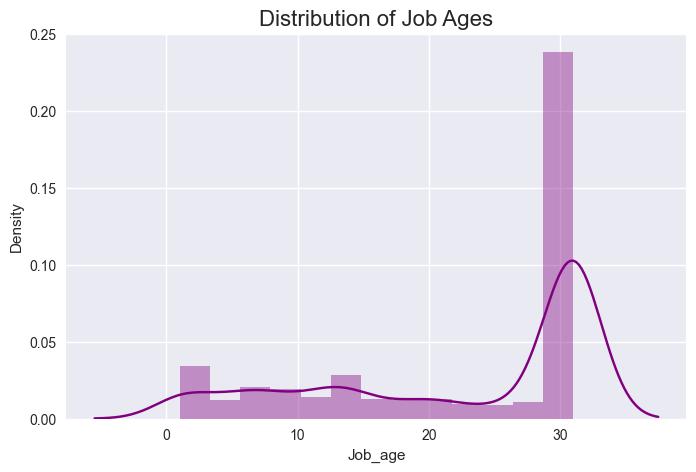

In [12]:
show_distribution_ratings(data['Job_details']['Job_age'], "Job Ages")

In [13]:
print(f"Apply via Glassdoor:")

jobs_total = len(data)
easy_apply = {
    "Y": data['Job_details']['Easy_apply'].sum(),
    "N": (~data['Job_details']['Easy_apply']).sum(),
}

print(
    f"""
    Easy apply:
    Y: {easy_apply['Y']}   {(easy_apply['Y'] / jobs_total):.2%}
    N: {easy_apply['N']}  {(easy_apply['N'] / jobs_total):.2%}
    """
)

del jobs_total, easy_apply

Apply via Glassdoor:

    Easy apply:
    Y: 713   23.04%
    N: 2381  76.96%
    


In [14]:
print(f"Salaries Currencies:")

data['Salary'].describe(include=object)

Salaries Currencies:


Currency Is_hourly
count       776       776
unique       15         2
top         EUR     False
freq        235       603

In [15]:
print(f"Salaries Specified:")
data['Salary']['Specified'].value_counts(dropna=False).map(lambda n: '{:,.2%}'.format(n / len(data)))

Salaries Specified:


False    74.92%
True     25.08%
Name: Specified, dtype: object

In [16]:
print(f"Salaries Provided by Employer:")

data['Salary']['Employer_provided'].value_counts(dropna=False).map(lambda n: '{:,.2%}'.format(n / len(data)))

Salaries Provided by Employer:


False    83.68%
True     16.32%
Name: Employer_provided, dtype: object

In [17]:
print(f"Salaries Paid Hourly:")

data['Salary']['Is_hourly'].value_counts(dropna=False).map(lambda n: '{:,.2%}'.format(n / len(data)))

Salaries Paid Hourly:


NaN      74.92%
False    19.49%
True      5.59%
Name: Is_hourly, dtype: object

In [18]:
print(f"Summary of Company Info Data:")

data['Company_info'].describe(include=object)

Summary of Company Info Data:


Name Employees  Type_of_ownership                  Sector  \
count         3094      2493               2637                    2094   
unique        1941         7                 11                      24   
top     Gotfriends    10000+  Company - Private  Information Technology   
freq           100       679               1540                     785   

                                       Industry   Revenue_USD  \
count                                      2094          1278   
unique                                       80             9   
top     Information Technology Support Services  $10+ billion   
freq                                        346           374   

                                                     Pros  \
count                                                2404   
unique                                               1420   
top     ['"Good people and good managers." (in 3 revie...   
freq                                                  100   

                                                     Cons  \
count                                                2404   
unique                                               1194   
top     ['No Cons have been reported by the Glassdoor ...   
freq                                                  481   

                                         Benefits_reviews  
count                                                 785  
unique                                                351  
top     ['401K Plan (573 comments)\n"6% Match best in ...  
freq                                                   32

In [19]:
print(f"Top 10 employees:")
data['Company_info']['Name'].value_counts()[:10]

Top 10 employees:


Gotfriends                           100
SQlink                                84
Accenture                             32
Canonical - Jobs                      25
Nigel Frank International Limited     19
EPAM Systems                          18
EY                                    16
Vodafone                              15
ROCKEN                                15
ING                                   15
Name: Name, dtype: int64

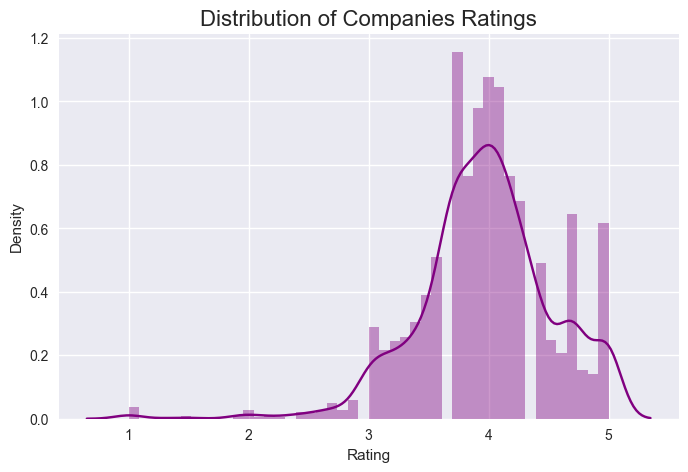

In [20]:
show_distribution_ratings(data['Company_info']['Rating'], "Companies Ratings")

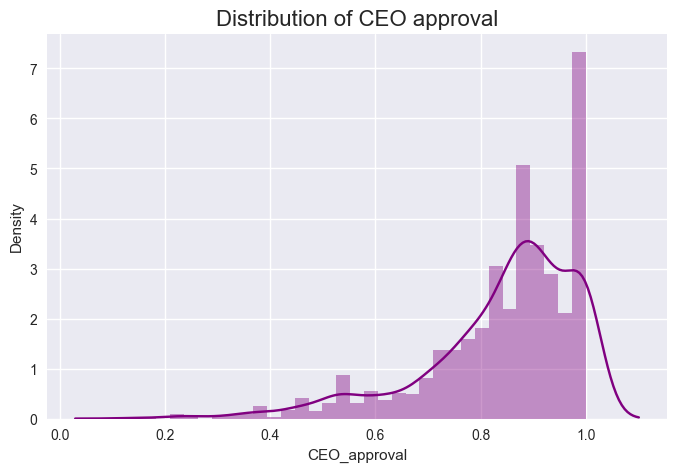

In [21]:
show_distribution_ratings(data['Company_info']['CEO_approval'], "CEO approval")

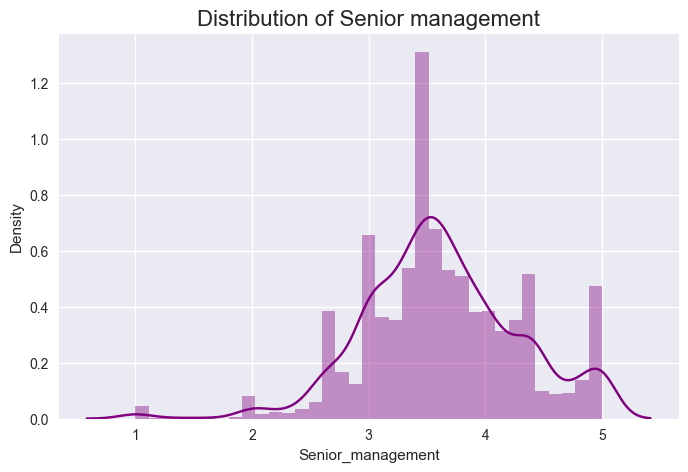

In [22]:
show_distribution_ratings(data['Company_info']['Senior_management'], "Senior management")

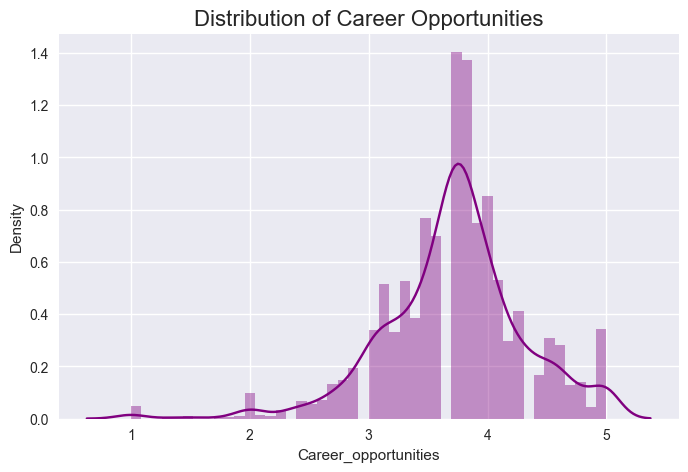

In [23]:
show_distribution_ratings(data['Company_info']['Career_opportunities'], "Career Opportunities")

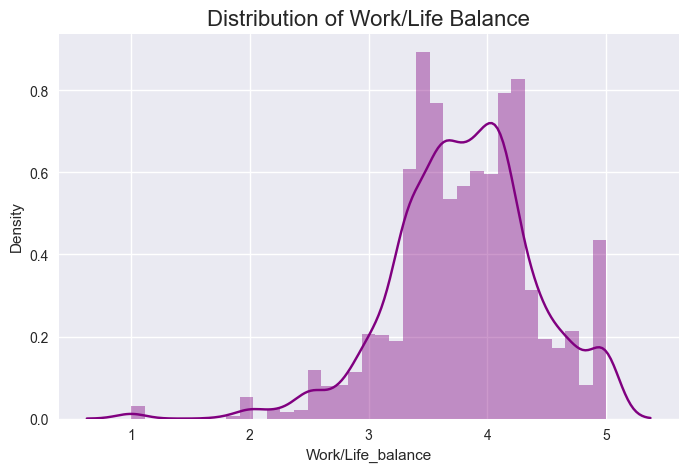

In [24]:
show_distribution_ratings(data['Company_info']['Work/Life_balance'], "Work/Life Balance")

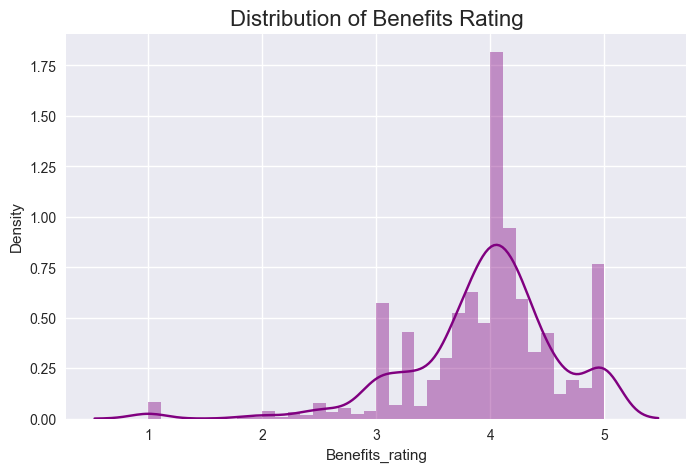

In [25]:
show_distribution_ratings(data['Company_info']['Benefits_rating'], "Benefits Rating")

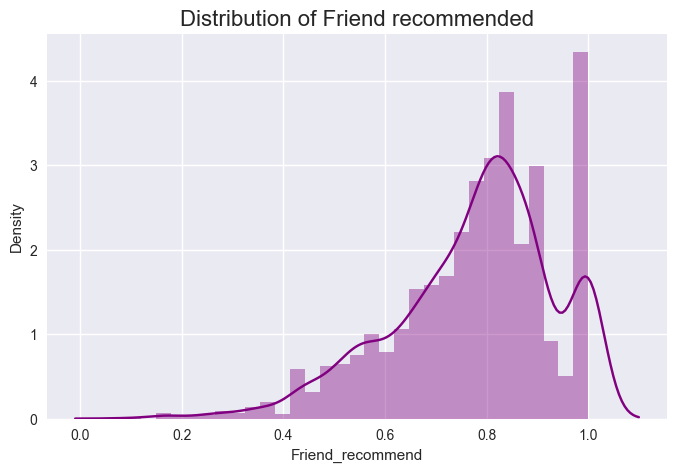

In [26]:
show_distribution_ratings(data['Company_info']['Friend_recommend'], "Friend recommended")

In [27]:
print(f"Companies Sizes (number of employees):")

data['Company_info']['Employees'].value_counts(dropna=False).map(lambda n: '{:,.2%}'.format(n / len(data)))

Companies Sizes (number of employees):


10000+           21.95%
NaN              19.42%
51 to 200        13.93%
1001 to 5000     13.15%
1 to 50          12.38%
201 to 500        7.98%
501 to 1000       7.14%
5001 to 10000     4.04%
Name: Employees, dtype: object

In [28]:
def value_counts_percent(df: pd.DataFrame):
    return df.value_counts(dropna=False).map(lambda n: '{:,.2%}'.format(n / len(data)))

In [29]:
print(f"Companies Sizes (Revenue):")

value_counts_percent(data['Company_info']['Revenue_USD'])

Companies Sizes (Revenue):


NaN                           58.69%
$10+ billion                  12.09%
$1 to $5 billion               6.76%
$100 to $500 million           5.49%
$25 to $100 million            5.27%
$5 to $25 million              3.62%
$5 to $10 billion              3.36%
$500 million to $1 billion     2.00%
$1 to $5 million               1.81%
Less than $1 million           0.90%
Name: Revenue_USD, dtype: object

In [30]:
print(f"Companies Ownership Type:")

value_counts_percent(data['Company_info']['Type_of_ownership'])

Companies Ownership Type:


Company - Private                 49.77%
Company - Public                  28.73%
NaN                               14.77%
Subsidiary or Business Segment     2.71%
Self-employed                      0.97%
Government                         0.97%
Nonprofit Organization             0.68%
Private Practice / Firm            0.58%
Contract                           0.42%
College / University               0.32%
Franchise                          0.03%
Hospital                           0.03%
Name: Type_of_ownership, dtype: object

In [31]:
print(f"Companies Sector:")

value_counts_percent(data['Company_info']['Sector'])

Companies Sector:


NaN                                            32.32%
Information Technology                         25.37%
Human Resources & Staffing                      9.99%
Financial Services                              6.30%
Management & Consulting                         5.85%
Manufacturing                                   4.40%
Media & Communication                           2.33%
Energy, Mining & Utilities                      1.68%
Telecommunications                              1.58%
Retail & Wholesale                              1.52%
Transportation & Logistics                      1.45%
Pharmaceutical & Biotechnology                  1.16%
Insurance                                       1.16%
Construction, Repair & Maintenance Services     0.84%
Healthcare                                      0.78%
Government & Public Administration              0.71%
Education                                       0.68%
Aerospace & Defense                             0.68%
Real Estate                 

In [32]:
print(f"Companies Industry:")

value_counts_percent(data['Company_info']['Industry'])

Companies Industry:


NaN                                        32.32%
Information Technology Support Services    11.18%
HR Consulting                               6.11%
Computer Hardware Development               5.79%
Enterprise Software & Network Solutions     4.46%
                                            ...  
Membership Organizations                    0.03%
Music & Sound Production                    0.03%
Pharmaceutical                              0.03%
Law Firms                                   0.03%
Film Production                             0.03%
Name: Industry, Length: 81, dtype: object

In [33]:
del value_counts_percent

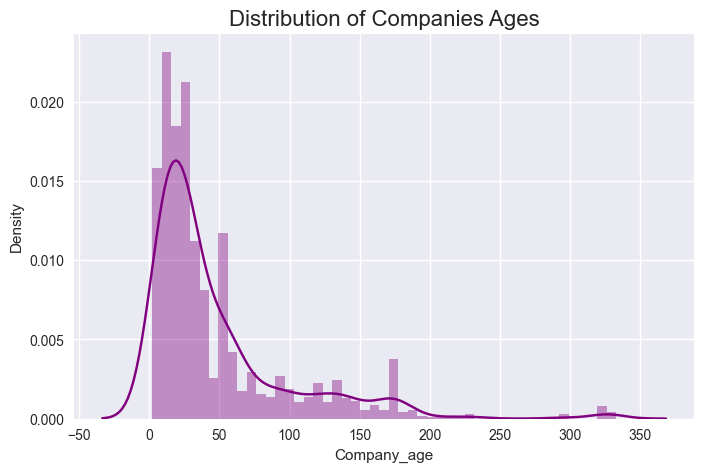

In [34]:
show_distribution_ratings(data['Company_info']['Company_age'], "Companies Ages")

In [35]:
del show_distribution_ratings

In [36]:
print(f"Education Needed:\n")

show_percentages(data['Education'][['BA', 'MS', 'Phd']])

Education Needed:

Number of jobs: 3094

     Percentage of True Values  Occurrence
None                    93.15%        2882
MS                       4.07%         126
BA                       3.59%         111
Phd                      0.32%          10


In [37]:
print(f"Certificates Needed:\n")

show_percentages(data['Education']['Certificate'], "string")

Certificates Needed:

Number of jobs: 3094

         Percentage of True Values  Occurrence
None                        99.55%        3080
Other                        0.42%          13
DataCamp                     0.03%           1


In [38]:
print(f"Version Control:\n")

show_percentages(data['Version_control']['Git_SVN'], "string")

Version Control:

Number of jobs: 3094

          Percentage of True Values  Occurrence
None                         97.90%        3029
Git                           1.20%          37
GitLab                        0.55%          17
Github                        0.29%           9
Bitbucket                     0.03%           1
Launchpad                     0.03%           1


In [39]:
print(f"Version Cloud Platforms:\n")

show_percentages(data['Cloud_platforms'])

Version Cloud Platforms:

Number of jobs: 3094

                Percentage of True Values  Occurrence
None                               81.61%        2525
Microsoft_Azure                     9.95%         308
AWS                                 8.73%         270
GPC                                 3.68%         114
Oracle                              0.13%           4
IBM                                 0.10%           3
Alibaba                             0.00%           0
Tencent                             0.00%           0
OVHcloud                            0.00%           0
DigitalOcean                        0.00%           0
Lincode                             0.00%           0


In [40]:
print(f"Relational Database Management System:\n")

show_percentages(data['RDBMS'])

Relational Database Management System:

Number of jobs: 3094

                     Percentage of True Values  Occurrence
None                                    96.22%        2977
PostgreSQL                               1.62%          50
MySQL                                    1.62%          50
Microsoft_SQL_Server                     1.36%          42
Oracle_PL_SQL                            0.36%          11
IBM_Db2                                  0.10%           3


In [41]:
print(f"Any Non-Relational Database:\n")

show_percentages(data['NOSQL'])

Any Non-Relational Database:

Number of jobs: 3094

                Percentage of True Values  Occurrence
None                               98.00%        3032
MongoDB                             1.42%          44
Cassandra                           0.55%          17
Amazon_DynamoDB                     0.29%           9
Neo4j                               0.06%           2


In [42]:
print(f"Search & Analytics:\n")

show_percentages(data['Search_&_Analytics'])

Search & Analytics:

Number of jobs: 3094

                Percentage of True Values  Occurrence
None                               94.80%        2933
Snowflake                           2.65%          82
Google_BigQuery                     1.26%          39
Amazon_Redshift                     1.10%          34
Teradata                            0.68%          21
SAP_HANA                            0.23%           7
Apache_Solr                         0.06%           2
Oracle_Exadata                      0.03%           1


In [43]:
print(f"Data Integration & Processing:\n")

show_percentages(data['Data_integration_and_processing'])

Data Integration & Processing:

Number of jobs: 3094

                        Percentage of True Values  Occurrence
None                                       95.93%        2968
Databricks                                  3.56%         110
Informatica_PowerCenter                     0.32%          10
Presto                                      0.23%           7


In [44]:
print(f"Stream Processing Tools:\n")

show_percentages(data['Stream_processing_tools'])

Stream Processing Tools:

Number of jobs: 3094

             Percentage of True Values  Occurrence
None                            96.25%        2978
Apache_Kafka                     3.43%         106
Apache_Flink                     0.55%          17
Dataflow                         0.19%           6


In [45]:
print(f"Workflow Orchestration Tools:\n")

show_percentages(data['Workflow_orchestration_tools'])

Workflow Orchestration Tools:

Number of jobs: 3094

               Percentage of True Values  Occurrence
None                              97.22%        3008
Apache_Airflow                     2.07%          64
SSIS                               0.68%          21
Luigi                              0.06%           2


In [46]:
print(f"Big Data Processing:\n")

show_percentages(data['Big_Data_processing'])

Big Data Processing:

Number of jobs: 3094

              Percentage of True Values  Occurrence
None                             90.56%        2802
Apache_Spark                      8.73%         270
Apache_Hadoop                     2.59%          80
Apache_Hive                       1.65%          51


In [47]:
print(f"OS:\n")

show_percentages(data['OS'])

OS:

Number of jobs: 3094

        Percentage of True Values  Occurrence
None                       97.32%        3011
Linux                       2.07%          64
Windows                     0.48%          15
Unix                        0.45%          14
macOS                       0.00%           0


In [48]:
print(f"Programming Languages:\n")

show_percentages(data['Programming_languages'])

Programming Languages:

Number of jobs: 3094

           Percentage of True Values  Occurrence
None                          75.27%        2329
SQL                           13.61%         421
Python                        13.54%         419
Java                           4.62%         143
Scala                          3.59%         111
R                              2.81%          87
Bash                           0.32%          10
Go                             0.23%           7
PowerShell                     0.23%           7
CLI                            0.10%           3
Julia                          0.00%           0
C++                            0.00%           0
Rust                           0.00%           0


In [49]:
print(f"Business Intelligence Tools:\n")

show_percentages(data['Business_Intelligence_Tools'])

Business Intelligence Tools:

Number of jobs: 3094

                 Percentage of True Values  Occurrence
None                                96.09%        2973
Power_BI                             2.10%          65
Tableau                              1.20%          37
QlikView                             0.36%          11
Looker                               0.36%          11
Excel                                0.36%          11
Google_Analytics                     0.13%           4
MicroStrategy                        0.13%           4
Oracle_BI_server                     0.00%           0
SAS_Analytics                        0.00%           0
Lumira                               0.00%           0
Cognos_Impromptu                     0.00%           0
InsightSquared                       0.00%           0
Sisense                              0.00%           0
Dundas_BI                            0.00%           0
Domo                                 0.00%           0


## Questions to ask

1. Countries with The Highest Number of Jobs
1. Salaries per Country
1. Age of Job Postings
1. Top 10 Industries with the Highest Number of Jobs
1. Top 10 Industries with the Highest Salaries
1. Companies with Maximum Number of Job Openings
1. Company Ratings
1. Company Size
1. Company Age
1. Company Ownership Type
1. Company Revenue
1. Remote Job
1. Experience Level
1. Tech Knowledge Required
1. Correlation Map

## 1. Countries with The Highest Number of Jobs

### 1.1 Europe

In [50]:
def show_top_number_of_companies_per_country(data: pd.DataFrame, region: str | list[str]):

    def narrow_data(data: pd.DataFrame, region: str | list[str]):

        plot_data = data.drop_duplicates(subset=[('Company_info', 'Name')])

        if isinstance(region, list):
            plot_data = plot_data[plot_data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            plot_data = plot_data[plot_data['Job_details']['Region'] == region]
        else:
            raise TypeError(f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead")
            
        return plot_data
    
    def get_countries(region):
        
        if isinstance(region, list):
            title_countries = ", ".join(region)
        else:
            title_countries = region
        return title_countries
    
    def show_plot(plot_data, title_countries):

        plot = plt
        seaborn = sns
    
        plot.subplots(figsize=(20, 8))
    
        my_palette = ['#bfed2d'] + ['#00c37f']*2 + ["#007e90"]*4 + ['#51006f']*4
        p = seaborn.countplot(x=plot_data, order=plot_data.value_counts().index[:11], saturation=1, linewidth=0, palette=my_palette)

        p.axes.set_title(f"\nData Science Company's Origins: {title_countries}\n",fontsize=25, color="#435672")

        p.axes.set_xlabel("\nOrigin",fontsize=21, color="#435672")
        p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0, color="#435672")
        
        p.axes.set_ylabel("Total\n",fontsize=21, color="#435672")
        p.yaxis.label.set_color("#435672")
        p.tick_params(colors='#435672', which='both')

        for container in p.containers:
            p.bar_label(container,label_type="center",padding=6,size=25,color="#435672",rotation=0,
        bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#f4f8fc", "alpha": 1, "edgecolor": "#435672"})

        for text in p.axes.texts:
            text.set_color("#435672")

        seaborn.despine(left=True, bottom=True)
        plot.show()
    
    plot_data = narrow_data(data, region)

    if region == "North America":
        plot_data = plot_data["Job_details"]['State']
    else:
        plot_data = plot_data["Job_details"]['Country']

    title_countries = get_countries(region)
    
    show_plot(plot_data, title_countries)

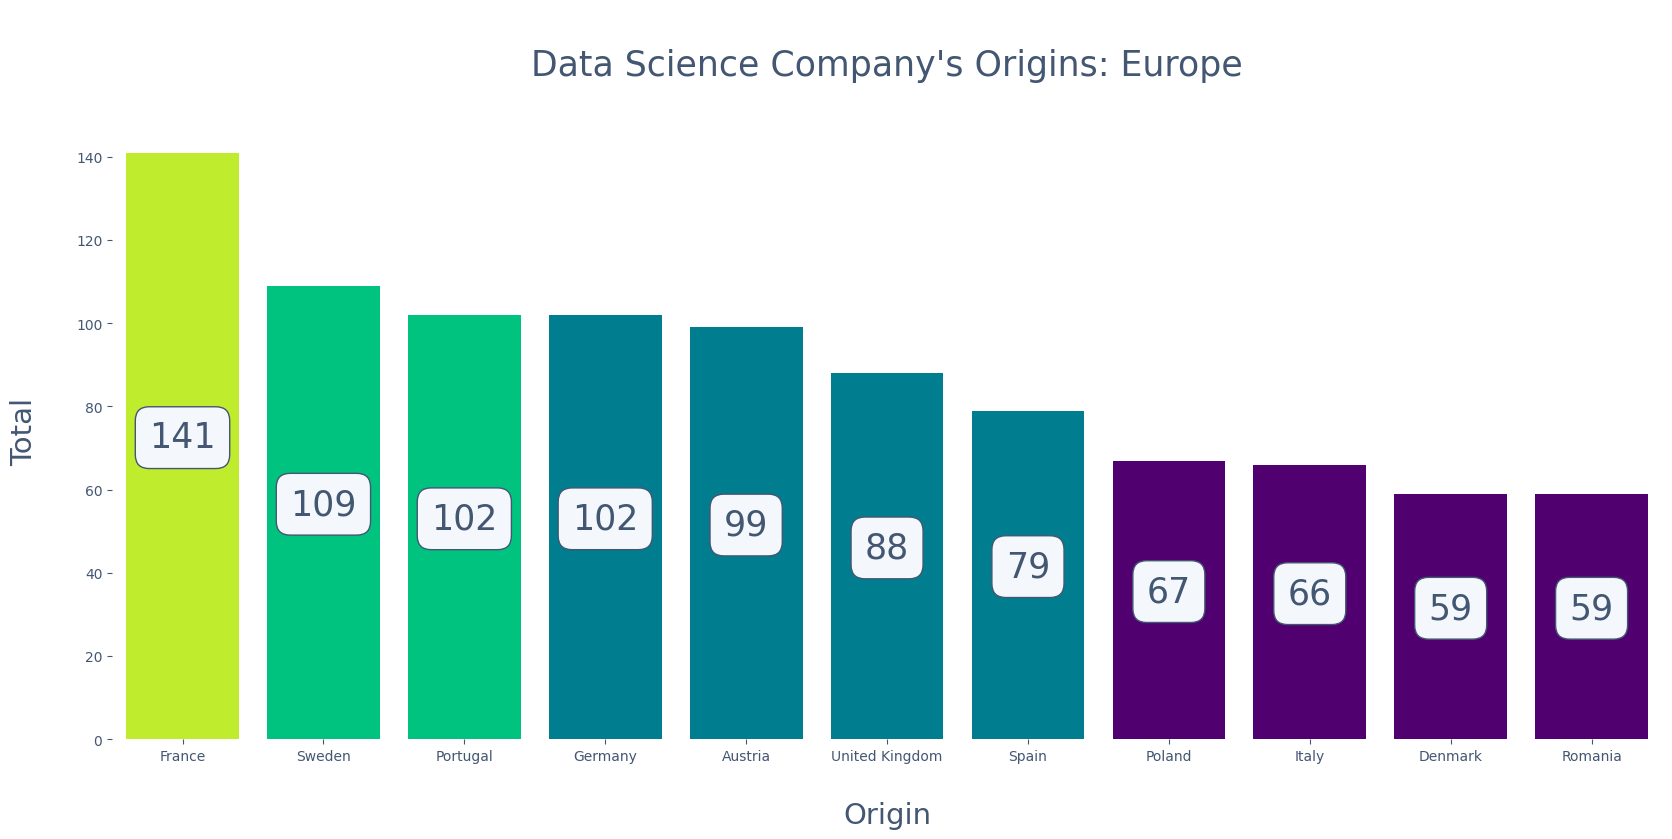

In [51]:
show_top_number_of_companies_per_country(data, 'Europe')

In [52]:
from typing import List, Tuple


def show_number_of_jobs_per_country(
    data: pd.DataFrame,
    region: str,
    lonaxis: List[Tuple[int, int]] = None,
    lataxis: List[Tuple[int, int]] = None,
):
    def narrow_data(data: pd.DataFrame, region: str):
    
        if isinstance(region, list):
            plot_data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            plot_data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead")
        
        return plot_data
    
    def get_countries(region: str | list[str]):
    
        if isinstance(region, list):
            title_countries = ", ".join(region)
        else:
            title_countries = region

        return title_countries
    
    plot_data = narrow_data(data, region)

    region_details = "Country"
    locationmode = "country names"

    plot_data["Job_details"][region_details] = plot_data["Job_details"][region_details]

    countries = (
        plot_data["Job_details"][region_details]
        .str.strip()
        .value_counts()
        .index.tolist()
    )
    values = (
        plot_data["Job_details"][region_details]
        .str.strip()
        .value_counts()
        .values.tolist()
    )

    data = pd.DataFrame({"Country": countries, "Jobs": values})

    geo = dict(
        showcoastlines=False,
        showcountries=True,
        countrycolor="white",
        showlakes=False,
    )

    if lonaxis and lataxis:
        geo["lonaxis"] = dict(range=lonaxis)
        geo["lataxis"] = dict(range=lataxis)

    elif region:
        geo["scope"] = region.lower()

    else:
        raise TypeError("Argument 'region' is required.")

    fig = px.choropleth(
        data_frame=data,
        locationmode=locationmode,
        locations=region_details,
        height=400,
        width=600,
        color="Jobs",
        hover_data=["Country", "Jobs"],
        title="Sample Choropleth Map",
        labels={"Jobs": "Jobs"},
    )

    title_countries = get_countries(region)

    fig.update_layout(
        dragmode=False,
        margin=dict(l=0, r=0, b=0, t=50),
        geo_resolution=50, # This precision is needed for some microstates
        title_text=f"Number of Jobs per Country in {title_countries}",
        title_font_size=18,
        title_y=0.955,
        geo=geo,
    )

    fig.update_traces(marker=dict(line=dict(color='#435672', width=1)))

    fig.show()

In [53]:
show_number_of_jobs_per_country(data, 'Europe', [-13.0, 50.0], [27, 75])

Note:
- Israel is overrepresented by two recruitments companies: Gotfiriends with 100 postings, and the SQlink with 84.

In [54]:
data[data['Job_details']['Country'] == "Israel"]['Company_info']['Name'].value_counts()

Gotfriends                        100
SQlink                             84
אמן מחשבים בע''מ                    2
Roundforest                         2
Tikal                               2
Go For It                           2
DBArt                               2
Solaredge                           2
Next Insurance                      2
One1                                2
KAYHUT                              2
ironSource                          2
Bright Machines                     2
אר.ויי.בי. פלסמנט אגנסי בע"מ        1
Storemaven                          1
riverside.fm                        1
Lili                                1
BioCatch                            1
Qualitest                           1
retrain.ai                          1
Moon Active                         1
Vesttoo                             1
CYREN                               1
Workiz                              1
פיקארו השמה גיוס וסורסינג בע"מ      1
365scores                           1
Team8       

In [55]:
geo_data = pd.read_csv("data\clean\_Socioeconomic data\geopositioning.csv")

In [56]:
import plotly.graph_objs as go

def show_jobs_density(
        data:pd.DataFrame, 
        region: str, 
        geo_data: pd.DataFrame,
        center_view: dict[str, int] = None,
        mapbox_zoom: float = 2.1
        ):
    
    def check_strings(string_list: list[str] | str, *args: str):

        if isinstance(string_list, str):
            string_list = [string_list]
        for arg in args:
            if arg in string_list:
                return True

        return False
    
    def narrow_data(data: pd.DataFrame, region: str):
    
        if isinstance(region, list):
            plot_data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            plot_data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead")
        
        return plot_data
    
    def get_countries(region: str | list[str]):
    
        if isinstance(region, list):
            title_countries = ", ".join(region)
        else:
            title_countries = region

        return title_countries
    
    
    def filter_data(data: pd.DataFrame, region: str):

        data = narrow_data(data, region)
        data = data.drop(data[data['Job_details']['City'] == 'Remote'].index)

        if not check_strings(region, "Asia", "Oceania"):
            
            data = data.drop(data[data['Job_details']['City'] == data['Job_details']['Country']].index)
            data = data.dropna(subset=[('Job_details', 'City')])

        data = data['Job_details']
        plot_data = data[['City', 'State', 'Country', 'Region']]


        return plot_data
    
    def set_coords_manually(plot_data: pd.DataFrame, country: str, coords: list[int]):

        mask = plot_data['Country'] == country
        plot_data.loc[mask, ['Latitude', 'Longitude']] = coords

        return plot_data

    
    def update_missing_geo_data(plot_data: pd.DataFrame):

        # Glassdoor didn't scrape any location for those, so as compromise the country location is set

        plot_data = set_coords_manually(plot_data, 'Taiwan',  [23.6978, 120.9605])
        plot_data = set_coords_manually(plot_data, 'Singapore', [1.3521, 103.8198])
        plot_data = set_coords_manually(plot_data, 'South Korea', [35.9078, 127.7669])
        plot_data = set_coords_manually(plot_data, 'Japan', [36.2048, 138.2529])

        return plot_data
    
    
    def add_latitude_longitude(geo_data: pd.DataFrame, plot_data: pd.DataFrame):

        geo_data = geo_data.drop('Location', axis=1)

        # Using join instead of merge method, because it is much less buggy

        plot_data = plot_data.join(
                geo_data.set_index(['City', 'State', 'Country', 'Region']), 
                on=['City', 'State', 'Country', 'Region'], 
                how='left'
            )

        return plot_data
    
    def add_density(plot_data: pd.DataFrame):
        
        plot_data['Density'] = pd.cut(plot_data['Latitude'], bins=100).apply(lambda x: x.right).astype(str) \
            + ',' + pd.cut(plot_data['Longitude'], bins=100).apply(lambda x: x.right).astype(str)
        plot_data['Density'] = plot_data.groupby('Density')['Density'].transform('count')

        return plot_data
    
    def add_missing_data(geo_data: pd.DataFrame, plot_data: pd.DataFrame, region: str):

        plot_data = add_latitude_longitude(geo_data, plot_data)

        if check_strings(region, "Asia", "Oceania"):
            plot_data = update_missing_geo_data(plot_data)

        plot_data = add_density(plot_data)
        
        return plot_data
    
    def create_heatmap_data(plot_data: pd.DataFrame, max_value: int) -> str:

        def get_hovertemplate(row: pd.core.series.Series):

            info = {
                'jobs': f"Jobs:      {row['Density']}<br>" if row['Density'] is not np.nan else "",
                'country': f"Country:   {row['Country']}<br>" if row['Country']  is not np.nan else "",
                'subregion': f"Subregion: {row['State']}<br>" if row['State']  is not np.nan else "",
                'city': f"City:      {row['City']}<br>" if row['City']  is not np.nan else "",
                'no_extra': '<extra></extra>'
            }

            hover = ""

            for label in info.values():
                if label:
                    hover += label

            return hover



        plot_data['hovertemplate'] = plot_data.apply(
                lambda row: get_hovertemplate(row), 
                axis=1
            )


        return go.Densitymapbox(
            lat = plot_data['Latitude'],
            lon = plot_data['Longitude'],
            radius = 30,
            colorscale = 'Viridis',
            zmin = 0,
            zmax = max_value,
            customdata = plot_data[['Density', 'Country', 'State', 'City']],
            hovertemplate = plot_data['hovertemplate'],
            colorbar=dict(
                outlinewidth=0
            )
        )
    
    def create_choropleth_data(plot_data: pd.DataFrame, max_value: int):

        return go.Choropleth(
            locations = plot_data['City'],
            locationmode = 'country names',
            colorscale = 'Viridis',
            zmin = 0,
            zmax = max_value,
            text = plot_data['City'] + ', ' + plot_data['Country']
        )
    
    def update_fig(plot_data: pd.DataFrame, fig: go.Figure, center_view: dict, mapbox_zoom: float = 2.1):

        title_countries = get_countries(region)

        if not center_view:
            center_view = {
                'lat': plot_data['Latitude'].mean(),
                'lon': plot_data['Longitude'].mean(),
            }

        fig.update_layout(
            title_text=f"Jobs density in {title_countries}",
            title_font_size=18,
            title_y=0.97,
            width=600,
            height=400,
            mapbox_style = 'carto-positron',
            mapbox_center = center_view,
            mapbox_zoom = mapbox_zoom,
            paper_bgcolor="white",
            margin=dict(l=0, r=0, b=0, t=40),
            hovermode='closest',
            hoverlabel=dict(
                font=dict(
                    family='Lucida Console'
                )
            )
        )

        return fig
    
    plot_data = filter_data(data, region)

    plot_data = add_missing_data(geo_data, plot_data, region)

    max_value = plot_data['Density'].max()

    choro = create_choropleth_data(plot_data, max_value)

    heatmap = create_heatmap_data(plot_data, max_value)

    fig = go.Figure(data=[choro, heatmap])

    fig = update_fig(plot_data, fig, center_view, mapbox_zoom)

    fig.show()

In [57]:
show_jobs_density(data, 'Europe', geo_data)

Note:
- No surprise here that most on-site jobs are concentrated in bustling metropolises and capital cities.

### 1.2 North America

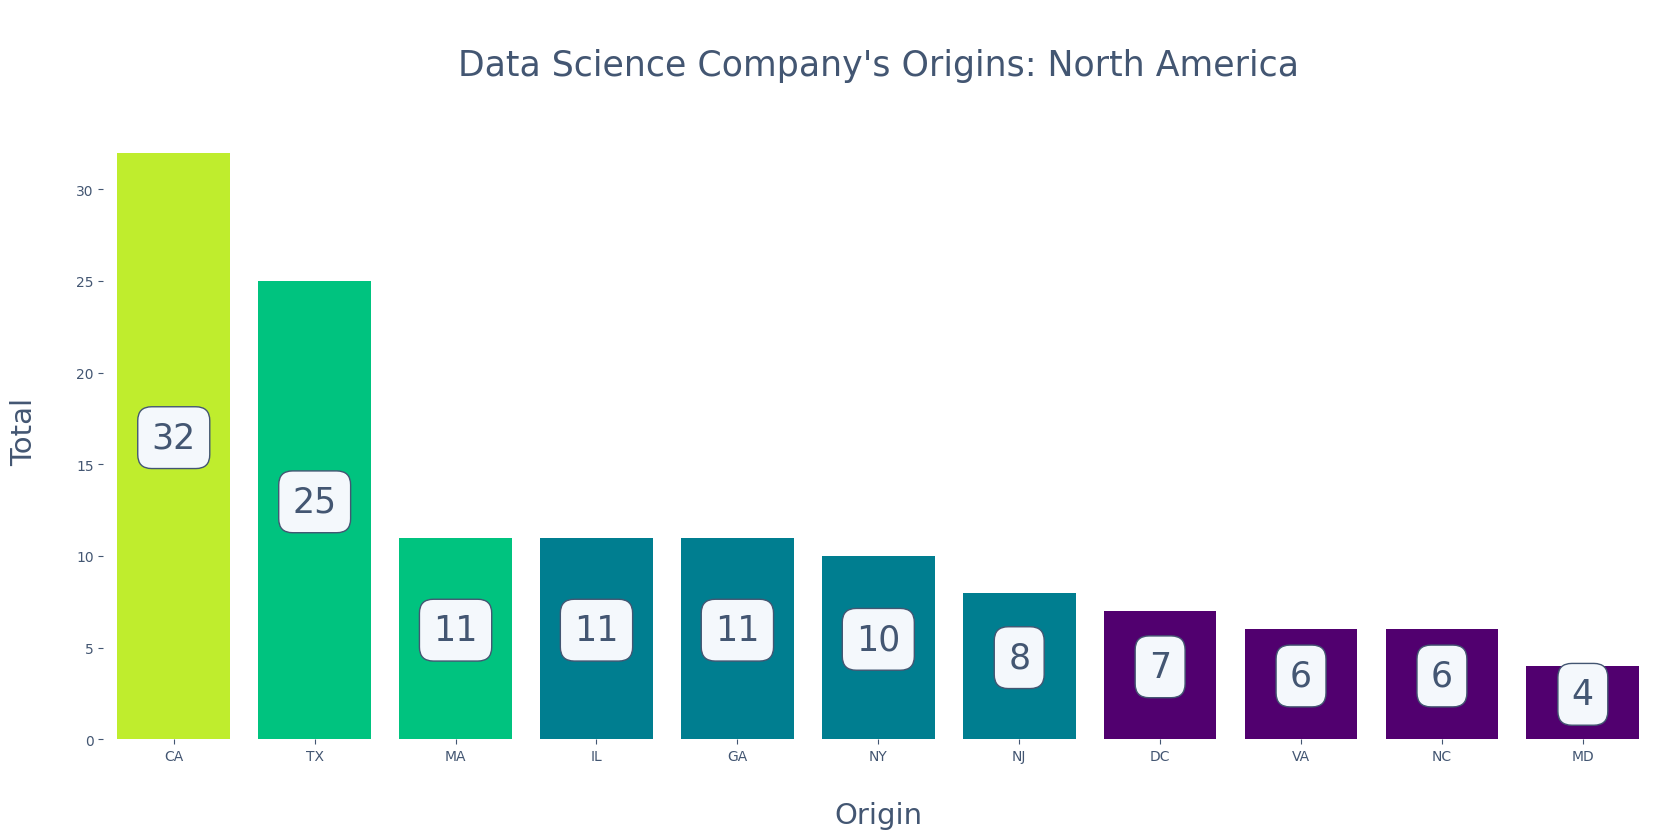

In [58]:
show_top_number_of_companies_per_country(data, 'North America')

In [59]:
import json

def show_number_of_jobs_per_state(data: pd.DataFrame, country: str):
    
    plot_data = data[data['Job_details']['Country'] == country]

    region_details = 'State'

    plot_data["Job_details"][region_details] = plot_data["Job_details"][region_details].str.strip()


    states = plot_data["Job_details"][region_details].str.strip().value_counts().index.tolist()
    values = plot_data["Job_details"][region_details].str.strip().value_counts().values.tolist()

    data = pd.DataFrame({
    "State": states,
    "Value": values
    })

    if country == 'Canada':
        locationmode=None
        scope="north america"
        with open("data\clean\_Socioeconomic data\canada_provinces.geo.json", "r") as geo:
            geojson = json.load(geo)
        featureidkey="properties.cartodb_id"

    elif country == 'United States':
        locationmode="USA-states"
        scope="usa"
        geojson = None
        featureidkey=None
    else:
        raise KeyError(f"Invalid country:\n{country}")  

    fig = px.choropleth(
        data_frame=data,
        locationmode=locationmode,
        locations="State",
        geojson=geojson,
        featureidkey=featureidkey,
        height=400,
        width=600,
        scope=scope,
        color="Value",
        hover_data=["State", "Value"],
        title="Sample Choropleth Map",
        labels={"Value": "Value"},
    )

    fig.update_layout(
        dragmode=False,
        margin=dict(l=0, r=0, b=0, t=50),
        title_text=f"Number of Jobs per Country in {country}",
        title_font_size=18,
        title_y = 0.955,
    )

    fig.update_traces(marker=dict(line=dict(color='#8d9bb7', width=1)))

    fig.show()


In [60]:
show_number_of_jobs_per_state(data, 'United States')

In [61]:
show_jobs_density(data, 'North America', geo_data)

### 1.3 South-East Asia and Oceania

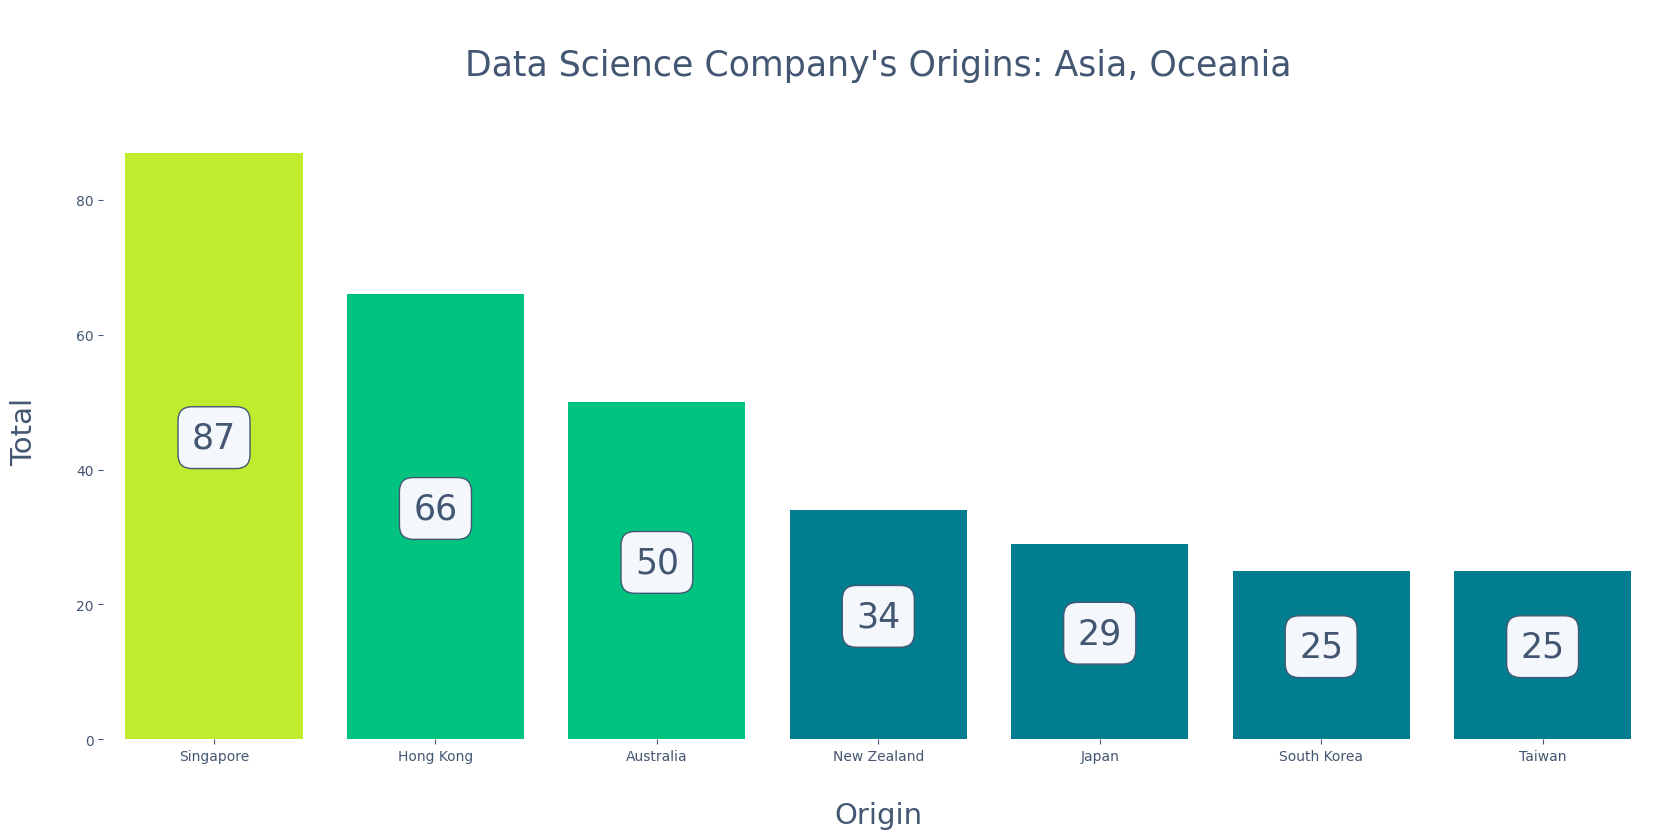

In [62]:
show_top_number_of_companies_per_country(data, ['Asia', 'Oceania'])

In [63]:
show_number_of_jobs_per_country(data, ['Asia', 'Oceania'], [93.31, 183.8], [-48.9, 50])

Note:
- Did you notice that small dot on the left? That's Singapore, and it has the highest score. But, keep in mind that the results should be taken with caution because Glassdoor may not be very popular in some Asian countries.

In [64]:
show_jobs_density(data, ['Asia', 'Oceania'], geo_data, {'lat': -4.5080, 'lon': 132.4200}, 1.3)

In [65]:
del geo_data

## 2. Salaries per Country

In [66]:
import matplotlib.ticker as mtick

def salaries_provided_per_country(data: pd.DataFrame, region: str | list[str], title: str, top: int):

    def narrow_data(data: pd.DataFrame, region: str | list[str]):

        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead")
        
        plot_data = pd.DataFrame()

        plot_data['State'] = data['Job_details']['State']
        plot_data['Country'] = data['Job_details']['Country']
        plot_data['Employer_provided'] = data['Salary']['Employer_provided']
            
        return plot_data

    def transform_data(data: pd.DataFrame, per_state: bool, top: int):


        filtered_data = data[data['Employer_provided'] == True]
        grouped_data = filtered_data.groupby('State' if per_state else 'Country').size()
        ratios_data = (grouped_data / filtered_data.shape[0]).to_frame(name='Salary Provided by Employer').sort_values(by='Salary Provided by Employer', ascending=False).reset_index()[:top]
        return ratios_data

    def show_plot(salary_provided: pd.DataFrame, per_state: bool=False, title: str = "-> add title here <-"):

        fig, ax = plt.subplots(figsize=(12, 6))
        my_palette = ['#bfed2d'] + ['#00c37f']*2 + ["#007e90"]*4 + ['#51006f']*4

        sns.barplot(data=salary_provided, x='State' if per_state else 'Country', y='Salary Provided by Employer', palette=my_palette)

        plt.title(title, color="#435672", fontsize=16)
        plt.xlabel('\nState' if per_state else 'Country', color="#435672", fontsize=14)
        plt.ylabel("Salary Provided\n", color="#435672", fontsize=14)

        plt.xticks(rotation=35, color="#435672")
        plt.yticks(color="#435672")

        sns.despine(left=True, bottom=True)

        ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

        for p in ax.patches:
            height = p.get_height()
            percentage = (height / 1) * 100
            ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color="#435672")
        
        plt.show()

    data = narrow_data(data, region)

    if region == 'North America':
        per_state = True
    else:
        per_state = False

    plot_data = transform_data(data, per_state, top)

    show_plot(plot_data, per_state, title)

In [67]:
def salaries_per_country(data: pd.DataFrame, region: str | list[str]):

    def narrow_data(data: pd.DataFrame, region: str | list[str]):

        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead")
        
        plot_data = pd.DataFrame()

        plot_data['State'] = data['Job_details']['State']
        plot_data['Country'] = data['Job_details']['Country']
        plot_data['Salary_avg'] = data['Salary']['Avg']
            
        return plot_data
    
    def show_plot(average_salary_by_country: pd.DataFrame, per_state: bool=False):

        fig, ax = plt.subplots(figsize=(12, 6))
        my_palette = ['#bfed2d'] + ['#00c37f']*2 + ["#007e90"]*4 + ['#51006f']*4

        sns.barplot(data=average_salary_by_country, x='State' if per_state else 'Country', y='Salary_avg', palette=my_palette)

        plt.title(f"Average Salary by {'State' if per_state else 'Country'}", color="#435672", fontsize=16)
        plt.xlabel('\nState' if per_state else 'Country', color="#435672", fontsize=14)
        plt.ylabel("Average Salary\n", color="#435672", fontsize=14)

        plt.xticks(rotation=35, color="#435672")
        plt.yticks(color="#435672")

        sns.despine(left=True, bottom=True)

        for container in ax.containers:
            ax.bar_label(container,label_type="center",padding=6,size=12,color="#435672",rotation=0,
            bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#f4f8fc", "alpha": 1, "edgecolor": "#435672"})
        
        plt.show()

    plot_data = narrow_data(data, region)

    if region == 'North America':
        per_state = True
    else:
        per_state = False

    average_salary_by_country = plot_data.groupby('State' if per_state else 'Country')['Salary_avg'].mean().reset_index().sort_values(by='Salary_avg', ascending=False)[:11]
    average_salary_by_country['Salary_avg'] = average_salary_by_country['Salary_avg'].apply(lambda salary: int(round(salary)) if not np.isnan(salary) else salary)

    show_plot(average_salary_by_country, per_state)

In [68]:
import re

def salaries_per_country_junior(data: pd.DataFrame, region: str | list[str], title: str):

    def narrow_data(data: pd.DataFrame, region: str | list[str]):

        # make sure to not have titles like "Junior, Mid, Senior Data Engineer"
        data = data[~data['Job_details']['Title'].str.contains(r'Senior|Management|Mid', flags=re.IGNORECASE)]

        data = data[data['Job_details']['Seniority'] == "Junior"]

        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead")

        plot_data = pd.DataFrame()
        plot_data['State'] = data['Job_details']['State']
        plot_data['Country'] = data['Job_details']['Country']
        plot_data['Salary_avg'] = data['Salary']['Avg']
            
        return plot_data
    
    def show_plot(average_salary_by_country: pd.DataFrame, title: str, per_state: bool=False):

        fig, ax = plt.subplots(figsize=(12, 6))
        my_palette = ['#bfed2d'] + ['#00c37f']*2 + ["#007e90"]*4 + ['#51006f']*4

        sns.barplot(data=average_salary_by_country, x='State' if per_state else 'Country', y='Salary_avg', palette=my_palette)

        plt.title(title, color="#435672", fontsize=12)
        plt.xlabel('\nState' if per_state else 'Country', color="#435672", fontsize=14)
        plt.ylabel("Average Salary\n", color="#435672", fontsize=14)

        plt.xticks(rotation=35, color="#435672")
        plt.yticks(color="#435672")

        sns.despine(left=True, bottom=True)

        for container in ax.containers:
            ax.bar_label(container,label_type="center",padding=6,size=12,color="#435672",rotation=0,
        bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#f4f8fc", "alpha": 1, "edgecolor": "#435672"})
        
        plt.show()

    plot_data = narrow_data(data, region)

    if region == 'North America':
        per_state = True
    else:
        per_state = False

    average_salary_by_country = plot_data.groupby('State' if per_state else 'Country')['Salary_avg'].mean().reset_index().sort_values(by='Salary_avg', ascending=False)[:11]
    average_salary_by_country['Salary_avg'] = average_salary_by_country['Salary_avg'].apply(lambda salary: int(round(salary)) if not np.isnan(salary) else salary)

    show_plot(average_salary_by_country, title, per_state)

### 2.1 The World

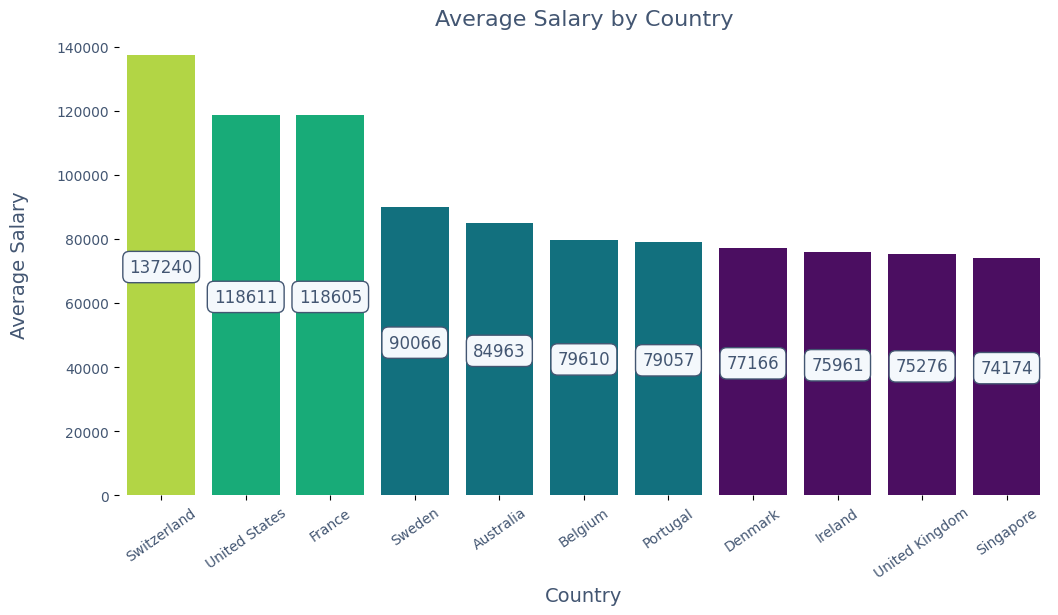

In [69]:
salaries_per_country(data, ['Europe', 'North America', 'Asia', 'Oceania'])

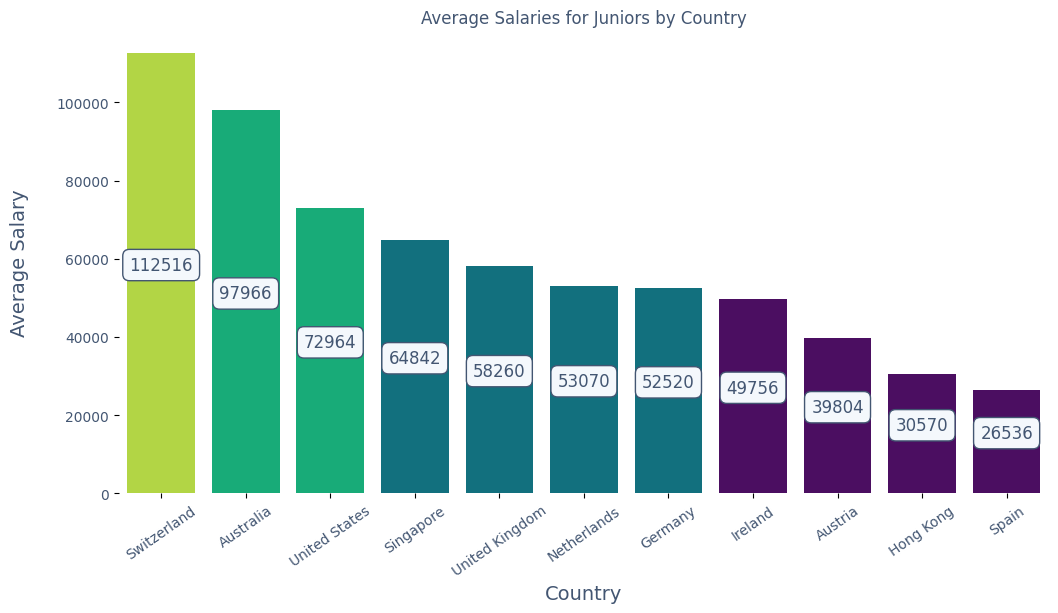

In [70]:
salaries_per_country_junior(data, ['Europe', 'North America', 'Asia', 'Oceania'], "Average Salaries for Juniors by Country")

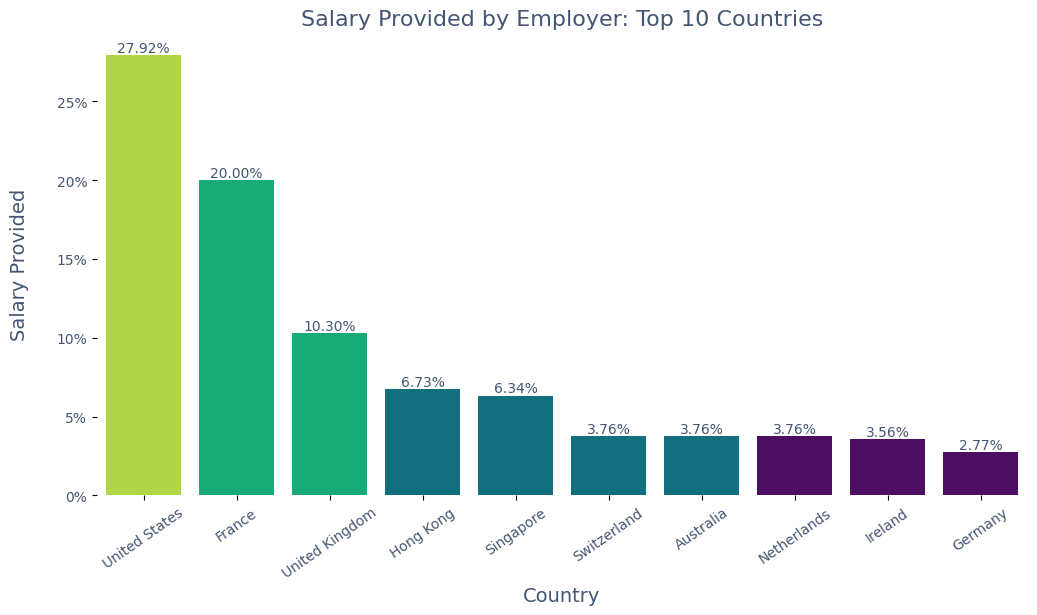

In [71]:
salaries_provided_per_country(data, ['Europe', 'North America', 'Asia', 'Oceania'], "Salary Provided by Employer: Top 10 Countries", 10)

### 2.2 In United States per State

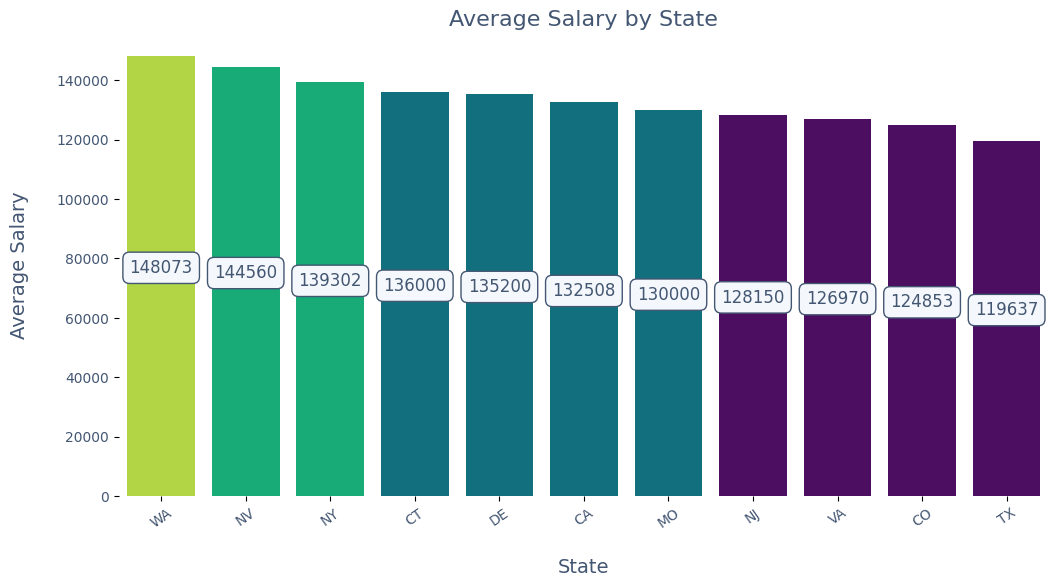

In [72]:
salaries_per_country(data, 'North America')

Note:
- The outcomes are pretty interesting. But the average salary could be skewed due to the small samples. In examples like:
NV, DE, MO, CO...

In [73]:
data[data['Job_details']['Country'] == "United States"]['Job_details']['State'].value_counts(dropna=False)

NaN    55
CA     32
TX     27
IL     12
NY     11
GA     11
MA     11
VA      9
NJ      8
DC      7
NC      7
UT      4
MD      4
PA      4
MI      4
TN      3
AZ      3
WA      3
FL      3
OH      3
CO      3
MN      3
OR      2
IN      1
CT      1
NH      1
MT      1
HI      1
WI      1
RI      1
KY      1
IA      1
NV      1
DE      1
MO      1
Name: State, dtype: int64

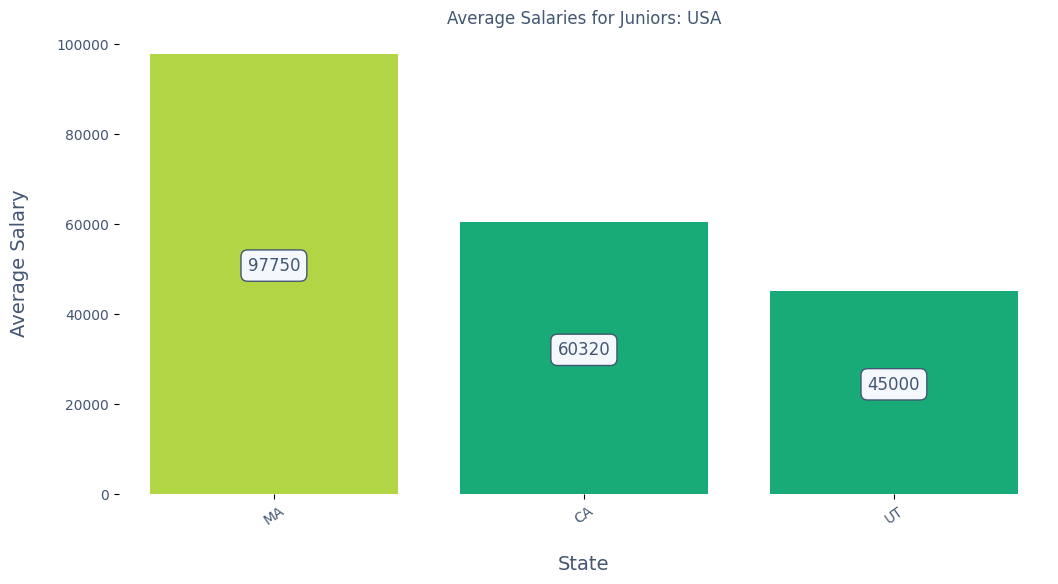

In [74]:
salaries_per_country_junior(data, 'North America', "Average Salaries for Juniors: USA")

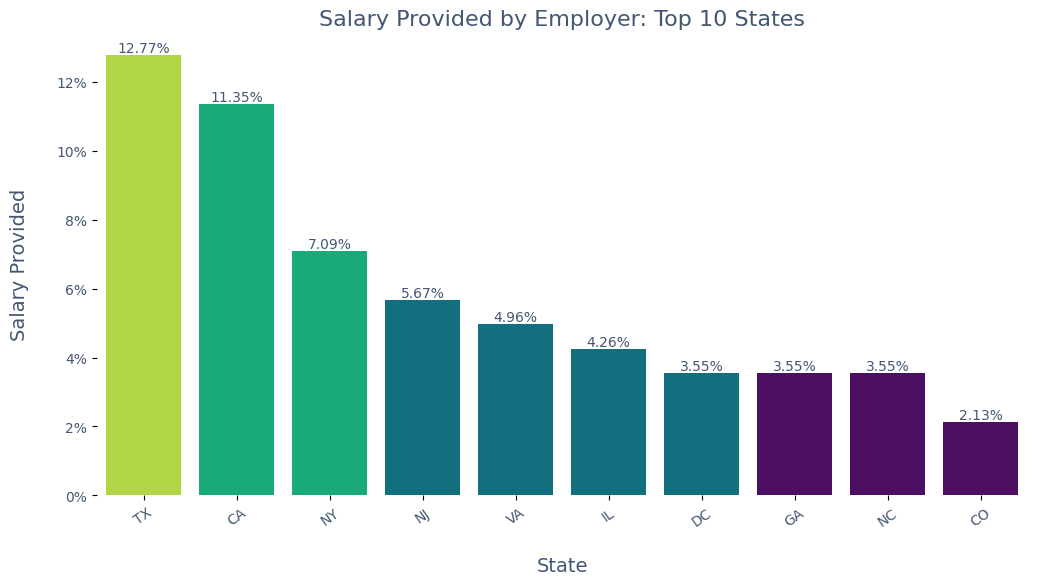

In [75]:
salaries_provided_per_country(data, 'North America', "Salary Provided by Employer: Top 10 States", 10)

Note:<br>
- A sizable chunk of job postings without a specified state drag the overall reporting salaries US up.<br>
- Also, it is worth mentioning in companies where salary is provided are higher than in companies that do not do that.

In [76]:
def show_unknown_states_salary_provided(data: pd.DataFrame):

    print("Unknown States Salary Provided:")

    percent_values = data[(data['Job_details']['Country'] == "United States") & (pd.isna(data['Job_details']['State']))]['Salary']['Employer_provided'].value_counts(normalize=True).mul(100).round(2)
    formatted_values = percent_values.apply(lambda value: f"{value}%")

    print(formatted_values)

show_unknown_states_salary_provided(data)

Unknown States Salary Provided:
True     63.64%
False    36.36%
Name: Employer_provided, dtype: object


## 3. Age of Job Postings

In [77]:
import matplotlib.ticker as mtick

def show_distribution_ratings(ax, data: pd.DataFrame, region: str, title: str, bins: int = 30, color="#00c37f", is_junior: bool = False):

    def narrow_data(data: pd.DataFrame, region: str | list[str], is_junior: bool):

        if is_junior:
            data = data[~data['Job_details']['Title'].str.contains(r'Senior|Management|Mid', flags=re.IGNORECASE)]
            data = data[data['Job_details']['Seniority'] == "Junior"]

        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(
                f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead"
            )

        plot_data = data['Job_details']['Job_age']

        return plot_data

    plot_data = narrow_data(data, region, is_junior)

    with plt.style.context('seaborn'):
        
        ax.set_title(title, size=16, color="#435672")
        sns.histplot(plot_data, ax=ax, color=color, line_kws={"edgecolor": "none"}, bins=bins)
        ax.set_xlabel('\nDays', color="#435672")
        ax.set_ylabel('Frequency\n', color="#435672")
        ax.tick_params(colors="#435672")
        ax.spines['bottom'].set_color("#435672")
        ax.spines['left'].set_color("#435672")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(plot_data)))


In [78]:
def combine_plots(title: str = "Add title here!", resolution: int = 30, is_junior: bool=False, *args):
    num_plots = len(args)
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 8, 5))

    suptitle = fig.suptitle(title, size=25, color="#435672", weight="semibold")
    suptitle.set_y(1.10)  # Adjust the vertical position to add margin

    for i, (plot_args, color) in enumerate(args):
        ax = axes[i]
        show_distribution_ratings(ax, *plot_args, color=color, bins=resolution, is_junior=is_junior)

    plt.show()

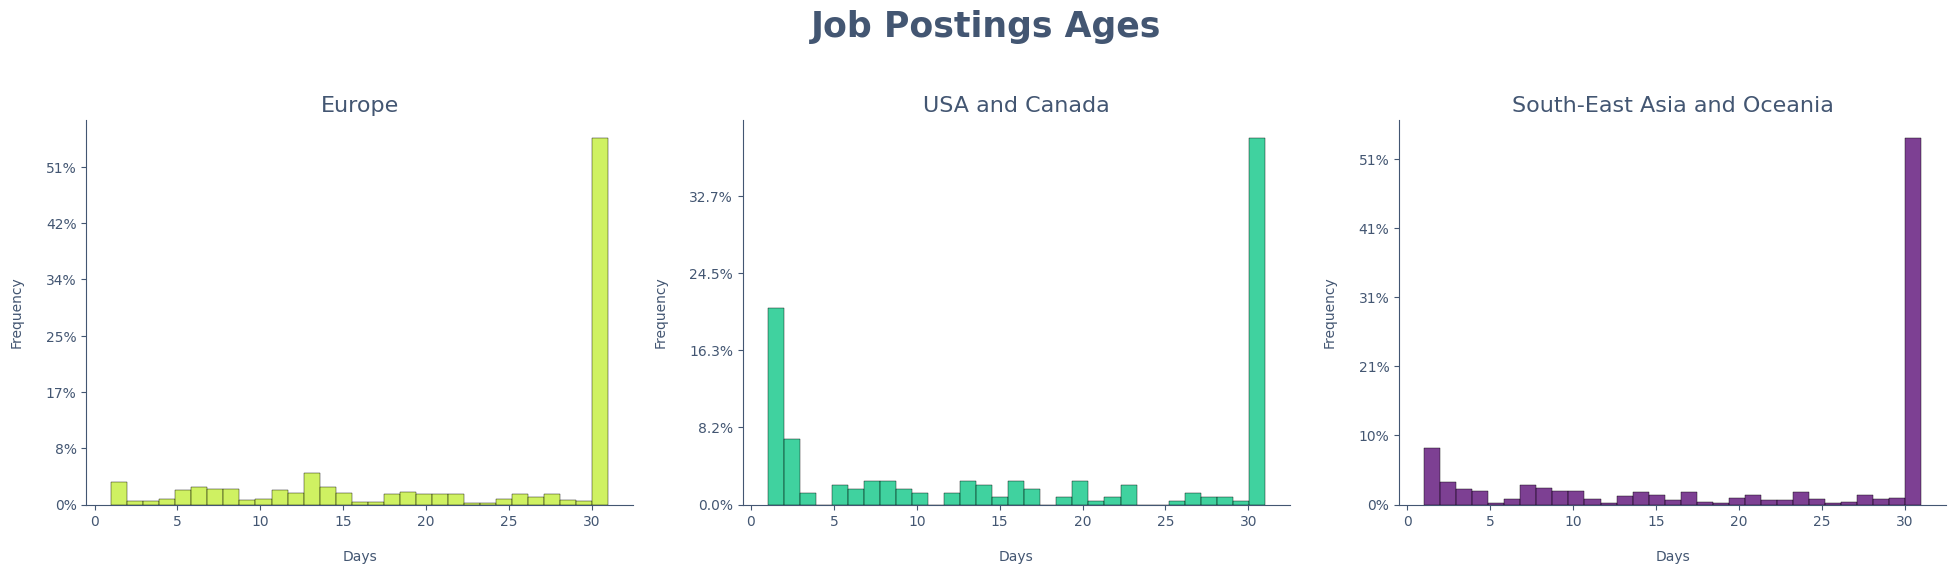

In [79]:
combine_plots(
    "Job Postings Ages",
    31,
    False,
    ((data, "Europe", "Europe"), "#bfed2d"),
    ((data, "North America", "USA and Canada"), "#00c37f"),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f"),
)

Note:<br>
- The value 31 days means that it's 30 days +. That value could be 31 days, or as 60, 100, or even more.<br>
- As you'll see most job postings are 30+ days old. Which sounds like positions that are difficult to fill.<br>
- But there could also be other explanations, simply the HR could forget to remove the posting or they still collect contacts if the new employee will not will not work out.

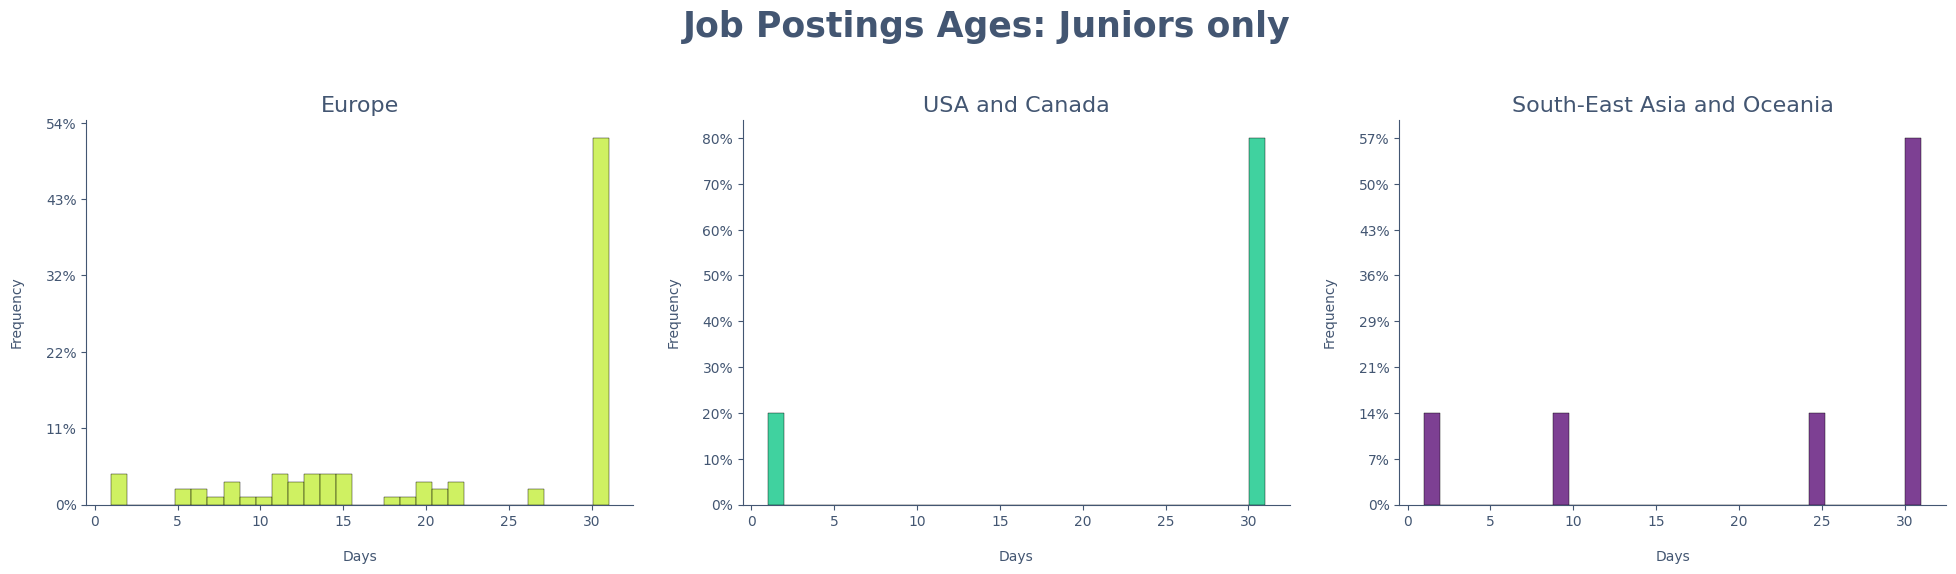

In [80]:
combine_plots(
    "Job Postings Ages: Juniors only",
    31,
    True,
    ((data, "Europe", "Europe"), "#bfed2d"),
    ((data, "North America", "USA and Canada"), "#00c37f"),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f"),
)

Note:
- For junior vacancy the prevalence of not occupied job postings is even more prevalent.

## 4. Top 10 Industries with the Highest Number of Jobs

In [81]:
import matplotlib.ticker as mtick

def show_top_industries_per_country(data: pd.DataFrame, region: str | list[str]):

    def narrow_data(data: pd.DataFrame, region: str | list[str]):

        if isinstance(region, list):
            plot_data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            plot_data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead")
            
        return plot_data
    
    def get_countries(region):
        
        if isinstance(region, list):
            title_countries = ", ".join(region)
        else:
            title_countries = region
        return title_countries

    def show_plot(data, title_countries):
        fig, ax = plt.subplots(figsize=(20, 8))

        my_palette = ['#bfed2d'] + ['#00c37f']*2 + ["#007e90"]*4 + ['#51006f']*3 + ["#d3d3d3"]

        value_counts = data['Company_info']['Sector'].str.replace(" ", "\n").value_counts()

        trim_to = 10

        values = value_counts.values.tolist()[:trim_to]
        names = value_counts.index.tolist()[:trim_to]

        nan_count = data['Company_info']['Sector'].isna().sum()

        values.append(nan_count)
        names.append("Not\nmentioned")

        tech_counts_data = {'\nSector': names, 'Percentage\n': values}
        
        plot_data = pd.DataFrame(tech_counts_data)

        p = sns.barplot(
            x=plot_data['\nSector'],
            y=plot_data['Percentage\n'],
            saturation=1,
            linewidth=0,
            palette=my_palette,
            ax=ax
        )

        p.set_title(f"\nCompany Sectors: {title_countries}\n", fontsize=25, color="#435672")
        p.set_xlabel("\nSector", fontsize=21, color="#435672")
        p.set_ylabel("Percentage\n", fontsize=21, color="#435672")
        p.yaxis.label.set_color("#435672")
        p.tick_params(colors='#435672', which='both')

        total_count = len(data['Company_info']['Sector'])
        p.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total_count))

        percentages = [f"{num / total_count * 100:.1f}%" for num in plot_data['Percentage\n'].values.tolist()]

        for i, patch in enumerate(p.patches):
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_height()
            percentage = percentages[i]
            p.annotate(percentage, (x, y), ha='center', va='bottom', color="#435672", size=21)

        sns.despine(left=True, bottom=True)
        plt.show()


    plot_data = narrow_data(data, region)

    title_countries = get_countries(region)
    
    show_plot(plot_data, title_countries)

### 4.1 Europe

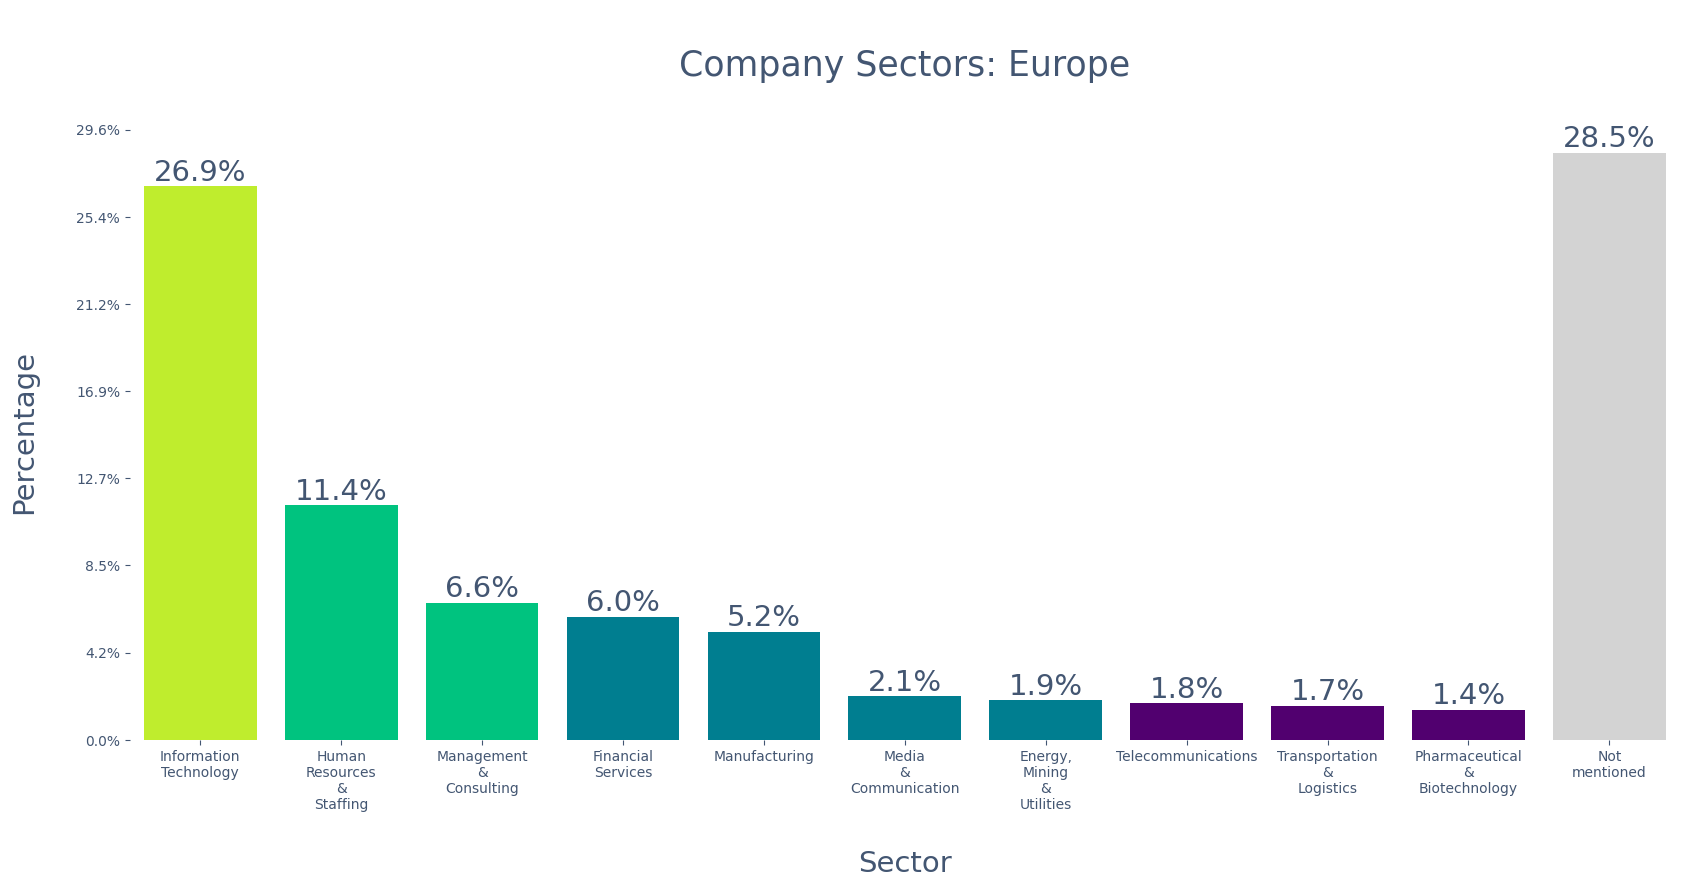

In [82]:
show_top_industries_per_country(data, 'Europe')

### 4.1 USA + Canada

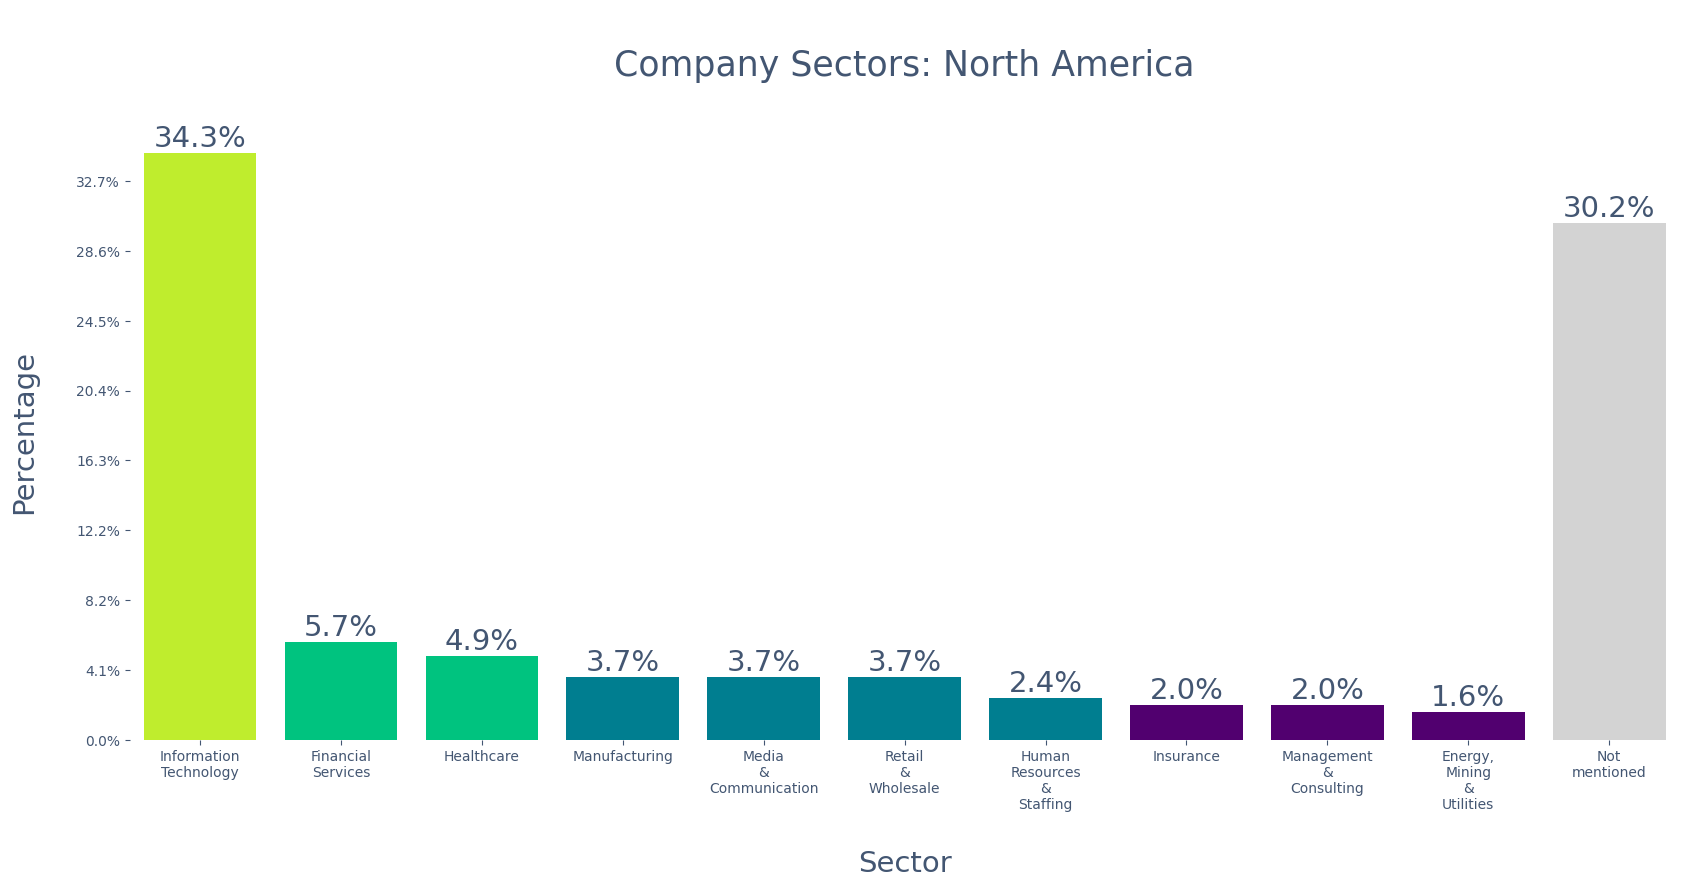

In [83]:
show_top_industries_per_country(data, 'North America')

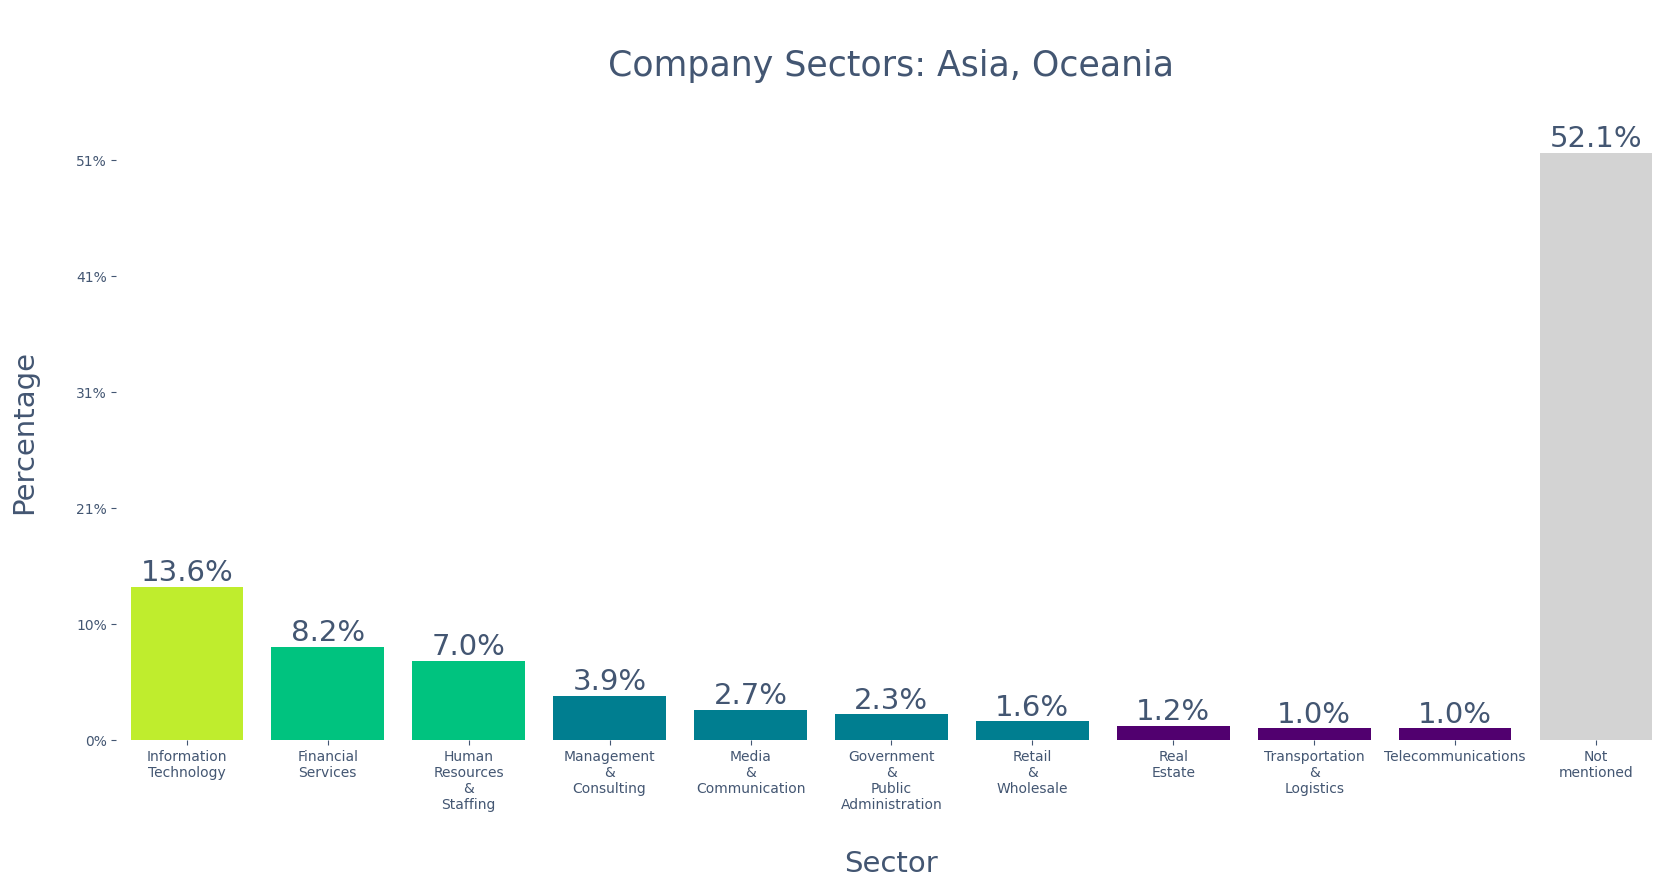

In [84]:
show_top_industries_per_country(data, ['Asia', 'Oceania'])

Note:
- The sector of IT leads the way

### 5. Top 10 Industries with the Highest Salaries

In [85]:
def show_top_salaries_per_industries(data: pd.DataFrame, region: str | list[str]):

    def narrow_data(data: pd.DataFrame, region: str | list[str]):

        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead")

        plot_data =  pd.DataFrame()
        
        plot_data['Sector'] = data['Company_info']['Sector']
        plot_data['Salary'] = data['Salary']['Avg']

        data_sorted = plot_data.sort_values(by='Salary', ascending=False)
            
        return data_sorted
    
    def get_countries(region):
        
        if isinstance(region, list):
            title_countries = ", ".join(region)
        else:
            title_countries = region
        return title_countries

    def show_plot(plot_data, title_countries):

        fig, ax = plt.subplots(figsize=(20, 8))

        my_palette = ['#bfed2d'] + ['#00c37f']*2 + ["#007e90"]*4 + ['#51006f']*4 + ["#d3d3d3"]

        plot_data['Sector'] = plot_data['Sector'].str.replace(" ", "\n")
        plot_data['Salary'] = plot_data['Salary'].round().astype(int)

        p = sns.barplot(
                data=plot_data, 
                x='Sector', 
                y='Salary', 
                saturation=1,
                linewidth=0,
                palette=my_palette,
                ax=ax
            )

        p.set_title(f"\nCompany Sectors Salary: {title_countries}\n", fontsize=25, color="#435672")
        p.set_xlabel("\nSector", fontsize=21, color="#435672")
        p.set_ylabel("Average Salary (USD)\n", fontsize=21, color="#435672")
        p.yaxis.label.set_color("#435672")
        p.tick_params(colors='#435672', which='both')

        for container in p.containers:
            p.bar_label(container,label_type="center",padding=6,size=16,color="#435672",rotation=0,
        bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#f4f8fc", "alpha": 1, "edgecolor": "#435672"})

        sns.despine(left=True, bottom=True)
        plt.show()


    plot_data = narrow_data(data, region)

    title_countries = get_countries(region)

    average_salary_by_sector = plot_data.groupby('Sector')['Salary'].mean().reset_index().sort_values(by='Salary', ascending=False).reset_index(drop=True)[:11]
# 
    nan_mean = plot_data.loc[plot_data['Sector'].isna(), 'Salary'].mean()
    average_salary_by_sector.loc[len(average_salary_by_sector)] = ['Not\nmentioned', nan_mean]

    show_plot(average_salary_by_sector, title_countries)

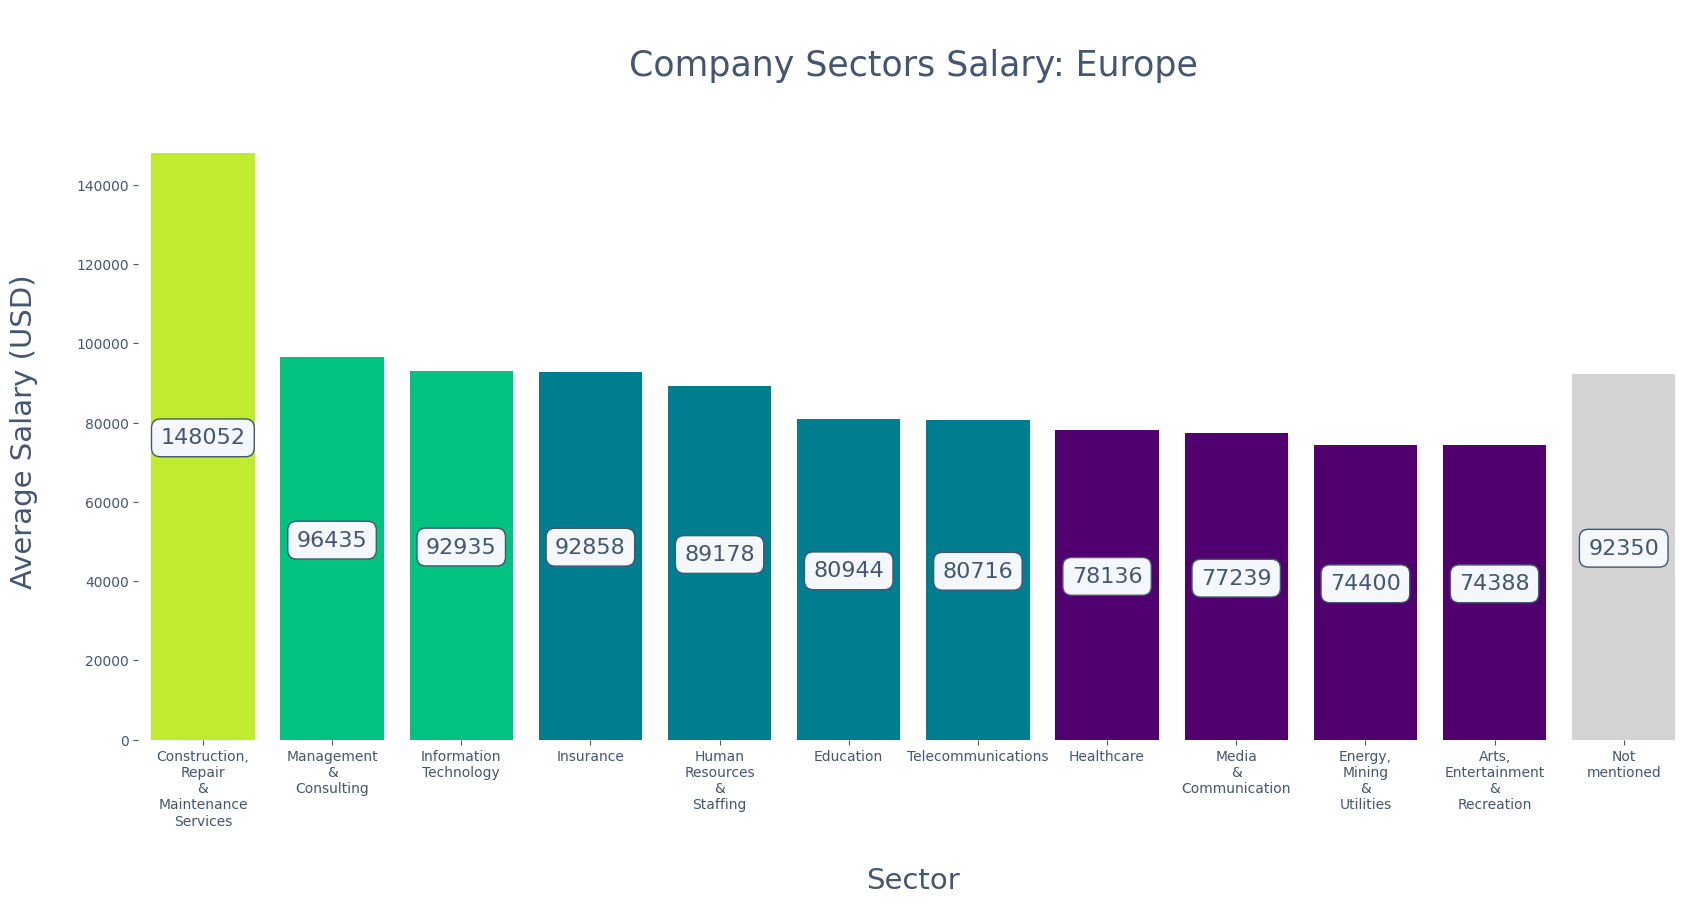

In [86]:
show_top_salaries_per_industries(data, "Europe")

To make sure if sure the results are not skewed by small samples, we will do a small check up:

In [87]:
def check_up(data: pd.DataFrame, region: str | list[str]):

    if isinstance(region, list):
        data = data[data['Job_details']['Region'].isin(region)]
    elif isinstance(region, str):
        data = data[data['Job_details']['Region'] == region]
    else:
        raise TypeError(f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead")

    narrowed_data =  pd.DataFrame()
    
    narrowed_data['Sector'] = data['Company_info']['Sector']
    narrowed_data['Salary'] = data['Salary']['Avg']

    data_sorted = narrowed_data.sort_values(by='Salary', ascending=False)

    top_salaries_sectors = data_sorted.groupby('Sector')['Salary'].mean().reset_index().sort_values(by='Salary', ascending=False)[:10]
    
    sector_counts = data_sorted[data_sorted['Sector'].isin(top_salaries_sectors['Sector'])]['Sector'].value_counts()

    sector_reindexed = sector_counts.reindex(top_salaries_sectors['Sector'])

    nan_count = len(data_sorted.loc[data_sorted['Sector'].isna(), 'Salary'])
    sector_reindexed.loc['Not mentioned'] = nan_count

    print(sector_reindexed)

check_up(data, 'Europe')

Sector
Construction, Repair & Maintenance Services     22
Management & Consulting                        157
Information Technology                         635
Insurance                                       27
Human Resources & Staffing                     269
Education                                       15
Telecommunications                              42
Healthcare                                       8
Media & Communication                           50
Energy, Mining & Utilities                      45
Not mentioned                                  673
Name: Sector, dtype: int64


A rule of thumb in statistics says that the sample size is considered "large enough" if it's greater than or equal to 30. So it is advised to take a grain of salt to results from sectors like:
- Construction, Repair & Maintenance Services
- Insurance
- Education
- Healthcare

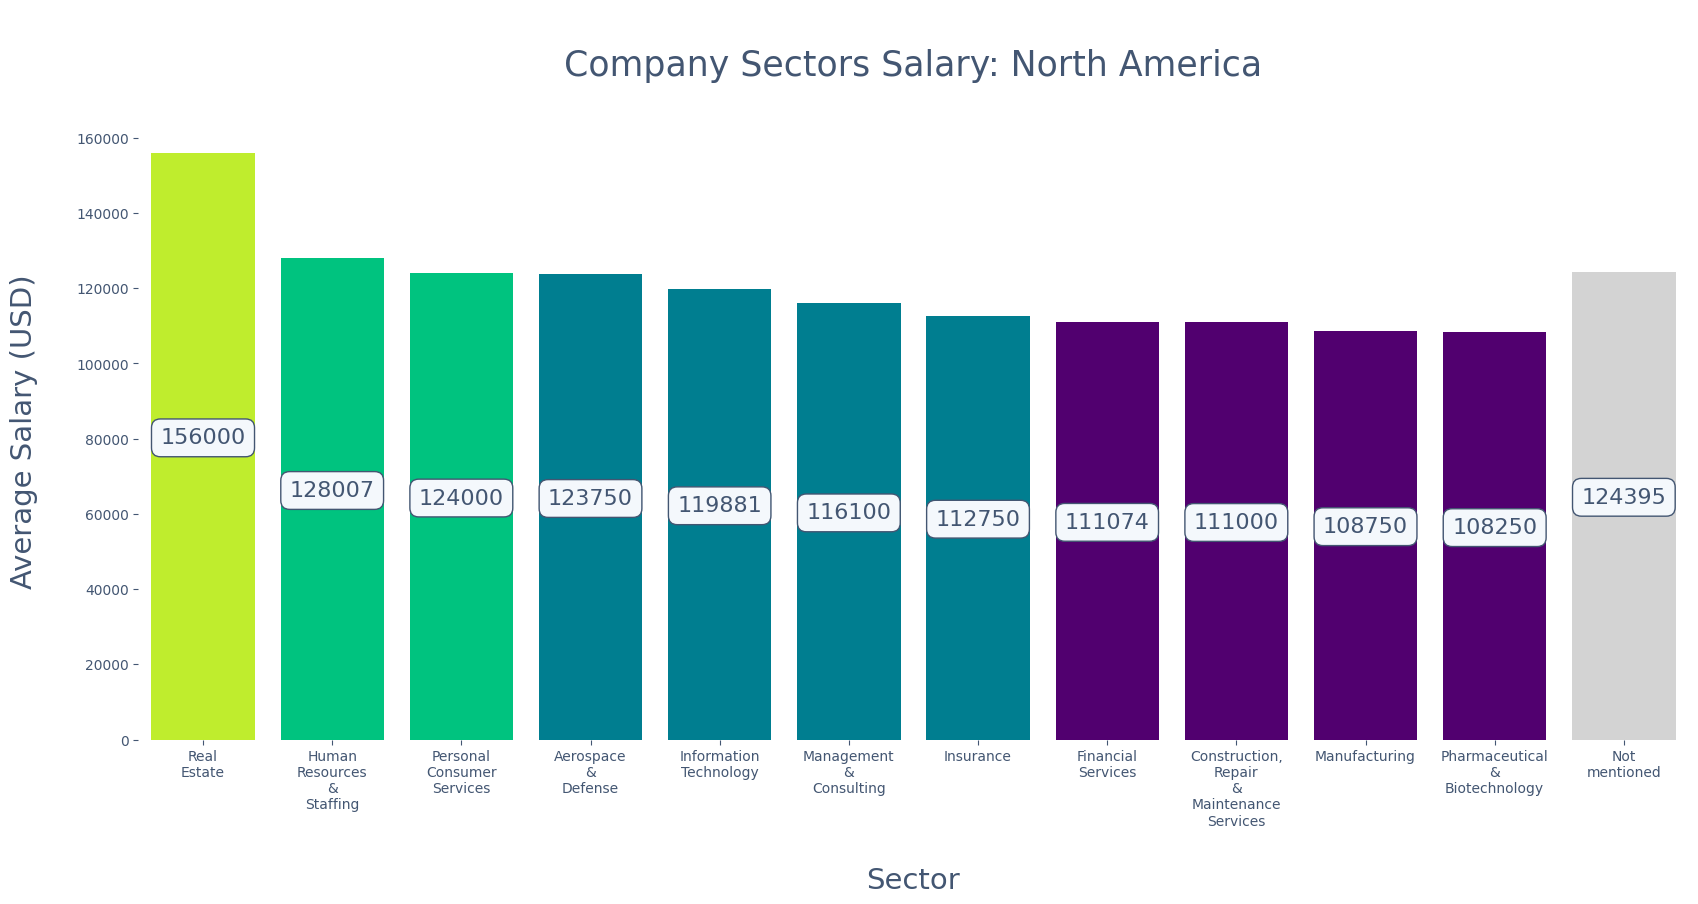

Sector
Real Estate                                     1
Human Resources & Staffing                      6
Personal Consumer Services                      1
Aerospace & Defense                             2
Information Technology                         84
Management & Consulting                         5
Insurance                                       5
Financial Services                             14
Construction, Repair & Maintenance Services     1
Manufacturing                                   9
Not mentioned                                  74
Name: Sector, dtype: int64


In [88]:
show_top_salaries_per_industries(data, "North America")
check_up(data, "North America")

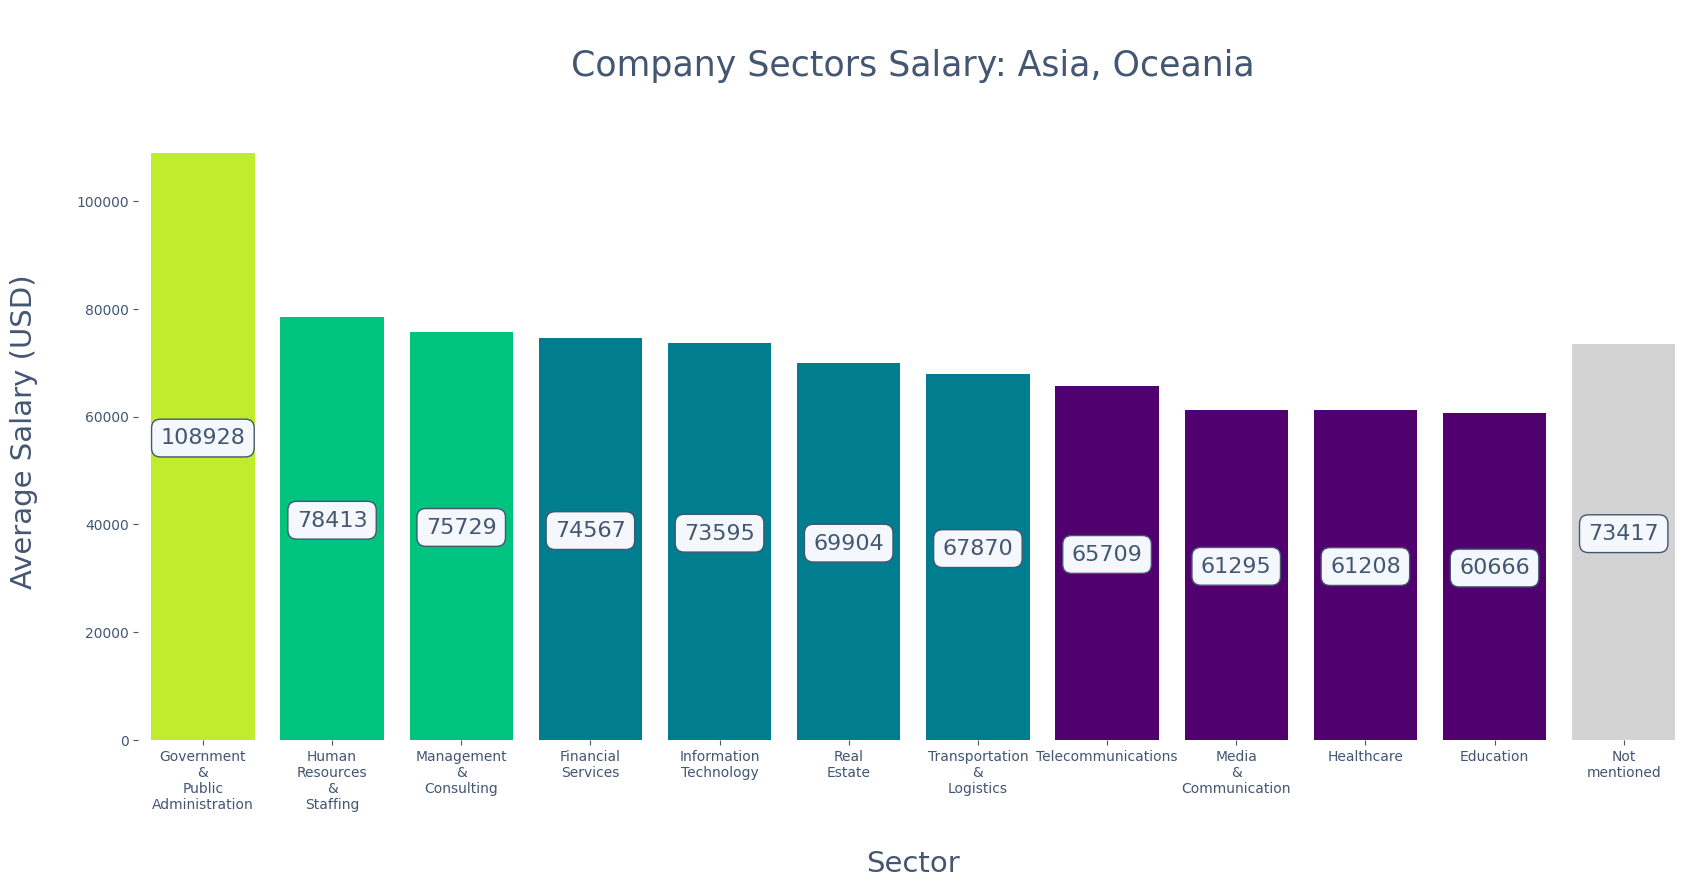

Sector
Government & Public Administration     11
Human Resources & Staffing             34
Management & Consulting                19
Financial Services                     40
Information Technology                 66
Real Estate                             6
Transportation & Logistics              5
Telecommunications                      5
Media & Communication                  13
Healthcare                              4
Not mentioned                         253
Name: Sector, dtype: int64


In [89]:
show_top_salaries_per_industries(data, ["Asia", "Oceania"])
check_up(data, ["Asia", "Oceania"])

In [90]:
data[(data['Job_details']['Region'].isin(["Asia", "Oceania"]) & (data['Company_info']['Sector'] == "Government & Public Administration"))]['Job_details']['Country'].value_counts()

Singapore      9
New Zealand    2
Name: Country, dtype: int64

Note:
- The unusual high salaries in gov is skewed by Singapore

## 6. Companies with Maximum Number of Job Openings

In [91]:
import matplotlib.ticker as ticker

def show_top_employers_by_vacancy(data: pd.DataFrame, region: str | list[str]):

    def narrow_data(data: pd.DataFrame, region: str | list[str]):

        if isinstance(region, list):
            plot_data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            plot_data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead")
            
        return plot_data
    
    def get_countries(region):
        
        if isinstance(region, list):
            title_countries = ", ".join(region)
        else:
            title_countries = region
        return title_countries

    def show_plot(plot_data, title_countries):

        fig, ax = plt.subplots(figsize=(20, 8))

        my_palette = ['#bfed2d'] + ['#00c37f']*2 + ["#007e90"]*4 + ['#51006f']*4

        plot_data.loc[plot_data['Company_info']['Name'] == "메가존", ('Company_info', 'Name')] = "MEGAZONE"

        top_industries = plot_data['Company_info']['Name'].str.replace(" ", "\n").value_counts().index[:10]

        p = sns.countplot(
            x=plot_data['Company_info']['Name'].str.replace(" ", "\n"),
            order=top_industries,
            saturation=1,
            linewidth=0,
            palette=my_palette,
            ax=ax
        )

        p.set_title(f"\nTop employers by jobs openings: {title_countries}\n", fontsize=25, color="#435672")
        p.set_xlabel("\nCompanies", fontsize=21, color="#435672")
        p.set_ylabel("Jobs\n", fontsize=21, color="#435672")
        p.yaxis.label.set_color("#435672")
        p.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        p.tick_params(colors='#435672', which='both')

        for container in p.containers:
            p.bar_label(container,label_type="center",padding=6,size=25,color="#435672",rotation=0,
        bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#f4f8fc", "alpha": 1, "edgecolor": "#435672"})
            
        sns.despine(left=True, bottom=True)
        plt.show()


    plot_data = narrow_data(data, region)

    title_countries = get_countries(region)
    
    show_plot(plot_data, title_countries)

### 6.1 Europe

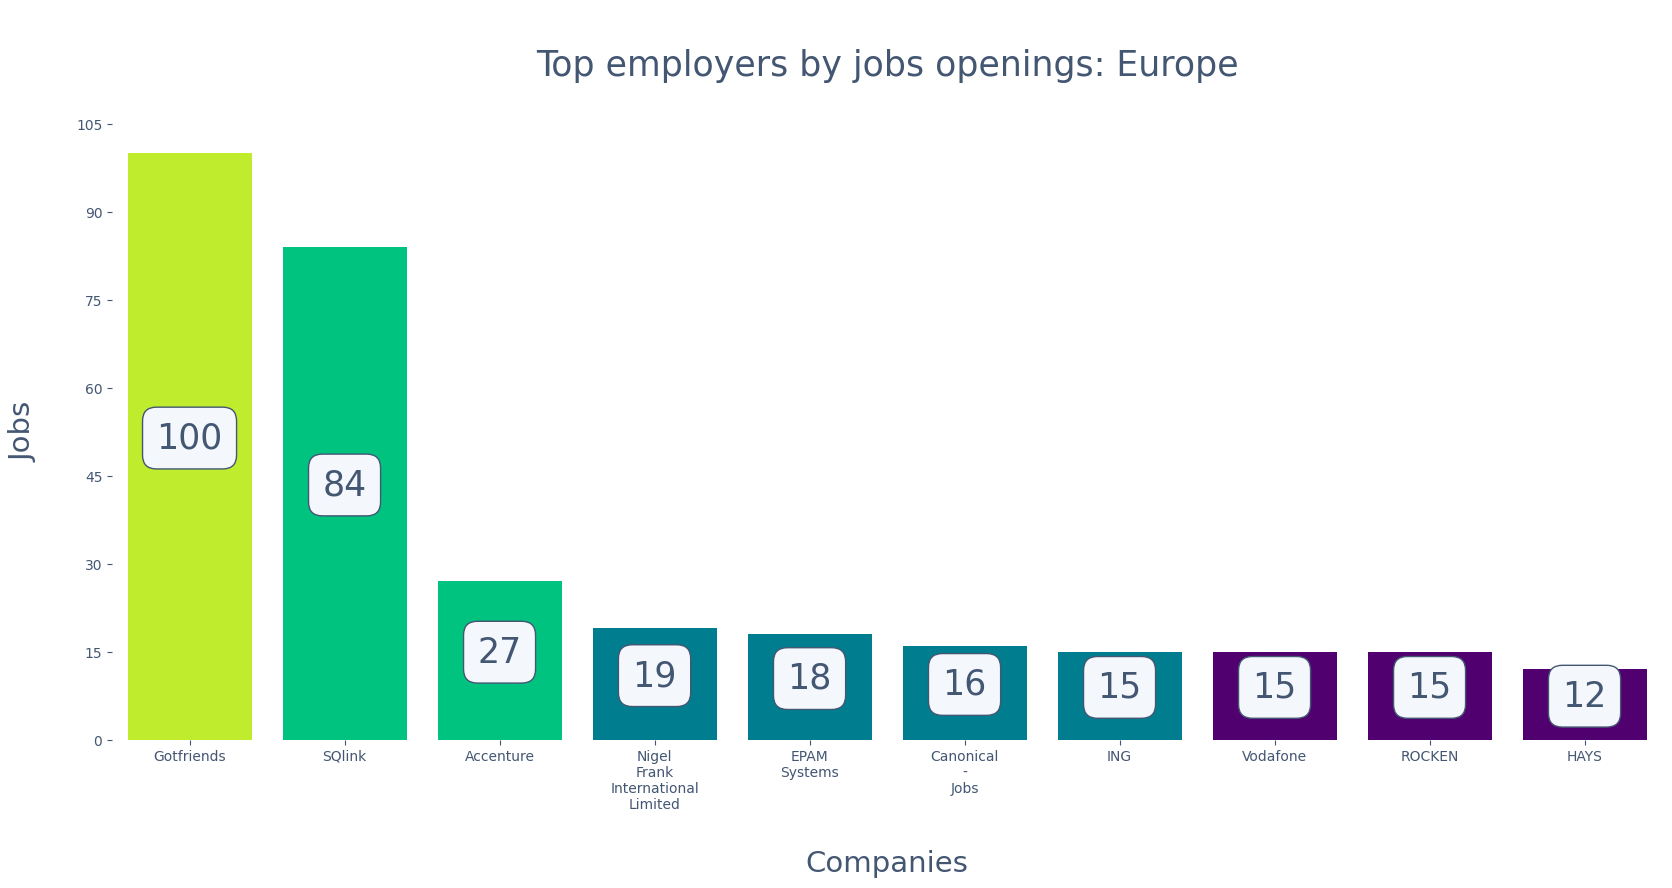

In [92]:
show_top_employers_by_vacancy(data, "Europe")

Note:
- The `Gotfriends`, `HAYS`, and `ROCKEN` are job Tech Recruiting Firm
- `SQLink`, `Accenture`, `Nigel Frank International`, and `EPAM Systems` are IT Solutions Providers
- `Canonical` is a developer and supporter the Ubuntu, the most popular Linux distro so far
- `ING` is a popular banking brand in Europe, it operates in more than 40 countries
- `Vodafone` is a telecommunications company

### 6.2 USA + Canada

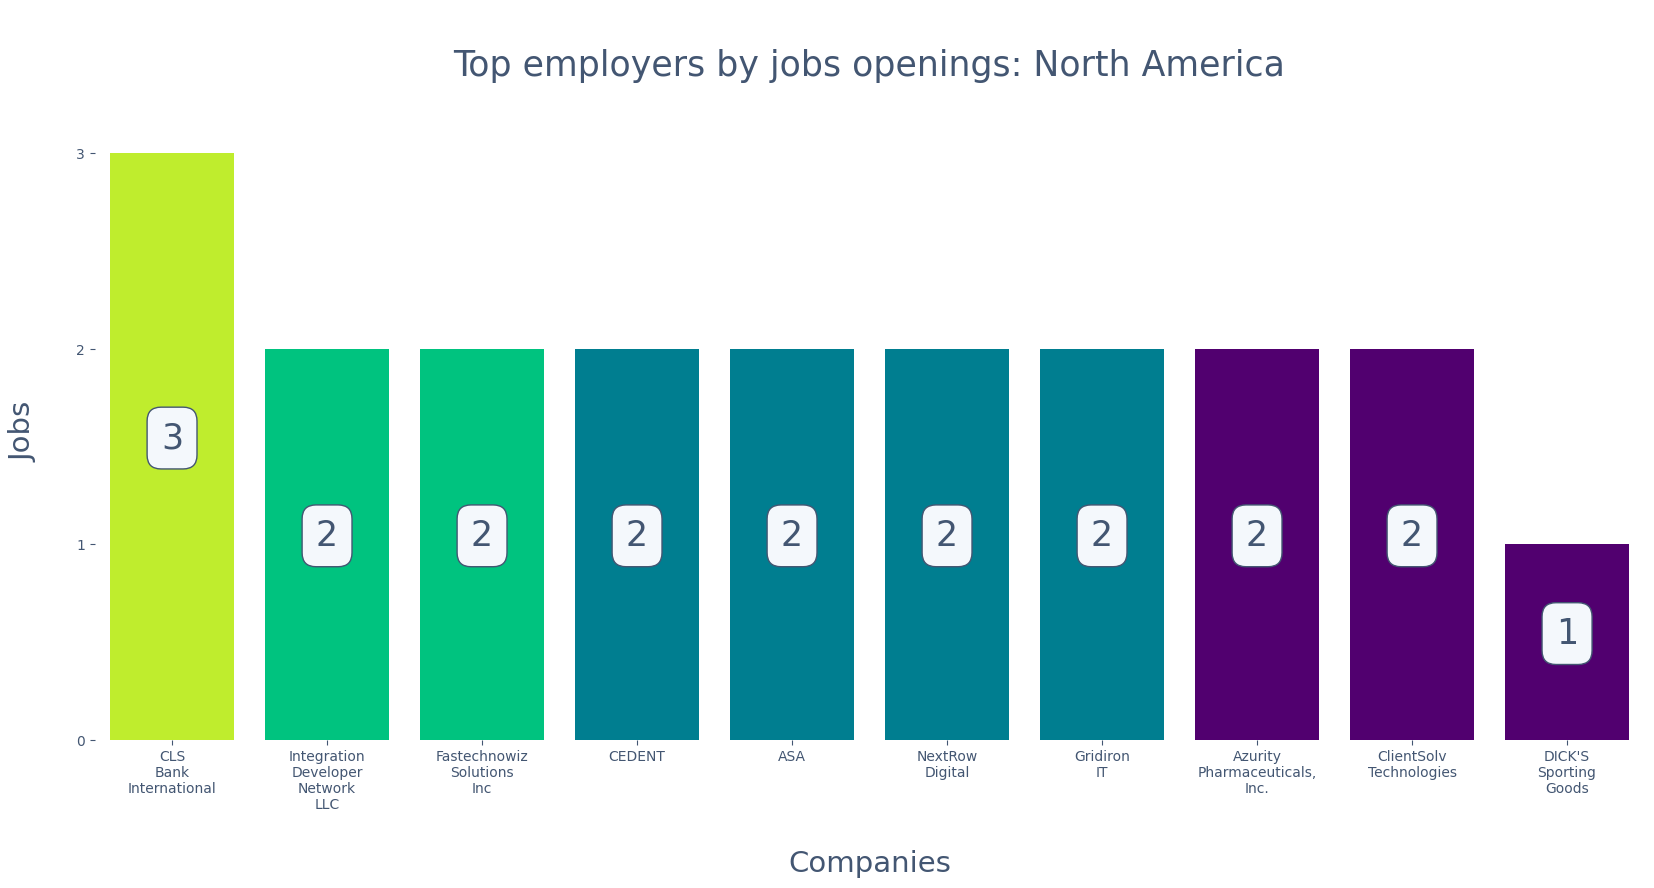

In [93]:
show_top_employers_by_vacancy(data, "North America")

Note:
- The `CLS Bank International`, `Fastechnowiz Solutions Inc`, `CEDENT`, `ClientSolv ` are IT Solutions Providers
- `ASA` is a real estate brokerage and advisory firm
- `NextRow Digital` is an IT Solutions Providers, but it specialized in marketing
- `Gridiron IT` is a job Tech Recruiting Firm
- `Azurity Pharmaceuticals` specializes in providing treatments for patients requiring customized formulations
- `DICK'S Sporting Goods` besides the unusual name is sporting goods chain with equipment

### 6.3 South-East Asia and Oceania

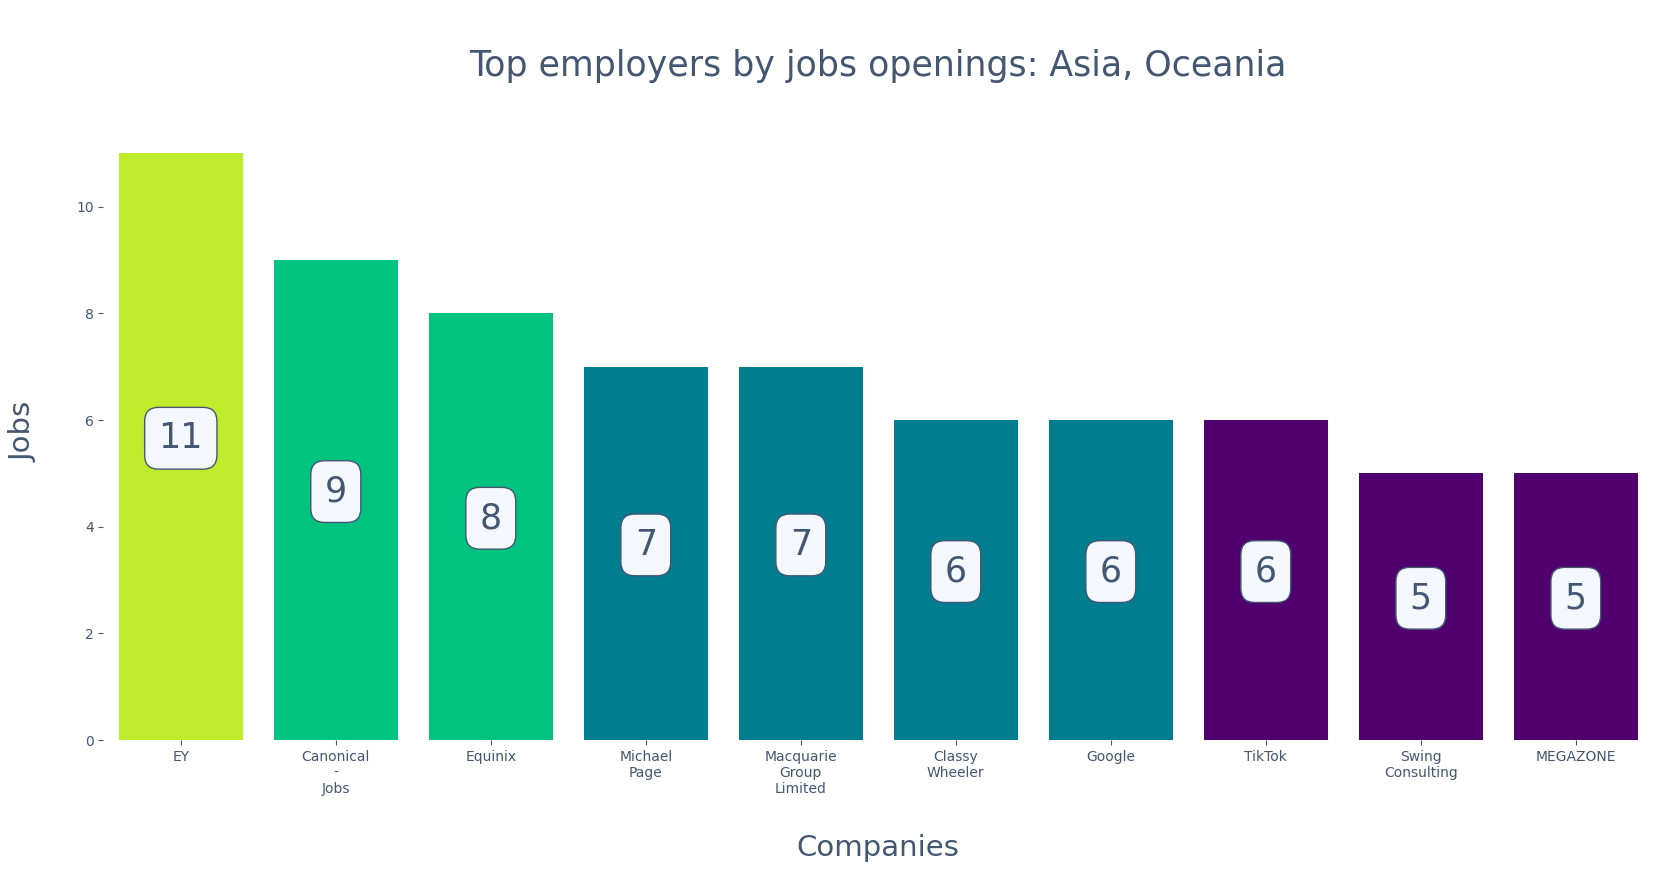

In [94]:
show_top_employers_by_vacancy(data, ["Asia", "Oceania"])

Note:
- `Ernst & Young aka EY` is an assurance, consulting, strategy and transactions, and tax services firm
- `Canonical` is a developer and supporter the Ubuntu, the most popular Linux distro so far
- `Equinix` specializes in Internet connection and data centers.
- `Michael Page`, `Classy Wheeler` are job Tech Recruiting Firms
- `Macquarie Group Limited` is a financial services group
- `Google`, `Tik Tok` are Big IT Brands
- `DICK'S Sporting Goods` besides the unusual name is sporting goods chain with equipment
- `Swing Consulting` is an IT Solutions Providers
- The last one `메가존 aka MEGAZONE` is a Korean IT Cloud consulting firm (Mainly AWS)

## 7. Company Ratings

In [95]:
def show_distribution_ratings(ax, data: pd.DataFrame, region: str, title: str, column: str, bins: int = 30, color: str="#00c37f"):
    def narrow_data(data: pd.DataFrame, region: str | list[str]):
        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(
                f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead"
            )

        plot_data = data['Company_info'][column]

        return plot_data

    plot_data = narrow_data(data, region)

    with plt.style.context('seaborn'):
        ax.set_title(title, size=16, color="#435672")
        sns.histplot(plot_data, ax=ax, color=color, line_kws={"edgecolor": "none"}, bins=20)
        ax.set_xlabel('\nDays', color="#435672")
        ax.set_ylabel('Frequency\n', color="#435672")
        ax.tick_params(colors="#435672")
        ax.spines['bottom'].set_color("#435672")
        ax.spines['left'].set_color("#435672")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(plot_data)))

In [96]:
def combine_plots(title: str, resolution: int = 30, *args):
    num_plots = len(args)
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 8, 5))

    suptitle = fig.suptitle(title, size=25, color="#435672", weight="semibold")
    suptitle.set_y(1.10)  # Adjust the vertical position to add margin

    for i, (plot_args, color, column) in enumerate(args):
        ax = axes[i]
        show_distribution_ratings(ax, *plot_args, color=color, bins=resolution, column=column)

    plt.show()

In [97]:
def show_company_characteristic_occurrence(ax, data: pd.DataFrame, region: str, title: str, column: str, color: str="#00c37f"):
    
    def narrow_data(data: pd.DataFrame, region: str | list[str]):
        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(
                f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead"
            )
        return data

    def count_rating_occurrence(data: pd.DataFrame, column: str):
        
        any_version_control_count = data['Company_info'][column].count()
        no_version_control_count = data['Company_info'][column].isna().sum()
        plot_data = pd.DataFrame({
            column: ["Yes", "No"],
            'Count': [any_version_control_count, no_version_control_count],
        })
        plot_data.columns = [column, 'Count']
        return plot_data

    data = narrow_data(data, region)
    plot_data = count_rating_occurrence(data, column)

    ax.set_title(title, size=16, color="#435672")
    colors = [color, 'lightgray']
    labels = plot_data[column]
    sizes = plot_data['Count']
    explode = [0.05, 0]
    autopct_format = '%1.1f%%'
    label_kwargs = {'fontsize': 12, 'color': '#435672'}

    wedges, text, autotexts = ax.pie(
        sizes, 
        labels=labels, 
        colors=colors, 
        autopct=autopct_format, 
        startangle=90, 
        pctdistance=0.85,
        explode=explode,
        textprops=label_kwargs
    )

    for (i, autotext)in enumerate(autotexts):
        autotext.set_fontsize(14)
        autotext.set_color('white')
        autotext.set_text(autotext.get_text())
        autotext.set_weight("bold")
        if i == 1:
            color = 'lightgray'
        autotext.set_bbox(dict(facecolor=color, edgecolor=color, pad=2.0))

    ax.axis('equal')

In [98]:
def combine_plots_companies_characteristic(title: str, *args):
    num_plots = len(args)
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 8, 5))

    suptitle = fig.suptitle(title, size=25, color="#435672", weight="semibold")
    suptitle.set_y(1.10)  # Adjust the vertical position to add margin

    for i, (plot_args, color, column) in enumerate(args):

        ax = axes[i]
        show_company_characteristic_occurrence(ax, *plot_args, color=color, column=column)

    plt.show()

Attention!: Please take note that the y-axis is different for each plot!

### 7.1 Ratings

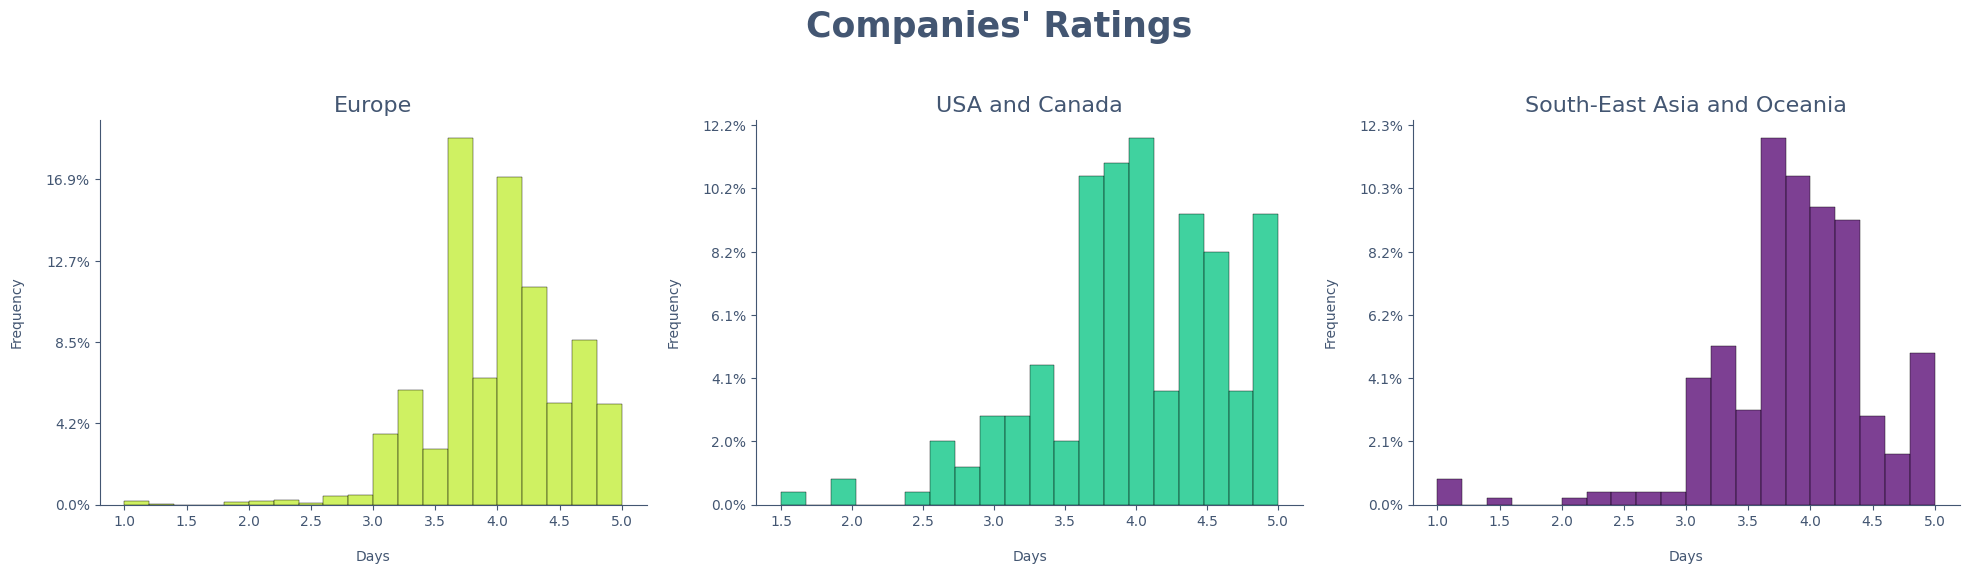

In [99]:
column = 'Rating'

combine_plots(
    "Companies' Ratings",
    20,
    ((data, "Europe", "Europe"), "#bfed2d", column),
    ((data, "North America", "USA and Canada"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f", column),
)

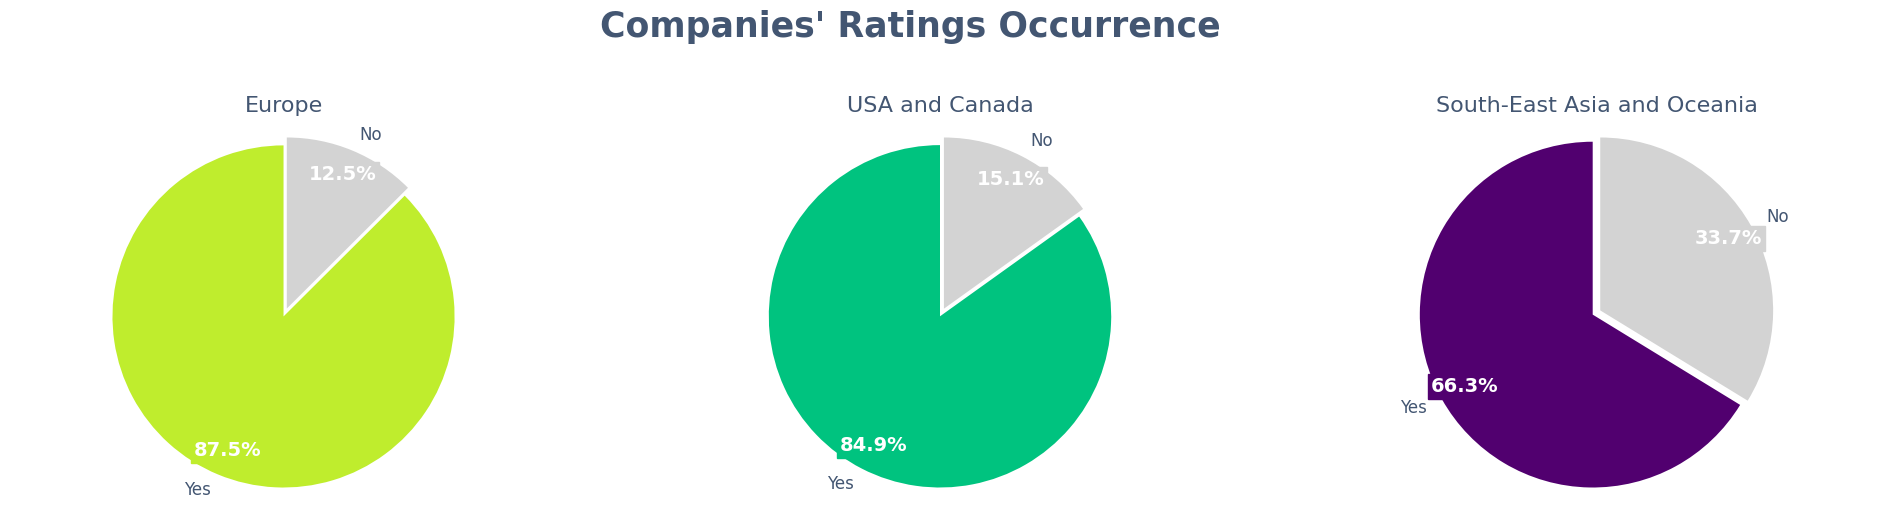

In [100]:
combine_plots_companies_characteristic(
    "Companies' Ratings Occurrence",
    ((data, "Europe", "Europe"), "#bfed2d", column),
    ((data, "North America", "USA and Canada"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f", column),
)

Note:
- To get any rates from the employees the company could be too young, too small, or be in a place where Glassdoor is not very popular.

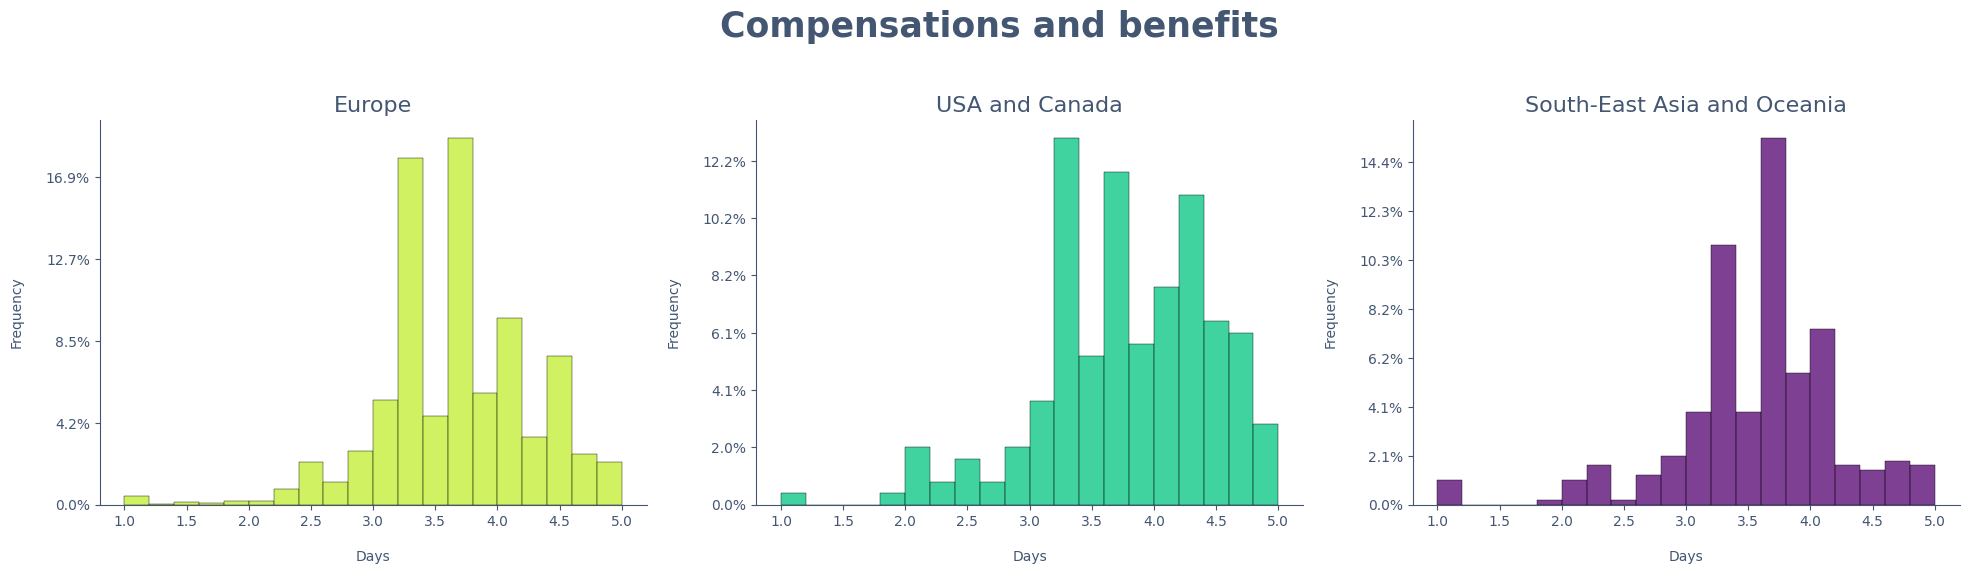

In [101]:
column = 'Comp_&_benefits'

combine_plots(
    "Compensations and benefits",
    20,
    ((data, "Europe", "Europe"), "#bfed2d", column),
    ((data, "North America", "USA and Canada"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f", column),
)

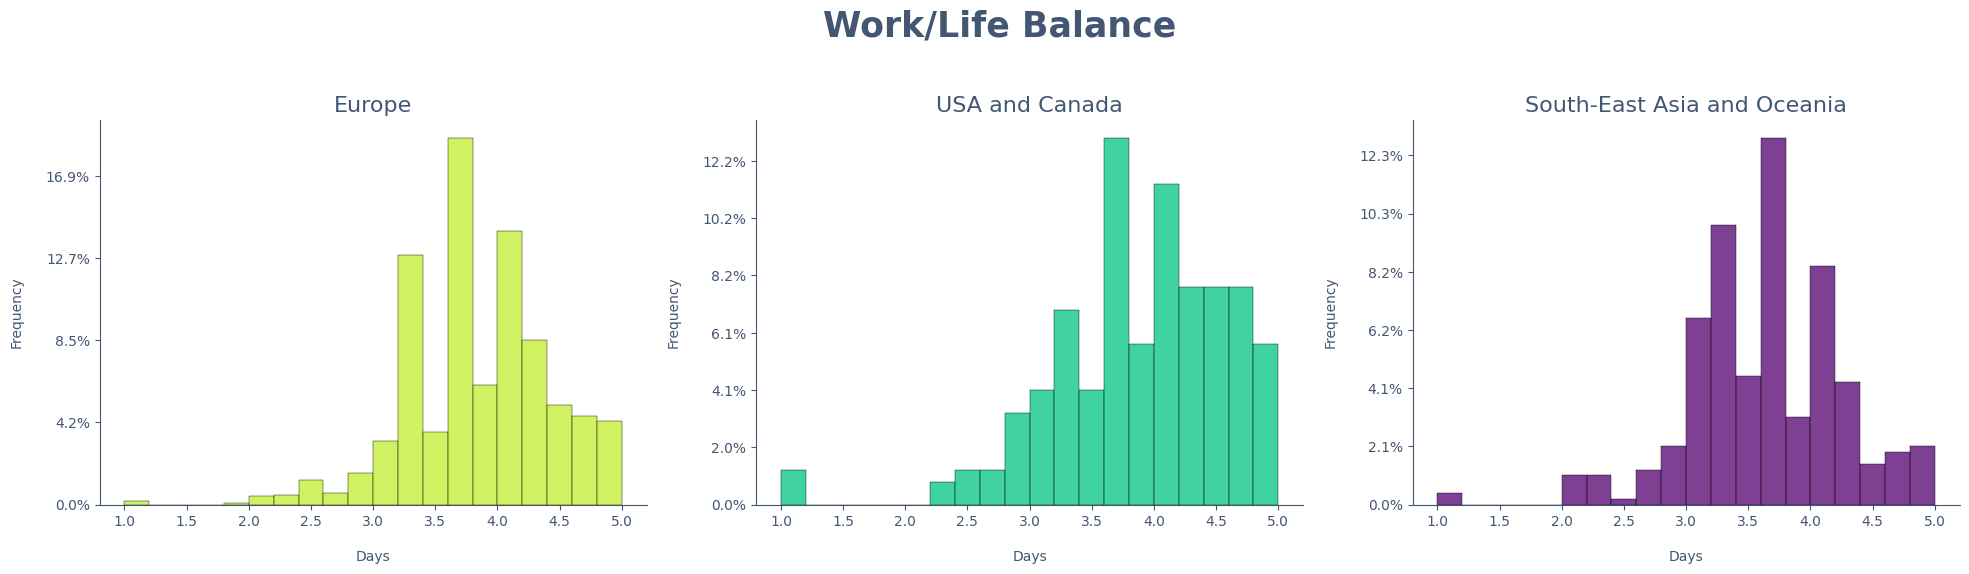

In [102]:
column = 'Work/Life_balance'

combine_plots(
    "Work/Life Balance",
    20,
    ((data, "Europe", "Europe"), "#bfed2d", column),
    ((data, "North America", "USA and Canada"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f", column),
)

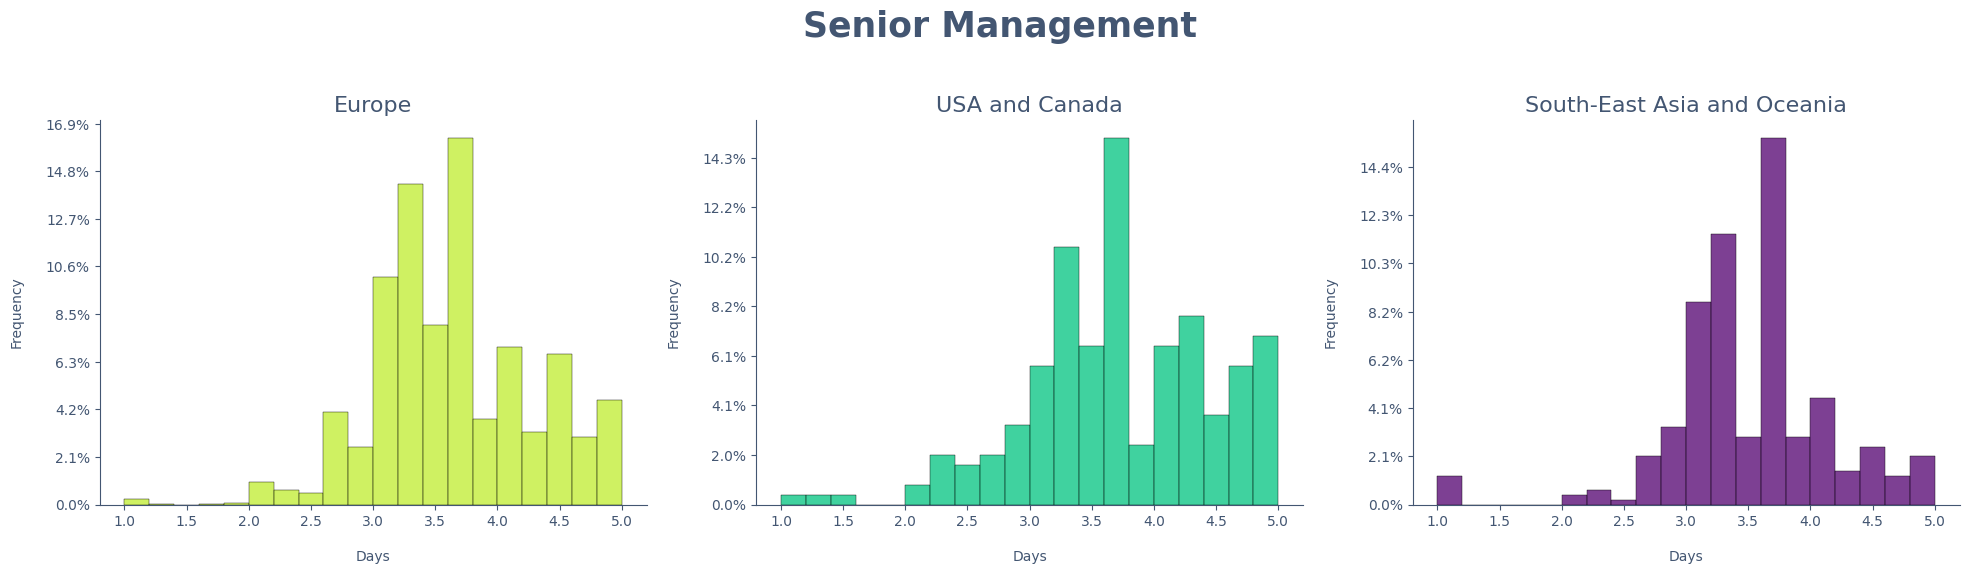

In [103]:
column = 'Senior_management'

combine_plots(
    "Senior Management",
    20,
    ((data, "Europe", "Europe"), "#bfed2d", column),
    ((data, "North America", "USA and Canada"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f", column),
)

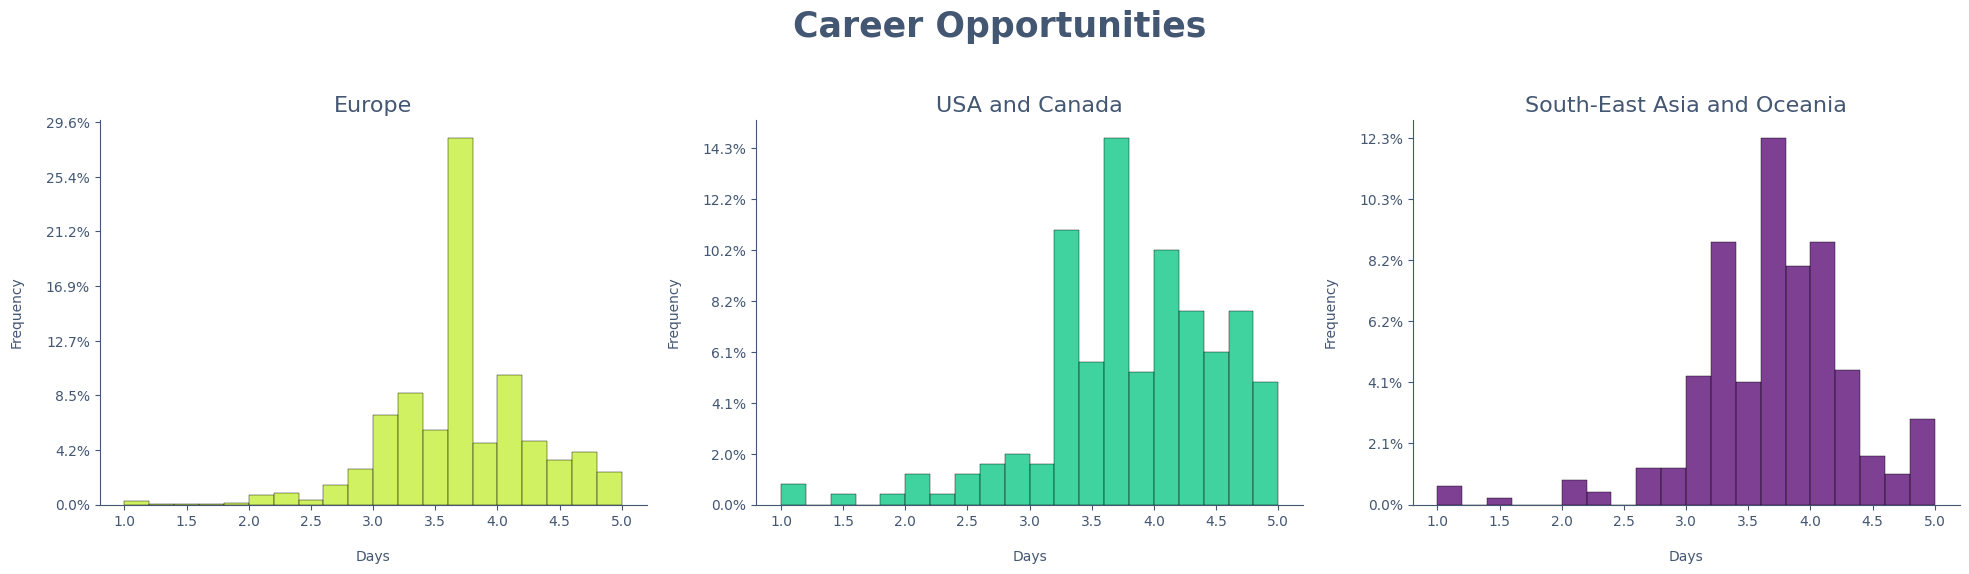

In [104]:
column = 'Career_opportunities'

combine_plots(
    "Career Opportunities",
    20,
    ((data, "Europe", "Europe"), "#bfed2d", column),
    ((data, "North America", "USA and Canada"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f", column),
)

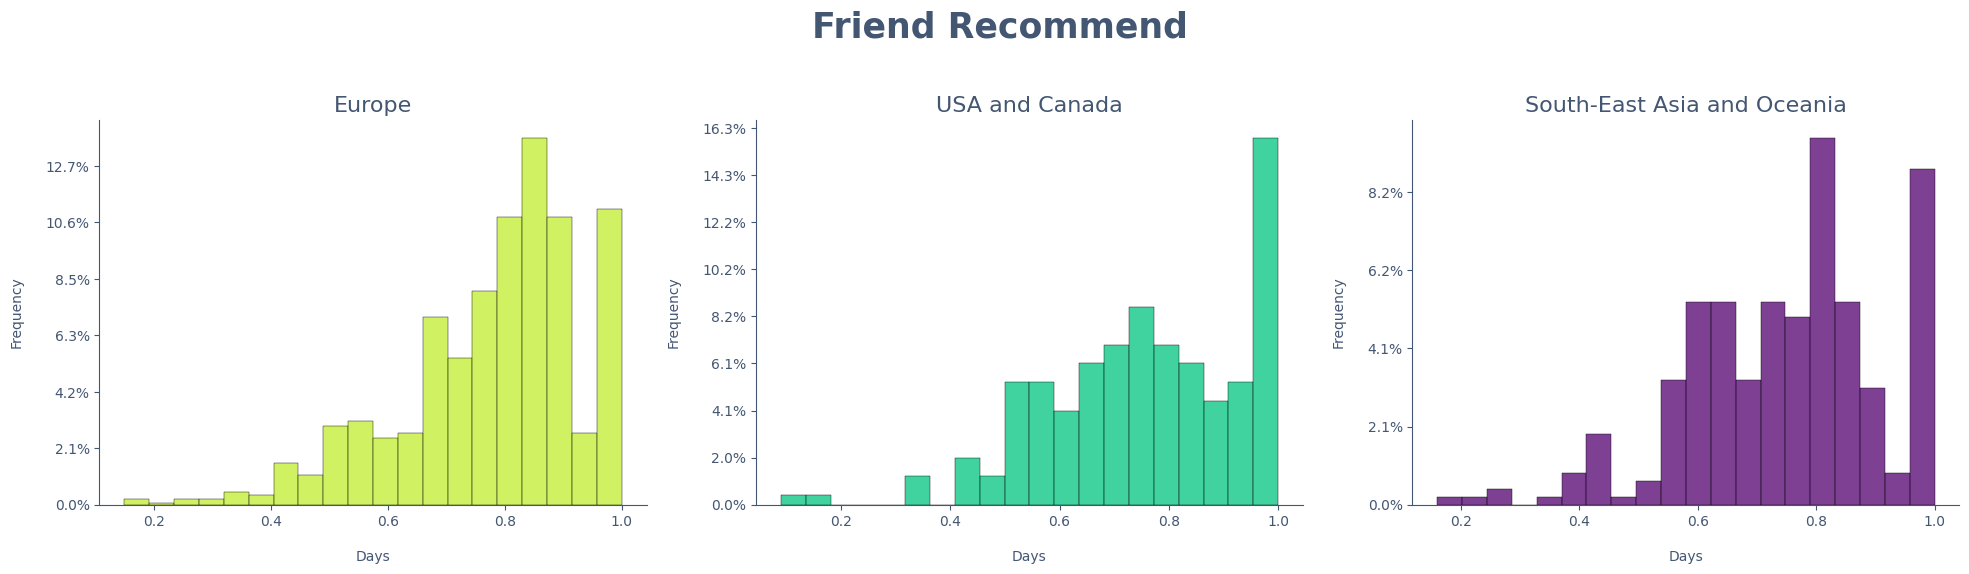

In [105]:
column = 'Friend_recommend'

combine_plots(
    "Friend Recommend",
    20,
    ((data, "Europe", "Europe"), "#bfed2d", column),
    ((data, "North America", "USA and Canada"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f", column),
)

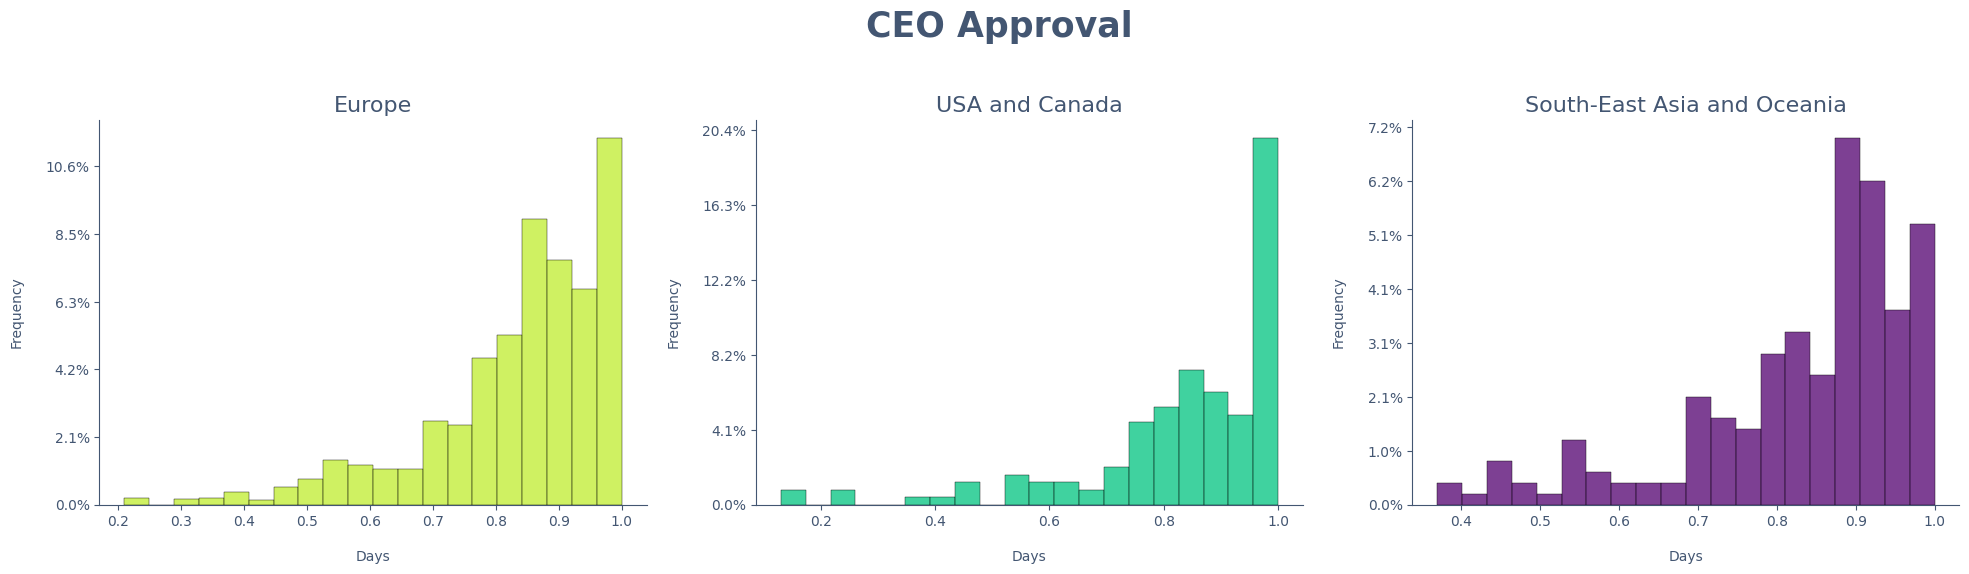

In [106]:
column = 'CEO_approval'

combine_plots(
    "CEO Approval",
    10,
    ((data, "Europe", "Europe"), "#bfed2d", column),
    ((data, "North America", "USA and Canada"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f", column),
)

Note:
- The ratings among employees are roughly similar between the regions

### 7.2 Opinions

In [107]:
from wordcloud import WordCloud
import re
import nltk
import matplotlib.pyplot as plt
import pandas as pd

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def show_word_cloud(data: pd.DataFrame, positive_comments: bool = True):
    def get_the_input_string(comment: str):
        clean_string = re.sub(r'\[|\]', '', comment)
        pattern = r'\"(.*?)(?<!\\)\"'
        parsed_comment = ' '.join(re.findall(pattern, clean_string))
        return parsed_comment

    plot_data = data.dropna()
    plot_data = plot_data.apply(get_the_input_string)
    all_comments = ' '.join(plot_data.values.tolist())

    if positive_comments:
        palette = "crest"
        title = "Positive Comments:\n"
        title_color = "#00b91a"
    else:
        palette = "rocket"
        title = "Negative Comments:\n"
        title_color = "#ff0014"

    wordcloud = WordCloud(width=800, height=400, max_words=20, background_color='white', colormap=palette).generate(all_comments)

    with plt.style.context('seaborn'):
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=25, color=title_color, weight="bold")
        plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
def count_topics_in_comments(
            data: pd.DataFrame, 
            column: str,
            phrases_to_count: list[str | list[str]],
            title: str,
        ):

    def make_list_of_strings(comment: str):
        clean_string = re.sub(r'\[|\]', '', comment)
        pattern = r'\"(.*?)(?<!\\)\"'
        parsed_comments = re.findall(pattern, clean_string)
        return parsed_comments
    
    def get_list_of_comments(comments: pd.core.series.Series) -> str:

        comments_non_empty = comments.dropna()
        comments_lower = comments_non_empty.str.lower()
        comments_list = comments_lower.apply(lambda comment: make_list_of_strings(comment)).tolist()

        return comments_list
    
    def count_phrase(companies_comments: list[list[str]], phrase: list[str] | str):
        
        phrase_count = 0

        if isinstance(phrase, str):
            for one_company_comments in companies_comments:
                for comment in one_company_comments:
                    if phrase in comment:
                        phrase_count += 1
                        break

        elif isinstance(phrase, list):
            for one_company_comments in companies_comments:
                for comment in one_company_comments:
                    for subphrase in phrase:
                        if subphrase in comment:
                            phrase_count += 1
                            break

        else:
            raise TypeError(f"The phrase is of wrong type:\n{phrase}\n{type(phrase)}")

        return phrase_count

    
    def print_results( companies_comments: list[list[str]], phrases_to_count: list, num_companies: int, title: str):

        results = {}

        for phrase in phrases_to_count:

            phrase_count = count_phrase(companies_comments, phrase)

            if isinstance(phrase, list):

                phrase = ", ".join(phrase)

            results[phrase] = phrase_count


        sorted_results = dict(sorted(results.items(), key=lambda x: x[1], reverse=True))
        percent_results = {key: '{:,.2%}'.format(value / num_companies) for key, value in sorted_results.items()}

        print(title)
        print("-"*len(title))
        for result, counter in percent_results.items():
            print(f"{result}: {counter}")



    comments = data['Company_info'][column]

    comments_list = get_list_of_comments(comments)

    num_companies = len(data)

    print_results(comments_list, phrases_to_count, num_companies, title)


In [109]:

topics = [
        ["balance", "harmony", "equilibrium"],
        ["people", "colleagues", "folks", "team", "professionals", "personnel"],
        ["work", "responsibilities", "assignments", "tasks", "duties"], 
        ["management", "leadership", "managerial skills", "administration", "supervision"], 
        ["salary", "salaries", "compensation", "remuneration", "pay", "earnings"],
        ["perks", "benefit", "benefits"],
    ]

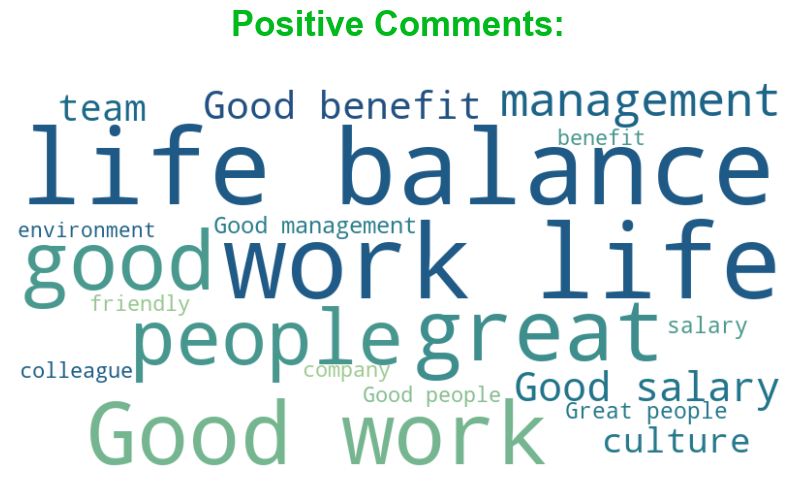

In [110]:
show_word_cloud(data['Company_info']['Pros'], True)

In [111]:
count_topics_in_comments(data, 'Pros', topics, "Positives counter:")

Positives counter:
------------------
people, colleagues, folks, team, professionals, personnel: 73.85%
work, responsibilities, assignments, tasks, duties: 72.56%
salary, salaries, compensation, remuneration, pay, earnings: 45.31%
perks, benefit, benefits: 37.94%
management, leadership, managerial skills, administration, supervision: 30.45%
balance, harmony, equilibrium: 28.86%


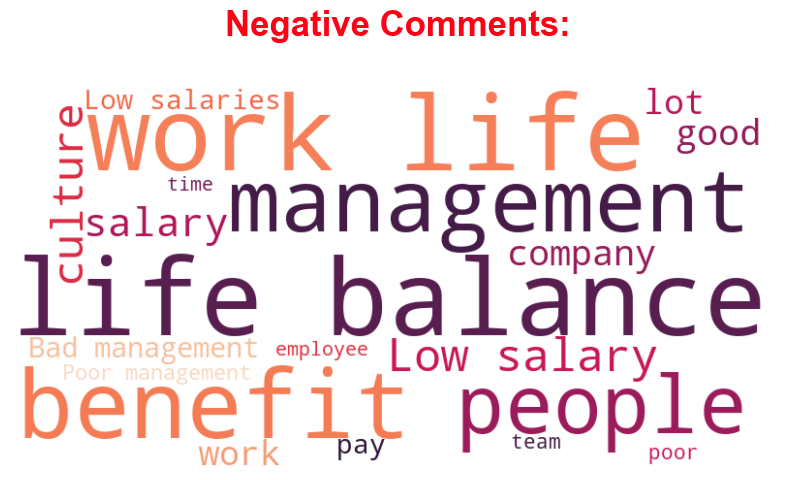

In [112]:
show_word_cloud(data['Company_info']['Cons'], False)

In [113]:
count_topics_in_comments(data, 'Cons', topics, "Negatives counter:")

Negatives counter:
------------------
salary, salaries, compensation, remuneration, pay, earnings: 48.32%
work, responsibilities, assignments, tasks, duties: 40.85%
management, leadership, managerial skills, administration, supervision: 34.94%
people, colleagues, folks, team, professionals, personnel: 27.31%
perks, benefit, benefits: 21.95%
balance, harmony, equilibrium: 20.56%


In [114]:
del topics, stop_words

## 8. Company Size

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

def show_distribution_ratings(ax, data: pd.DataFrame, region: str, title: str, column: str, bins: int = 6, color: str="#00c37f"):
    def narrow_data(data: pd.DataFrame, region: str | list[str]):
        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(
                f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead"
            )

        plot_data = data['Company_info'][column].str.replace(" ", "\n")
        plot_data = plot_data.fillna("Not\nmentioned")
        plot_data = plot_data.tolist()
        plot_data = sorted(plot_data, key=sort_values_manually)


        return plot_data

    def sort_values_manually(value):
        # Define the desired order of values
        order = {
            "1\nto\n50": 1,
            "51\nto\n200": 2,
            "201\nto\n500": 3,
            "501\nto\n1000": 4,
            "1001\nto\n5000": 5,
            "5001\nto\n10000": 6,
            "10000+": 7,
            "Not\nmentioned": 8
        }
        return order.get(value, float("inf"))
    
    def render_plot(ax, title:str, bins:int, color:str, plot_data:pd.Series):

        with plt.style.context('seaborn'):
            ax.set_title(title, size=16, color="#435672")
            sns.histplot(plot_data, ax=ax, color=color, line_kws={"edgecolor": "none"}, bins=bins)

            # Manually set the color for the last bar
            bars = ax.patches
            last_bar = bars[-1]
            last_bar.set_facecolor("#d3d3d3")

            ax.set_xlabel('\nDays', color="#435672")
            ax.set_ylabel('Frequency\n', color="#435672")
            ax.tick_params(colors="#435672")
            ax.spines['bottom'].set_color("#435672")
            ax.spines['left'].set_color("#435672")
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

            ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(plot_data)))

            total_count = len(plot_data)
            for bar in bars:
                height = bar.get_height()
                percentage = height / total_count * 100
                ax.annotate(f"{percentage:.1f}%", xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                            textcoords="offset points", ha='center', va='bottom', color="#435672")
    
    plot_data = narrow_data(data, region)

    render_plot(ax, title, bins, color, plot_data)


In [116]:
def combine_plots(title: str, resolution: int = 30, *args):
    num_plots = len(args)
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 8, 5))

    suptitle = fig.suptitle(title, size=25, color="#435672", weight="semibold")
    suptitle.set_y(1.10)

    for i, (plot_args, color, column) in enumerate(args):
        ax = axes[i]
        show_distribution_ratings(ax, *plot_args, color=color, bins = resolution, column=column)

    plt.show()

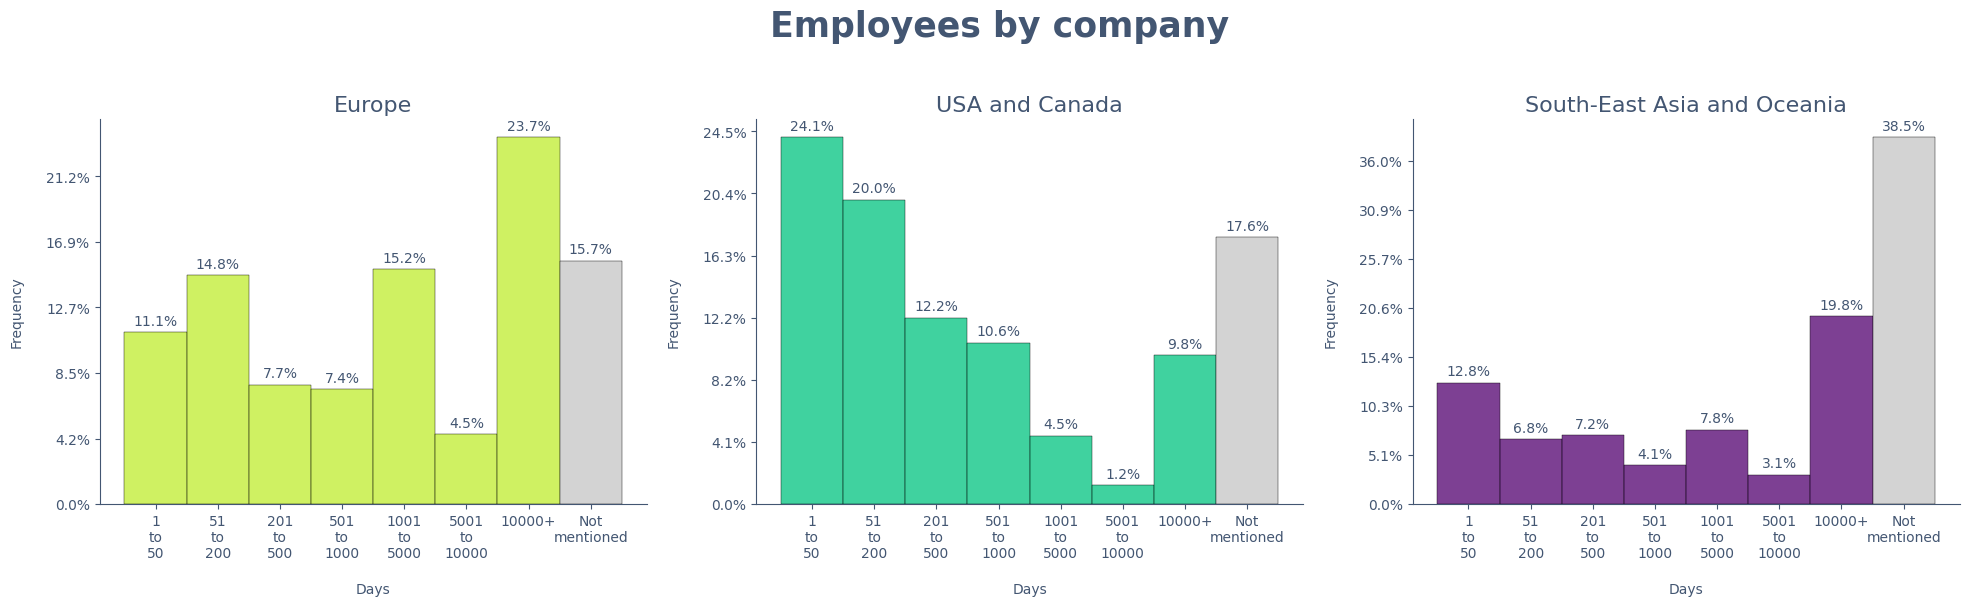

In [117]:
column = 'Employees'

combine_plots(
    "Employees by company",
    6,
    ((data, "Europe", "Europe"), "#bfed2d", column),
    ((data, "North America", "USA and Canada"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f", column),
)

## 9. Company Ages

In [118]:
def show_distribution_ratings(ax, data: pd.DataFrame, region: str, title: str, column: str, bins: int = 40, color: str="#00c37f"):
    def narrow_data(data: pd.DataFrame, region: str | list[str]):
        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(
                f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead"
            )

        plot_data = data['Company_info'][column]

        return plot_data

    plot_data = narrow_data(data, region)

    with plt.style.context('seaborn'):
        ax.set_title(title, size=16, color="#435672")
        sns.histplot(plot_data, ax=ax, color=color, line_kws={"edgecolor": "none"}, bins=bins)
        ax.set_xlabel('\nYears', color="#435672")
        ax.set_ylabel('Frequency\n', color="#435672")
        ax.tick_params(colors="#435672")
        ax.spines['bottom'].set_color("#435672")
        ax.spines['left'].set_color("#435672")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(plot_data)))

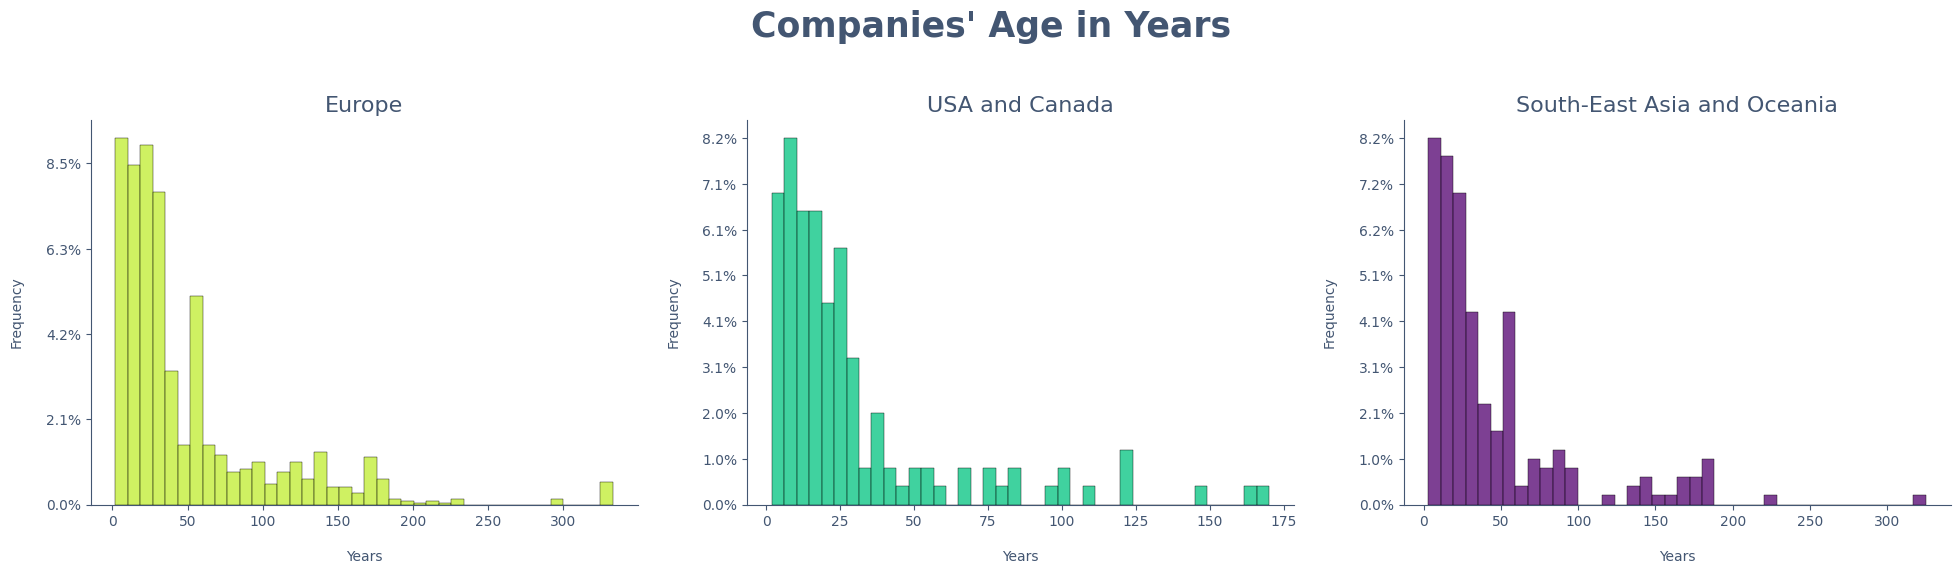

In [119]:
column = 'Company_age'

combine_plots(
    "Companies' Age in Years",
    40,
    ((data, "Europe", "Europe"), "#bfed2d", column),
    ((data, "North America", "USA and Canada"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f", column),
)

Note:
- As the data science industry is a pretty young subject, the same are companies using those technologies.

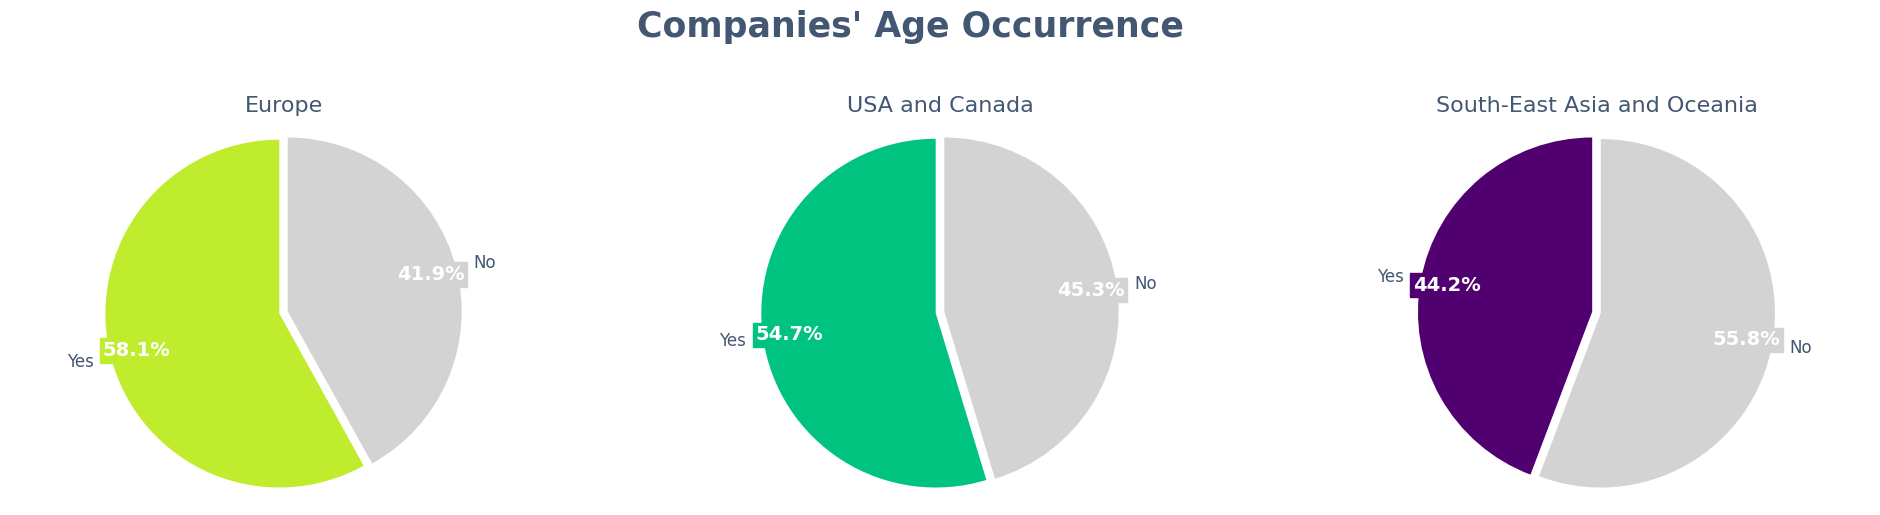

In [120]:
column = 'Company_age'

combine_plots_companies_characteristic(
    "Companies' Age Occurrence",
    ((data, "Europe", "Europe"), "#bfed2d", column),
    ((data, "North America", "USA and Canada"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania"), "#51006f", column),
)

## 10. Company Ownership Type 

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

def show_distribution_ratings(data: pd.DataFrame, region: str, title: str, column: str, color: str="#00c37f"):

    def narrow_data(data: pd.DataFrame, region: str | list[str]):

        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(
                f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead"
            )

        plot_data = data['Company_info'][column].str.replace(" ", "\n").str.replace("/", "").str.replace("-", "").str.replace("\n\n", "\n")

        return plot_data
    
    def get_plot_data(data: pd.Series, trim_to: int):

        value_counts = data.value_counts()

        values = value_counts.values.tolist()[:trim_to]
        names = value_counts.index.tolist()[:trim_to]

        nan_count = data.isna().sum()

        values.append(nan_count)
        names.append("Not\nmentioned")

        tech_counts_data = {'Type of ownership': names, 'Frequency': values}
        
        plot_data = pd.DataFrame(tech_counts_data)

        return plot_data

    def render_plot(data: pd.DataFrame, title: str, color: str):

        with plt.style.context('seaborn'):
            
            fig, ax = plt.subplots(figsize=(14, 6))


            x_axis = data[data.columns[0]]
            y_axis = data[data.columns[1]]
            
            my_palette = [color]*(len(x_axis) - 1) + ["lightgray"]

            ax.set_title(title, size=16, color="#435672")
            sns.barplot(x=x_axis, y=y_axis, ax=ax, palette=my_palette)
            plt.figure(figsize=(9, 5))

            ax.set_xlabel('Type of ownership', color="#435672")
            ax.set_ylabel('Frequency\n', color="#435672")
            ax.tick_params(colors="#435672")

            ax.spines['bottom'].set_color("#435672")
            ax.spines['left'].set_color("#435672")
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

            total_count = y_axis.sum()

            ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total_count))

            for p in ax.patches:
                height = p.get_height()
                percentage = height / total_count * 100
                ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color="#435672")

    data_selected = narrow_data(data, region)

    categories_to_display = 10

    plot_data = get_plot_data(data_selected, categories_to_display)

    render_plot(plot_data, title, color)




In [122]:
def combine_plots(*args):

    for i, (plot_args, color, column) in enumerate(args):
        show_distribution_ratings(*plot_args, color=color, column=column)

    plt.show()

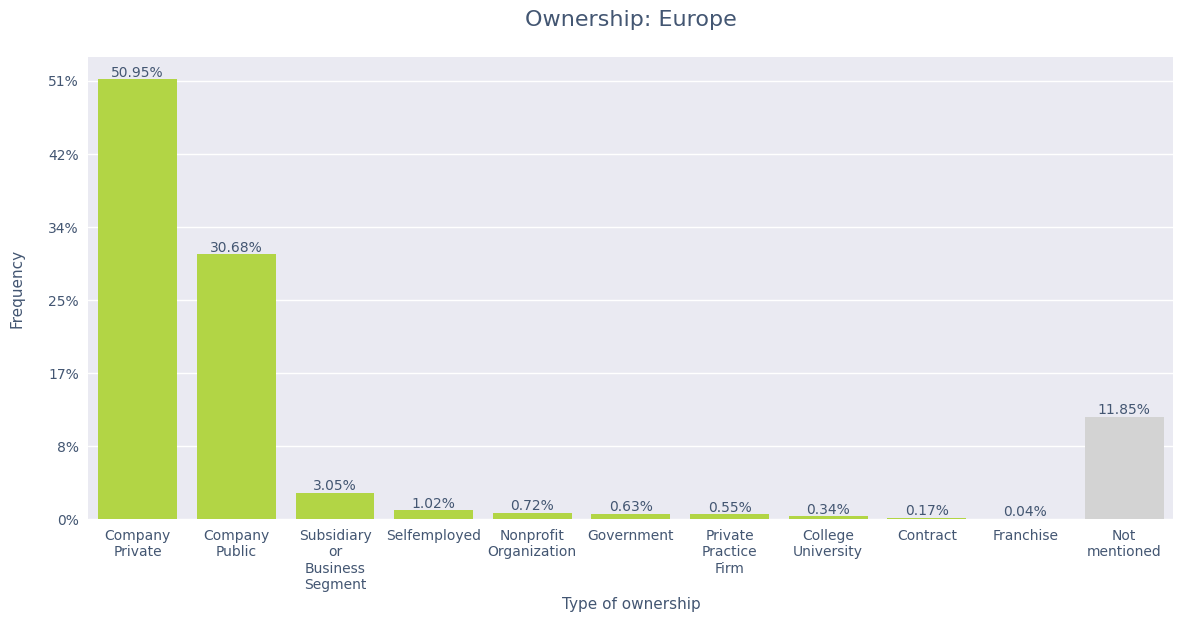

<Figure size 900x500 with 0 Axes>

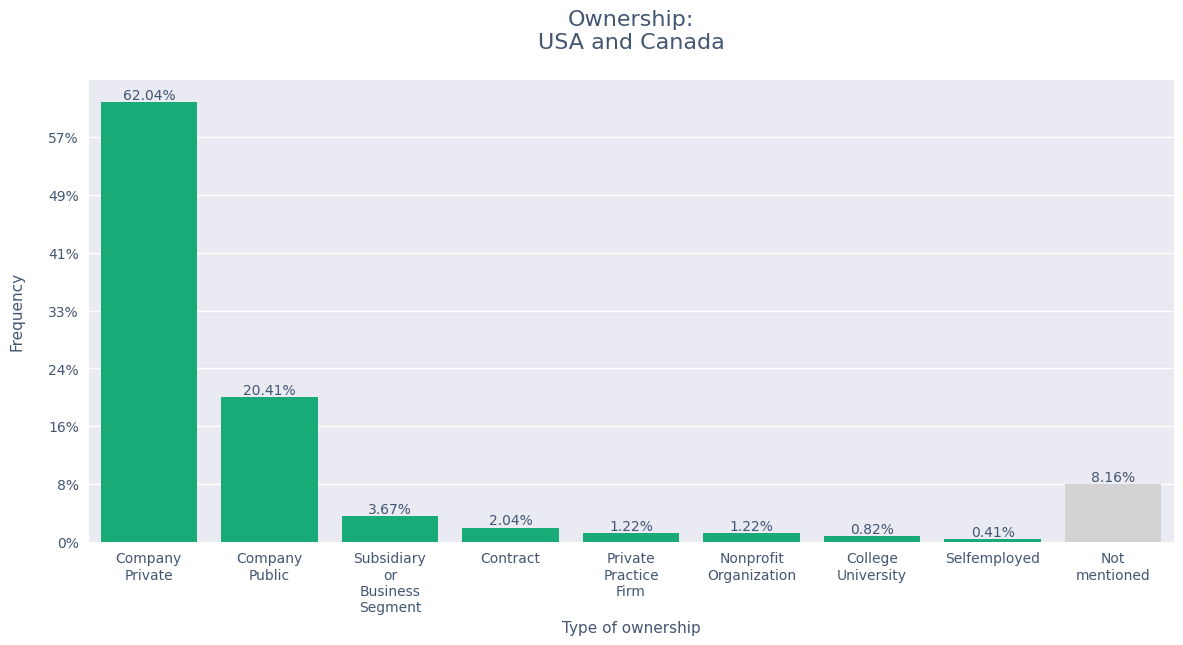

<Figure size 900x500 with 0 Axes>

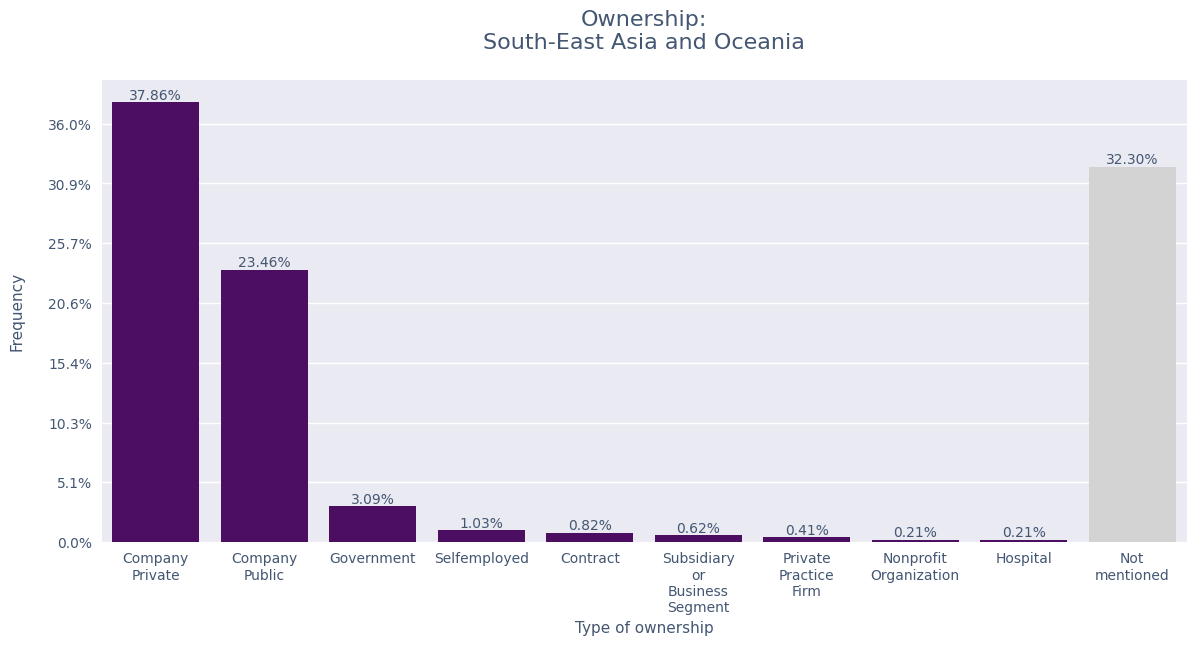

<Figure size 900x500 with 0 Axes>

In [123]:
column = 'Type_of_ownership'

combine_plots(
    ((data, "Europe", "Ownership: Europe\n"), "#bfed2d", column),
    ((data, "North America", "Ownership:\nUSA and Canada\n"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "Ownership:\nSouth-East Asia and Oceania\n"), "#51006f", column),
)

## 11. Company Revenue

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

def show_distribution_ratings(ax, data: pd.DataFrame, region: str, title: str, column: str, bins: int = 6, color: str="#00c37f"):

    def narrow_data(data: pd.DataFrame, region: str | list[str]):
        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(
                f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead"
            )

        return data
    
    def get_plot_data(data: pd.DataFrame, column: str):

        data = data['Company_info'][column].str.replace(" ", "\n")
        
        value_counts = data.value_counts()

        values = value_counts.values.tolist()
        names = value_counts.index.tolist()

        nan_count = data.isna().sum()

        values.append(nan_count)
        names.append("Not\nmentioned")

        tech_counts_data = {'Revenue': names, 'Frequency': values}
        
        plot_data = pd.DataFrame(tech_counts_data)

        plot_data = sort_values_manually(plot_data, 'Revenue')
        return plot_data
    
    def sort_values_manually(data: pd.DataFrame, column: str):

        desired_order = [
            "Less\nthan\n$1\nmillion", 
            "$1\nto\n$5\nmillion", 
            "$5\nto\n$25\nmillion",
            "$25\nto\n$100\nmillion", 
            "$100\nto\n$500\nmillion", 
            "$500\nmillion\nto\n$1\nbillion",
            "$1\nto\n$5\nbillion", 
            "$5\nto\n$10\nbillion", 
            "$10+\nbillion", 
            "Not\nmentioned"
        ]

        data[column] = pd.Categorical(data[column], categories=desired_order, ordered=True)
        data = data.sort_values('Revenue')
        data = data.reset_index(drop=True)

        return data

    def render_plot(ax, data: pd.DataFrame, title: str, color: str):

        with plt.style.context('seaborn'):

            x_axis = data[data.columns[0]]
            y_axis = data[data.columns[1]]
            
            my_palette = [color]*(len(x_axis) - 1) + ["lightgray"]

            ax.set_title(title, size=16, color="#435672")
            sns.barplot(x=x_axis, y=y_axis, ax=ax, palette=my_palette)
            plt.figure(figsize=(9, 5))

            ax.set_xlabel('\nRevenue (USD)', color="#435672")
            ax.set_ylabel('Frequency\n', color="#435672")
            ax.tick_params(colors="#435672")

            ax.spines['bottom'].set_color("#435672")
            ax.spines['left'].set_color("#435672")
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

            total_count = y_axis.sum()

            ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total_count))

            for p in ax.patches:
                height = p.get_height()
                percentage = height / total_count * 100
                ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color="#435672")

    selected_data = narrow_data(data, region)

    plot_data = get_plot_data(selected_data, column)

    render_plot(ax, plot_data, title, color)



In [125]:
def combine_plots(title: str, resolution: int = 30, *args):
    num_plots = len(args)
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 10, 5))

    suptitle = fig.suptitle(title, size=25, color="#435672", weight="semibold")
    suptitle.set_y(1.10)  # Adjust the vertical position to add margin

    for i, (plot_args, color, column) in enumerate(args):
        ax = axes[i]
        show_distribution_ratings(ax, *plot_args, color=color, bins = resolution, column=column)

    plt.show()

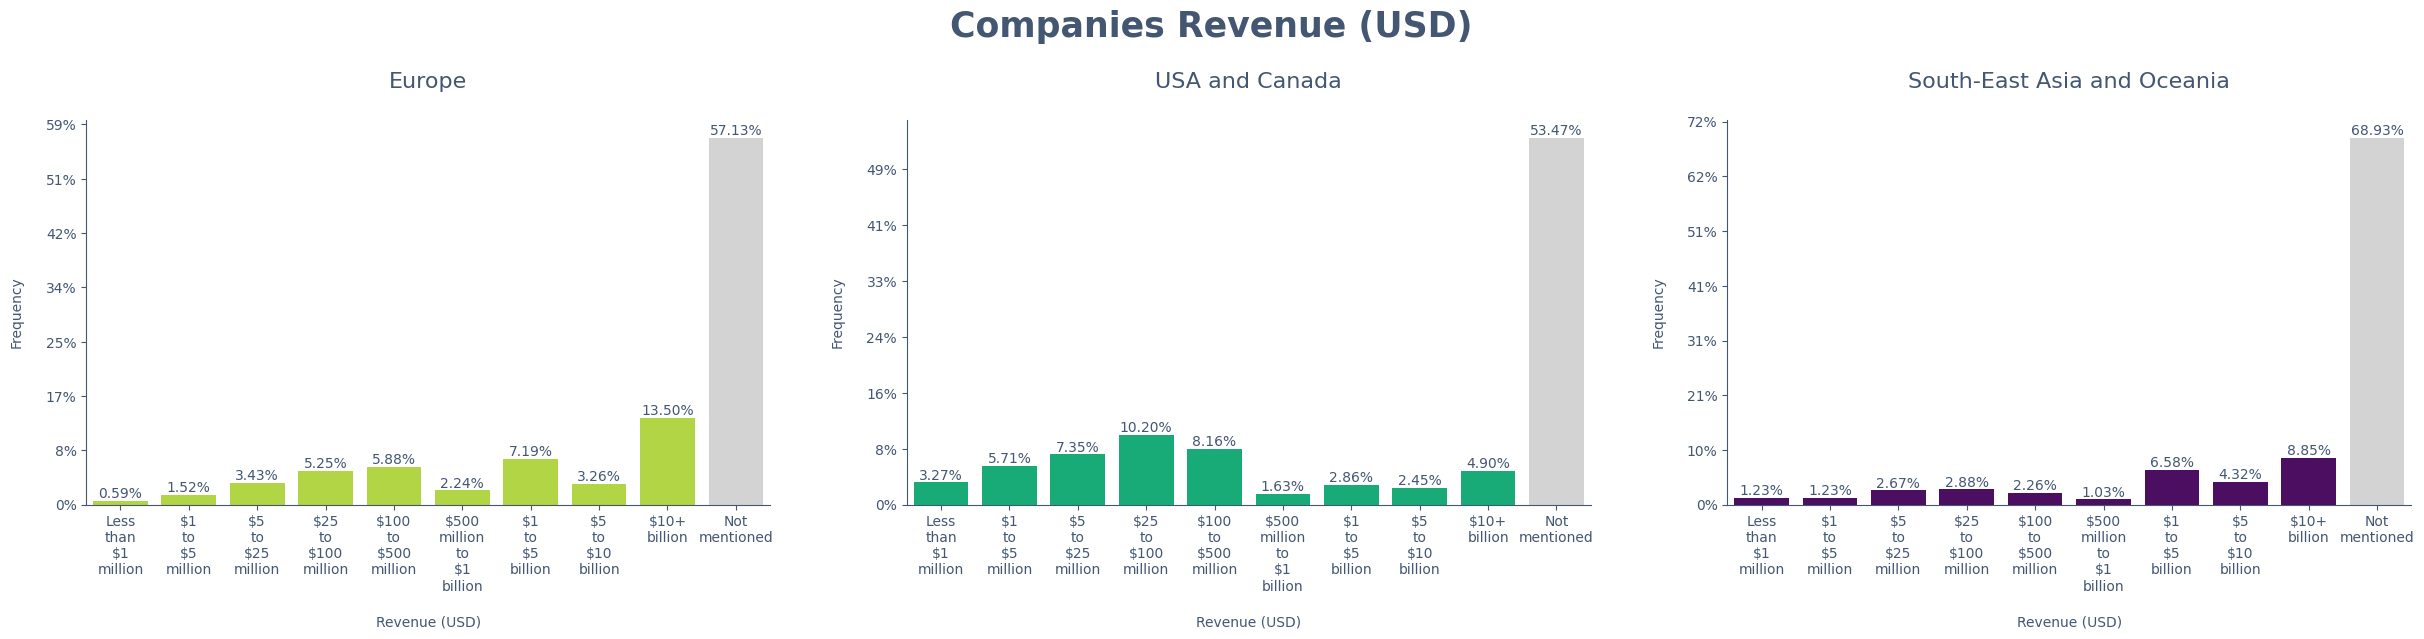

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

In [126]:
column = 'Revenue_USD'

combine_plots(
    "Companies Revenue (USD)",
    10,
    ((data, "Europe", "Europe\n"), "#bfed2d", column),
    ((data, "North America", "USA and Canada\n"), "#00c37f", column),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania\n"), "#51006f", column),
)

### 12. Remote Jobs

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

def show_distribution_remote_onsite(ax, data: pd.DataFrame, region: str, title: str, color: str="#00c37f"):
    
    def narrow_data(data: pd.DataFrame, region: str | list[str]):
        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(
                f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead"
            )
        
        job_total = len(data)
        num_remote = (data['Job_details']['City'] == 'Remote').sum()
        num_nan_locations = data['Job_details']['City'].isna().sum()
        num_onsite = job_total - (num_remote + num_nan_locations)
        
        plot_data = pd.DataFrame({
            'Job Type': ['Remote', 'Onsite', 'Not\nmentioned'],
            'Count': [num_remote, num_onsite, num_nan_locations],
        })

        return plot_data

    def create_plot(ax, plot_data: pd.DataFrame, title: str, color:str):

        my_palette = [color]*(len(plot_data) - 1) + ["lightgray"]

        with plt.style.context('seaborn'):
            ax.set_title(title, size=16, color="#435672")
            sns.barplot(x = plot_data['Job Type'], y = plot_data['Count'],ax=ax, palette=my_palette)
            ax.set_xlabel('Work Location', color="#435672")
            ax.set_ylabel('Frequency\n', color="#435672")
            ax.tick_params(colors="#435672")
            ax.spines['bottom'].set_color("#435672")
            ax.spines['left'].set_color("#435672")
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

            ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=plot_data['Count'].sum()))

    plot_data = narrow_data(data, region)

    create_plot(ax, plot_data, title, color)



In [128]:
def combine_plots(title: str = "--> Add title here! <--", *args):
    
    num_plots = len(args)
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 8, 5))

    suptitle = fig.suptitle(title, size=25, color="#435672", weight="semibold")
    suptitle.set_y(1.10)

    for i, (plot_args, color) in enumerate(args):
        ax = axes[i]
        show_distribution_remote_onsite(ax, *plot_args, color=color)

    plt.show()

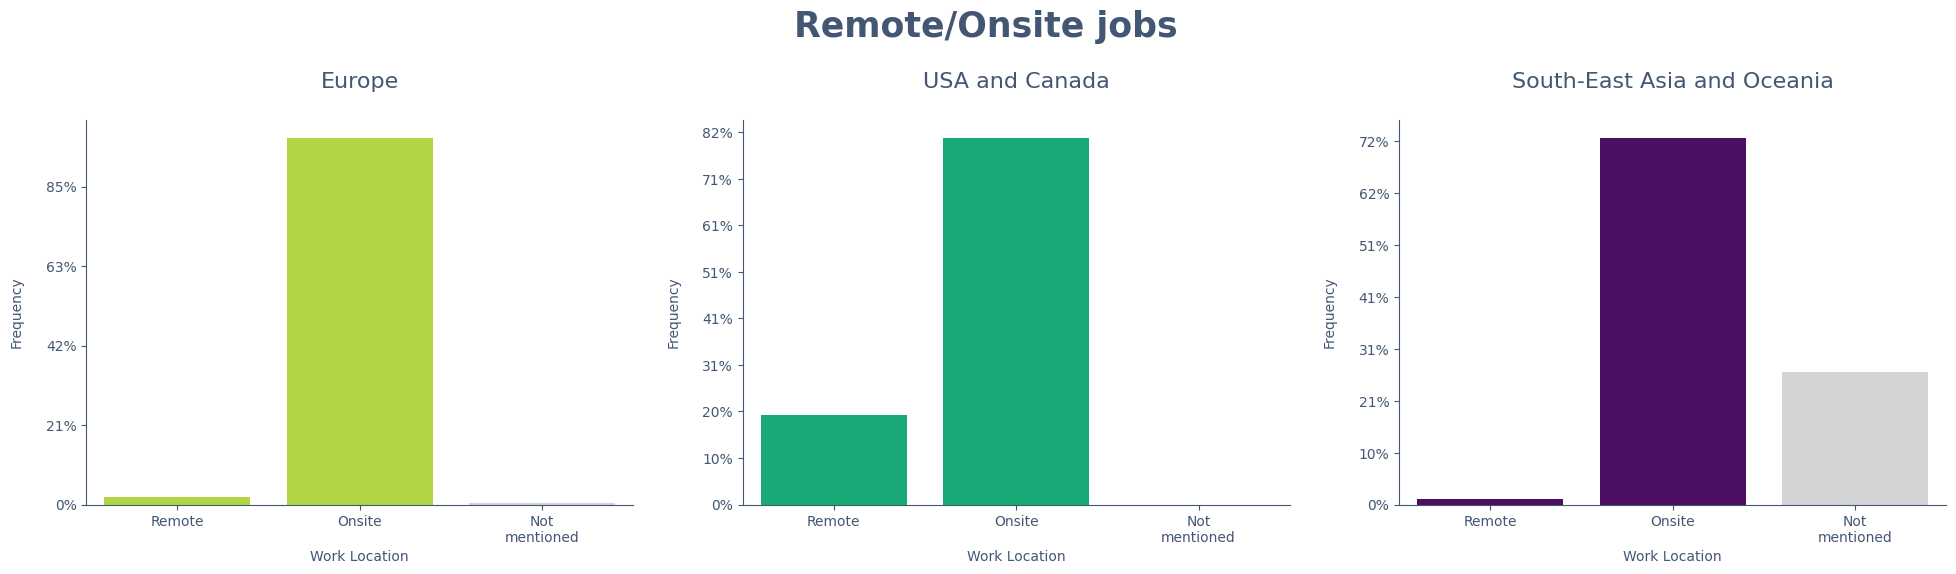

In [129]:
combine_plots(
    "Remote/Onsite jobs",
    ((data, "Europe", "Europe\n"), "#bfed2d"),
    ((data, "North America", "USA and Canada\n"), "#00c37f"),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania\n"), "#51006f"),
)

Note:
- If the job description is written onsite location, it does not always means remote option isn't possible. And vice versa.

## 13. Experience level

In [130]:
def show_distribution_seniority(ax, data: pd.DataFrame, region: str, title: str, color: str="#00c37f"):
    
    def narrow_data(data: pd.DataFrame, region: str | list[str]):
        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(
                f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead"
            )

        return data

    def count_seniority(data: pd.DataFrame):

        data = data['Job_details']['Seniority'].value_counts(dropna=False).reset_index()
        data.columns = ['Seniority', 'Count']

        data['Seniority'] = data['Seniority'].fillna('Not\nmentioned')
        data = sort_seniority(data)

        return data
    
    def sort_seniority(data: pd.DataFrame):

        custom_order = ['Junior', 'Mid', 'Senior', 'Management', 'Not\nmentioned']
        data['Seniority'] = pd.Categorical(data['Seniority'], categories=custom_order, ordered=True)
        data = data.sort_values('Seniority')

        return data

    data = narrow_data(data, region)

    plot_data = count_seniority(data)

    my_palette = [color]*4 + ["lightgray"]

    with plt.style.context('seaborn'):
        ax.set_title(title, size=16, color="#435672")
        sns.barplot(x = plot_data['Seniority'], y = plot_data['Count'],ax=ax, palette=my_palette)
        ax.set_xlabel('Any education', color="#435672")
        ax.set_ylabel('Frequency\n', color="#435672")
        ax.tick_params(colors="#435672")
        ax.spines['bottom'].set_color("#435672")
        ax.spines['left'].set_color("#435672")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(data)))

        total_count = len(data)
        for p in ax.patches:
            height = p.get_height()
            percentage = height / total_count * 100
            ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color="#435672")


In [131]:
def combine_plots(title: str = "--> Add title here! <--", *args):
    
    num_plots = len(args)
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 8, 5))

    suptitle = fig.suptitle(title, size=25, color="#435672", weight="semibold")
    suptitle.set_y(1.10)

    for i, (plot_args, color) in enumerate(args):
        ax = axes[i]
        show_distribution_seniority(ax, *plot_args, color=color)

    plt.show()

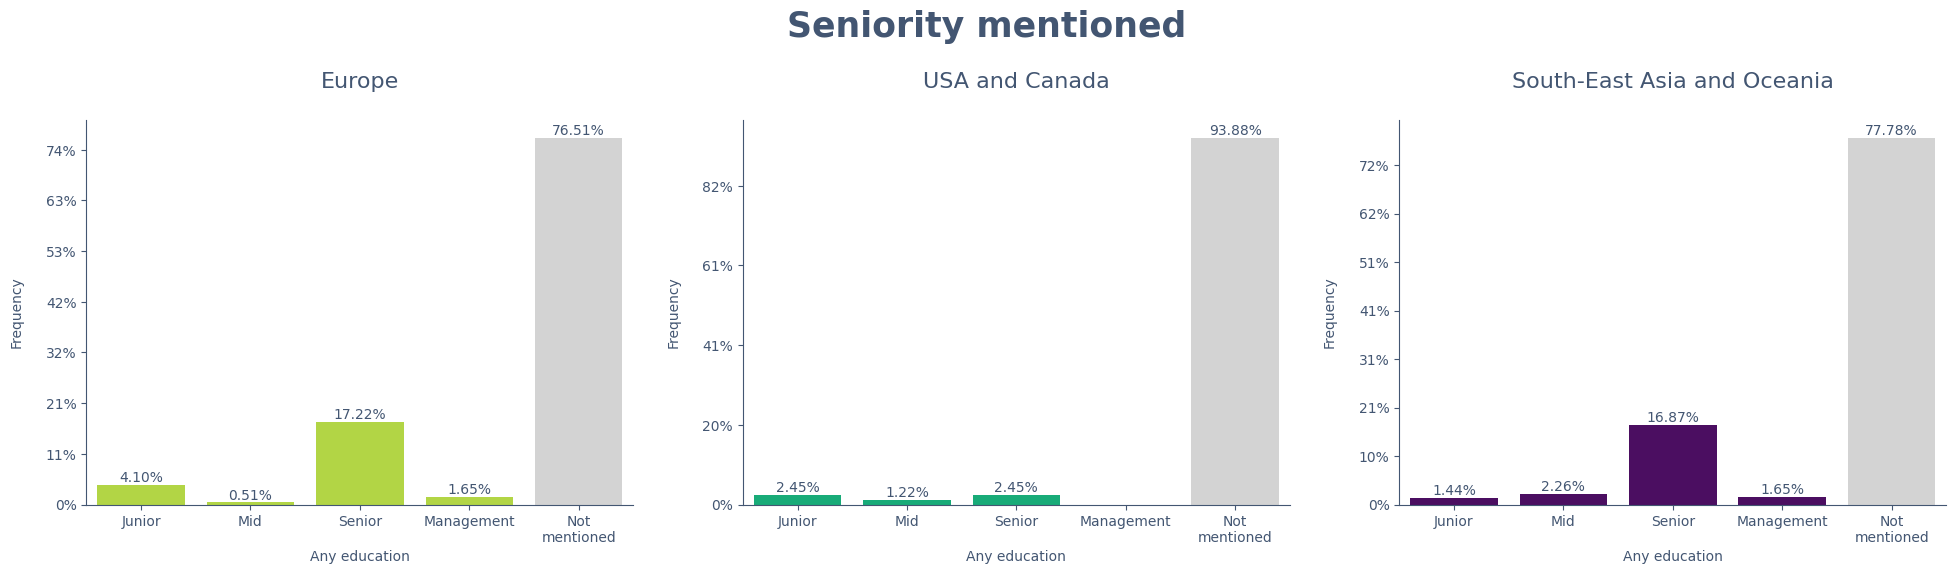

In [132]:
combine_plots(
    "Seniority mentioned",
    ((data, "Europe", "Europe\n"), "#bfed2d"),
    ((data, "North America", "USA and Canada\n"), "#00c37f"),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania\n"), "#51006f"),
)

Note:
- It's worth mentioning that titles vary between companies and the "senior" title could mean something very different among each of them. Also, big companies tend to have their own categories of seniority like L1, L2... etc. Which could be even harder to compare.

In [133]:
def show_distribution_experience_level(ax, data: pd.DataFrame, region: str, title: str, color: str="#00c37f"):
    
    def narrow_data(data: pd.DataFrame, region: str | list[str]):
        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(
                f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead"
            )

        return data

    def count_education(data: pd.DataFrame):
        BA_num = data['Education']['BA'].value_counts()[True]
        MS_num = data['Education']['MS'].value_counts()[True]
        Phd_num = data['Education']['Phd'].value_counts()[True]
        Cert_num = data['Education']['Certificate'].value_counts().sum()
        Non_edu_num = ((data['Education'].isna() | (data['Education'] == False)).all(axis=1)).sum()
        
        plot_data = pd.DataFrame({
            'Job Type': ['BA', 'MS', 'Phd', 'Certificate', 'Education\nnot\nmentioned'],
            'Count': [BA_num, MS_num, Phd_num, Cert_num, Non_edu_num],
        })

        return plot_data

    def create_plot(ax, data: pd.DataFrame, plot_data: pd.DataFrame, title: str, color: str):

        my_palette = [color]*(len(plot_data) - 1) + ["lightgray"]

        with plt.style.context('seaborn'):
            ax.set_title(title, size=16, color="#435672")
            sns.barplot(x = plot_data['Job Type'], y = plot_data['Count'],ax=ax, palette=my_palette)
            ax.set_xlabel('Any education', color="#435672")
            ax.set_ylabel('Frequency\n', color="#435672")
            ax.tick_params(colors="#435672")
            ax.spines['bottom'].set_color("#435672")
            ax.spines['left'].set_color("#435672")
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

            ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(data)))

            total_count = len(data)
            for p in ax.patches:
                height = p.get_height()
                percentage = height / total_count * 100
                ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color="#435672")
    data = narrow_data(data, region)

    plot_data = count_education(data)

    create_plot(ax, data, plot_data, title, color)



In [134]:
def combine_plots(title: str = "--> Add title here! <--", *args):
    
    num_plots = len(args)
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 8, 5))

    suptitle = fig.suptitle(title, size=25, color="#435672", weight="semibold")
    suptitle.set_y(1.10)

    for i, (plot_args, color) in enumerate(args):
        ax = axes[i]
        show_distribution_experience_level(ax, *plot_args, color=color)

    plt.show()

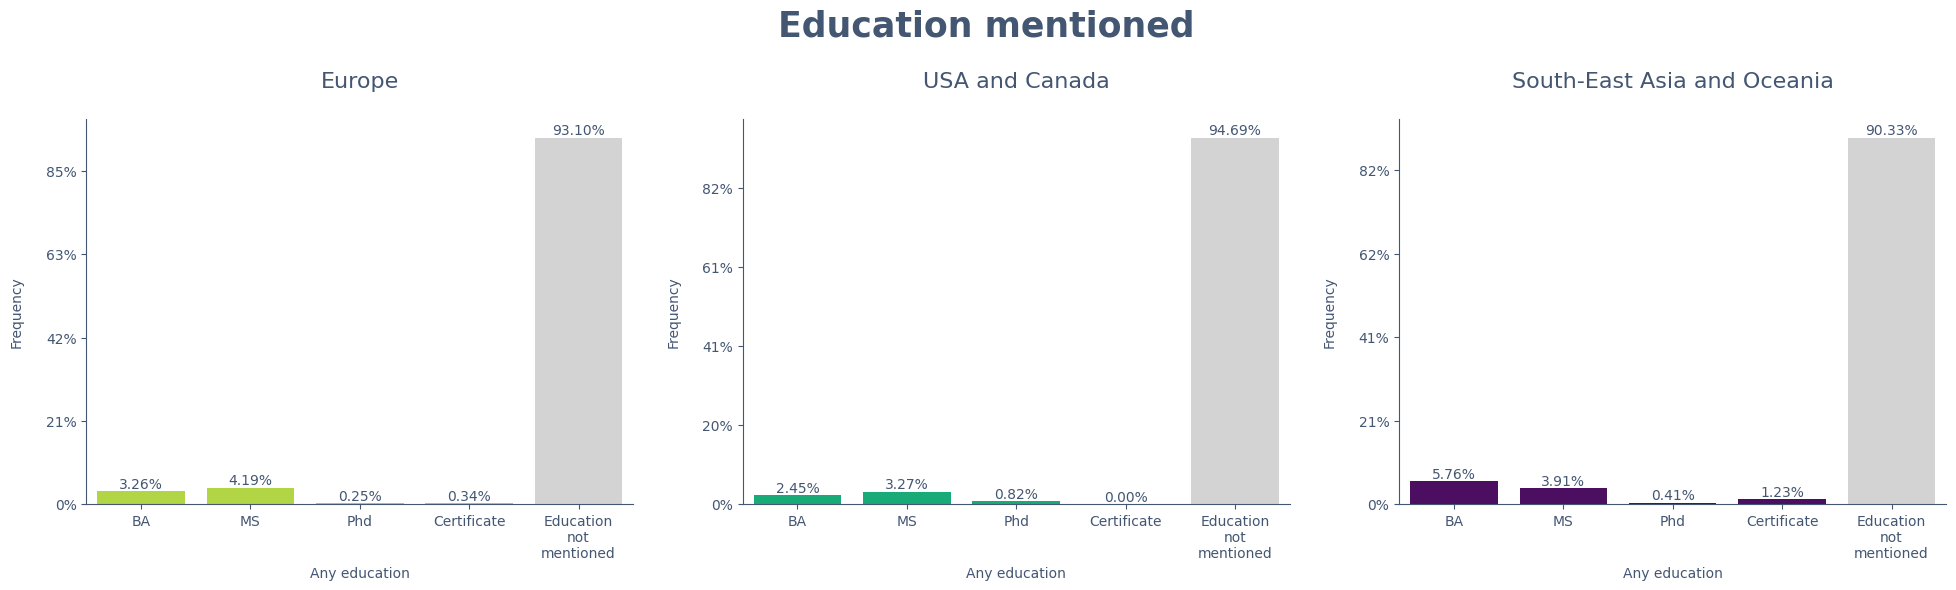

In [135]:
combine_plots(
    "Education mentioned",
    ((data, "Europe", "Europe\n"), "#bfed2d"),
    ((data, "North America", "USA and Canada\n"), "#00c37f"),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania\n"), "#51006f"),
)

Note:
- It counts the lowest required seniority for a job

## 14. Tech Knowledge Required

The mention of any tech in the category.

In [136]:
def show_distribution_tech_categories(data: pd.DataFrame, tech_categories: list[str], title: str):

    def count_tech(data: pd.DataFrame, tech_categories: list[str]):

        tech_counts_data = {'Tech': [], 'Count': []}

        for tech in tech_categories:

            data_tech = data[tech]

            if tech == 'Version_control':
                count = data_tech['Git_SVN'].count()
            else:
                count = (data_tech == True).any(axis=1).sum()

            tech_name = tech.replace("_", " ").replace(" ", "\n")

            if tech_name == "RDBMS":
                tech_name = "Relational\nDatabase\nManagement\nSystem"

            tech_counts_data['Tech'].append(tech_name)
            tech_counts_data['Count'].append(count)

        count_no_tech = data[tech_categories].isna().all(axis=1).sum()

        tech_counts_data['Tech'].append("Not\nmentioned")
        tech_counts_data['Count'].append(count_no_tech)

        value_counts_df = pd.DataFrame(tech_counts_data).sort_values(by='Count', ascending=False)

        return value_counts_df

    def show_plot(plot_data: pd.DataFrame, data: pd.DataFrame, title: str,):

        my_palette = ['#bfed2d'] + ['#00c37f']*2 + ["#007e90"]*4 + ['#51006f']*4

        my_palette= my_palette[:len(plot_data)]

        total_count = len(data)

        with plt.style.context('seaborn'):

            plt.subplots(figsize=(20, 8))
            axes = sns.barplot(
                    data=plot_data, 
                    x='Tech', 
                    y='Count', 
                    saturation=1,
                    linewidth=0,
                    palette=my_palette,
                )

            axes.set_title(f"\n{title}\n", size=25, color="#435672", weight="semibold")
            axes.set_xlabel(f"\n{'Tech'}", fontsize=21, color="#435672")
            axes.set_ylabel("Frequency\n", fontsize=21, color="#435672")
            axes.yaxis.label.set_color("#435672")
            axes.tick_params(colors='#435672', which='both')

            sns.despine(left=True, bottom=True)

            axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total_count))

            for p in axes.patches:
                height = p.get_height()
                percentage = height / total_count * 100
                axes.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color="#435672")

            plt.show()

    plot_data = count_tech(data, tech_categories)

    show_plot(plot_data, data, title)

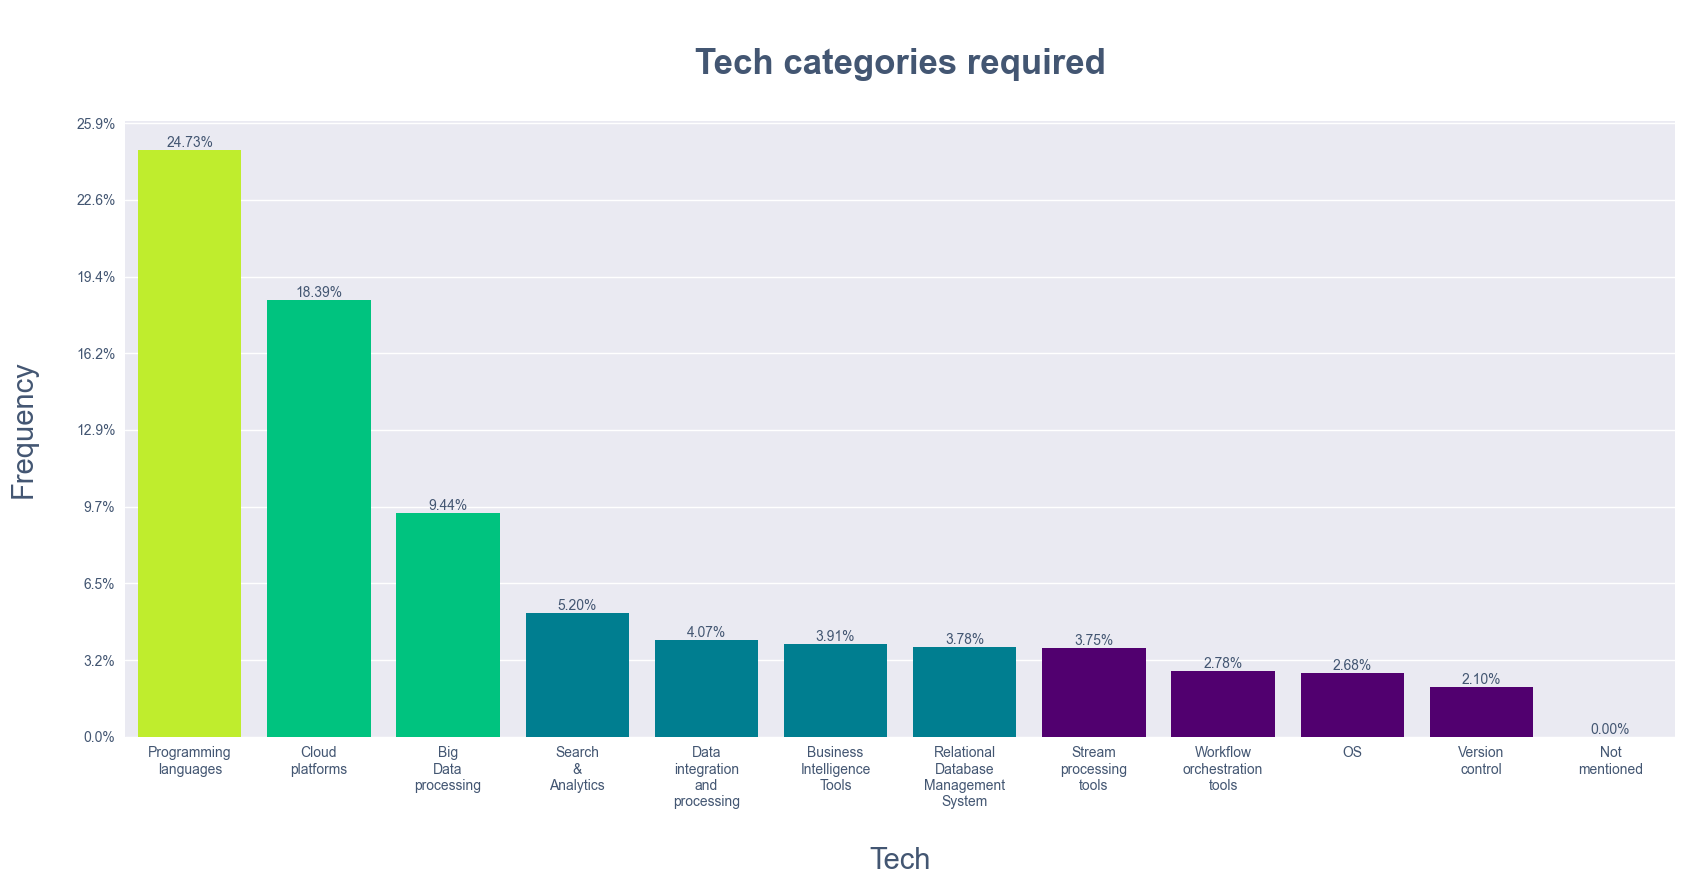

In [137]:
show_distribution_tech_categories(data, 
        tech_categories = [
            'Version_control',
            'Cloud_platforms',
            'RDBMS',
            'Search_&_Analytics',
            'Data_integration_and_processing',
            'Stream_processing_tools',
            'Workflow_orchestration_tools',
            'Big_Data_processing',
            'OS',
            'Programming_languages',
            'Business_Intelligence_Tools'
        ], 
        title = "Tech categories required"
    )

In [138]:
def show_distribution_all_tech(data: pd.DataFrame, tech_categories: list[str], title: str):

    def count_tech(data: pd.DataFrame, tech_categories: list[str]):

        tech_counts_data = {'Tech': [], 'Count': []}

        for category in tech_categories:

            data_category = data[category]
            category_tech = data_category.columns.to_list()

            for tech in category_tech:

                data_tech = data_category[tech]

                if tech == 'Git_SVN':
                    count = data_tech.count()
                else:
                    count = pd.Series(data_tech).astype(int).sum()

                tech_name = tech.replace("_", " ").replace(" ", "\n")

                tech_counts_data['Tech'].append(tech_name)
                tech_counts_data['Count'].append(count)

        value_counts_df = pd.DataFrame(tech_counts_data).sort_values(by='Count', ascending=False).iloc[:10]

        return value_counts_df

    def show_plot(plot_data: pd.DataFrame, data: pd.DataFrame, title: str,):

        my_palette = ['#bfed2d'] + ['#00c37f']*2 + ["#007e90"]*4 + ['#51006f']*4

        my_palette= my_palette[:len(plot_data)]

        total_count = len(data)

        with plt.style.context('seaborn'):

            plt.subplots(figsize=(20, 8))
            axes = sns.barplot(
                    data=plot_data, 
                    x='Tech', 
                    y='Count', 
                    saturation=1,
                    linewidth=0,
                    palette=my_palette,
                )

            axes.set_title(f"\n{title}\n", size=25, color="#435672", weight="semibold")
            axes.set_xlabel(f"\n{'Tech'}", fontsize=21, color="#435672")
            axes.set_ylabel("Frequency\n", fontsize=21, color="#435672")
            axes.yaxis.label.set_color("#435672")
            axes.tick_params(colors='#435672', which='both')

            sns.despine(left=True, bottom=True)

            axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total_count))

            for p in axes.patches:
                height = p.get_height()
                percentage = height / total_count * 100
                axes.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color="#435672")

            plt.show()

    plot_data = count_tech(data, tech_categories)

    show_plot(plot_data, data, title)

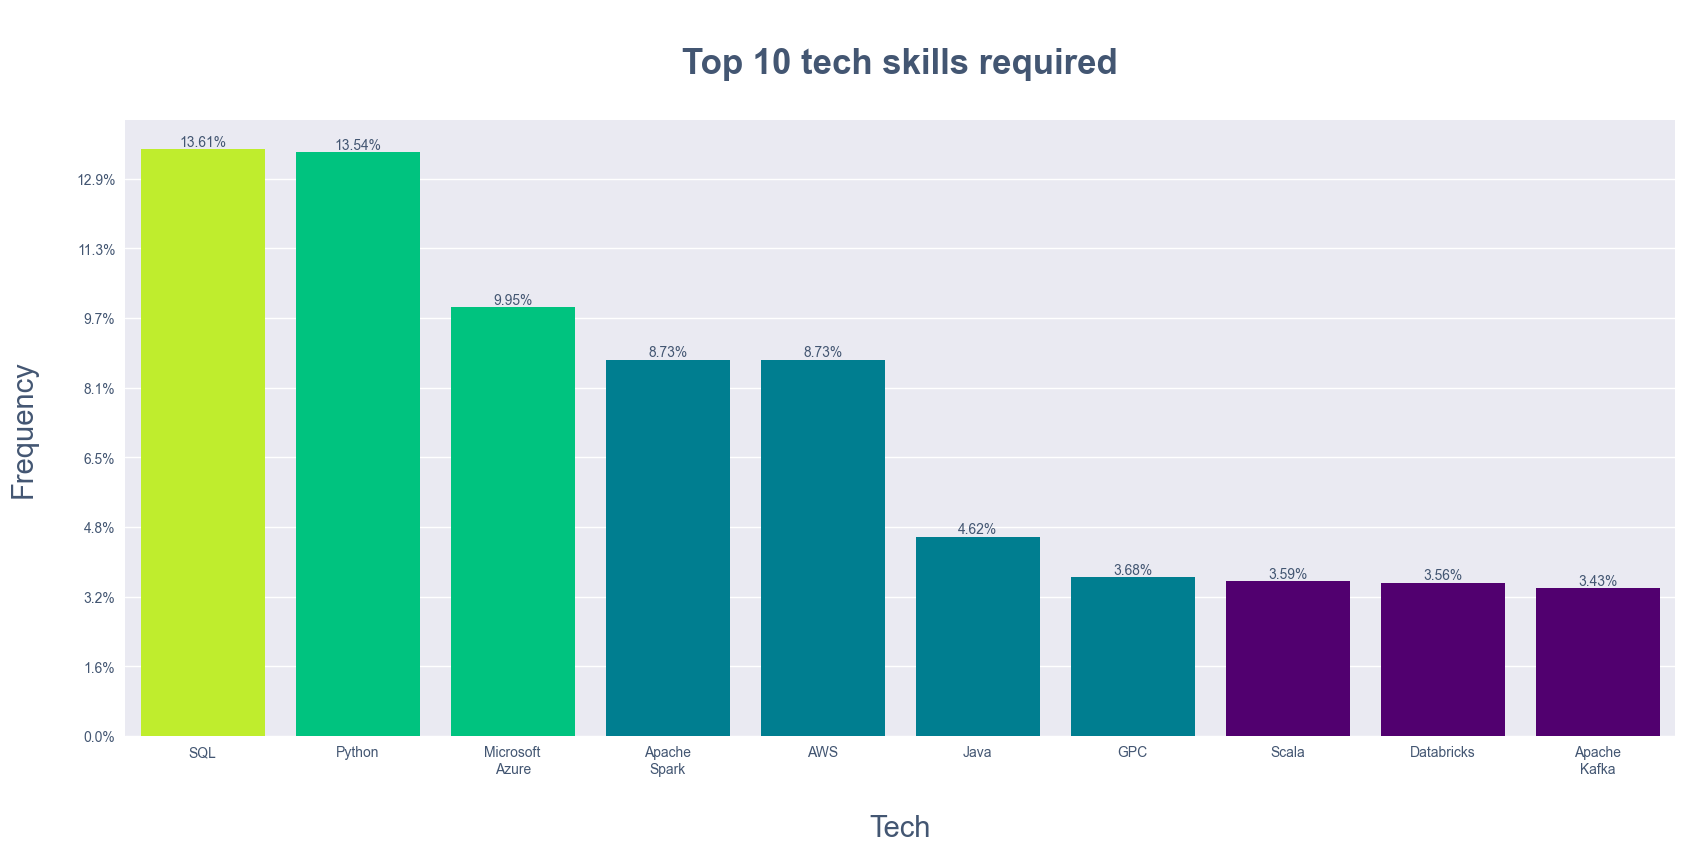

In [139]:
show_distribution_all_tech(data, 
        tech_categories = [
            'Version_control',
            'Cloud_platforms',
            'RDBMS',
            'Search_&_Analytics',
            'Data_integration_and_processing',
            'Stream_processing_tools',
            'Workflow_orchestration_tools',
            'Big_Data_processing',
            'OS',
            'Programming_languages',
            'Business_Intelligence_Tools'
        ], 
        title = "Top 10 tech skills required"
    )

### 14.1 Version control software

Git is a distributed version control system designed for collaborative software development, while GitLab, GitHub, and similar platforms provide hosting and collaboration features for Git repositories, and SVN is a centralized version control system commonly used for managing larger projects.

In [140]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

def show_distribution_version_control(ax, data: pd.DataFrame, region: str, title: str, color: str="#00c37f"):
    
    def narrow_data(data: pd.DataFrame, region: str | list[str]):
        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(
                f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead"
            )
        return data

    def count_version_control(data: pd.DataFrame):
        any_version_control_count = data['Version_control']['Git_SVN'].count()
        no_version_control_count = data['Version_control']['Git_SVN'].isna().sum()
        plot_data = pd.DataFrame({
            'Version_control': ["Yes", "No"],
            'Count': [any_version_control_count, no_version_control_count],
        })
        plot_data.columns = ['Version_control', 'Count']
        return plot_data

    data = narrow_data(data, region)
    plot_data = count_version_control(data)

    ax.set_title(title, size=16, color="#435672")
    colors = [color, 'lightgray']
    labels = plot_data['Version_control']
    sizes = plot_data['Count']
    explode = [0.05, 0]
    autopct_format = '%1.1f%%'
    label_kwargs = {'fontsize': 12, 'color': '#435672'}

    wedges, text, autotexts = ax.pie(
        sizes, 
        labels=labels, 
        colors=colors, 
        autopct=autopct_format, 
        startangle=90, 
        pctdistance=0.85,
        explode=explode,
        textprops=label_kwargs
    )

    for (i, autotext)in enumerate(autotexts):
        autotext.set_fontsize(14)
        autotext.set_color('white')
        autotext.set_text(autotext.get_text())
        autotext.set_weight("bold")
        if i == 1:
            color = 'lightgray'
        autotext.set_bbox(dict(facecolor=color, edgecolor=color, pad=2.0))

    ax.axis('equal')


In [141]:
def combine_plots(title: str = "--> Add title here! <--", *args):
    
    num_plots = len(args)
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 5, 5))

    suptitle = fig.suptitle(title, size=25, color="#435672", weight="semibold")
    suptitle.set_y(1.10)

    for i, (plot_args, color) in enumerate(args):
        ax = axes[i]
        show_distribution_version_control(ax, *plot_args, color=color)

    plt.show()

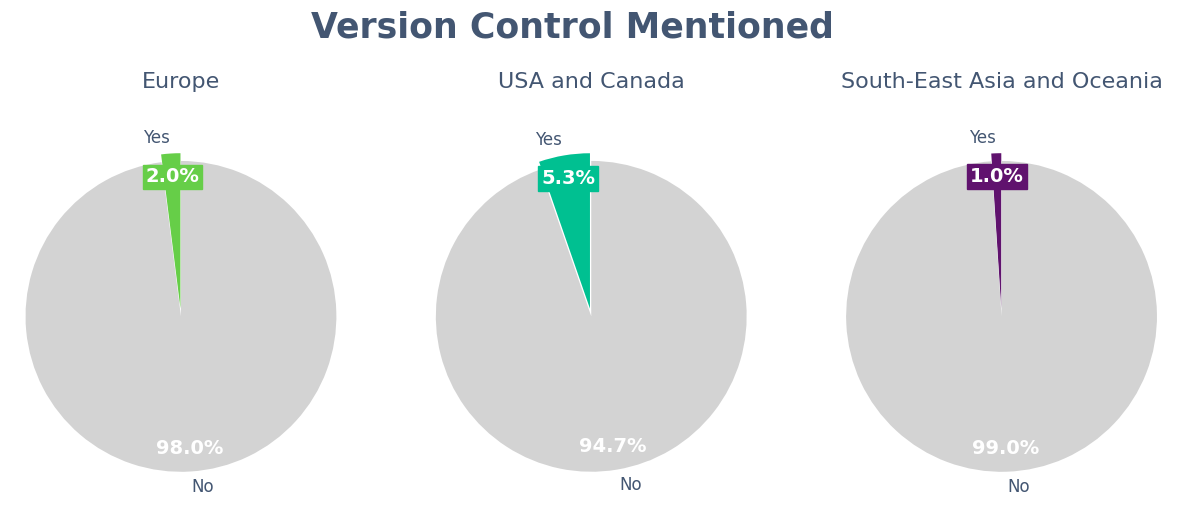

In [142]:
combine_plots(
    "Version Control Mentioned",
    ((data, "Europe", "Europe\n"), "#66ce48"),
    ((data, "North America", "USA and Canada\n"), "#00c091"),
    ((data, ["Asia", "Oceania"], "South-East Asia and Oceania\n"), "#60126e"),
)

Note:
- The reason for no mention in job postings might be that Version Control software is so universal and widely used that it's not worth even mentioning.

In [143]:
import matplotlib.pyplot as plt
import pandas as pd

def show_distribution_version_control(data: pd.DataFrame, title: str, color: str="#00c37f"):

    def count_version_control(data: pd.DataFrame):

        value_counts_df = data['Version_control']['Git_SVN'].value_counts().to_frame().reset_index()
        value_counts_df.columns = ['Type', 'Count']

        return value_counts_df

    plot_data = count_version_control(data)

    colors = sns.color_palette("plasma", len(plot_data))

    with plt.style.context('seaborn'):
        fig, ax = plt.subplots(figsize=(8, 8))

        ax.set_title(title, size=25, color="#435672", fontdict={'fontweight': "bold"})
        sizes = plot_data['Count']
        labels = plot_data['Type']
        autopct_format = '%1.1f%%'

        wedges, text, autotexts = ax.pie(
            sizes, 
            autopct=autopct_format, 
            startangle=90, 
            pctdistance=0.85,
            colors=colors
        )

        for (i, autotext)in enumerate(autotexts):
            if i == 4:
                autotext.set_alpha(0.0)
            autotext.set_fontsize(14)
            autotext.set_color('white')
            autotext.set_text(autotext.get_text())
            autotext.set_weight("bold")

        ax.legend(labels)

        plt.show()

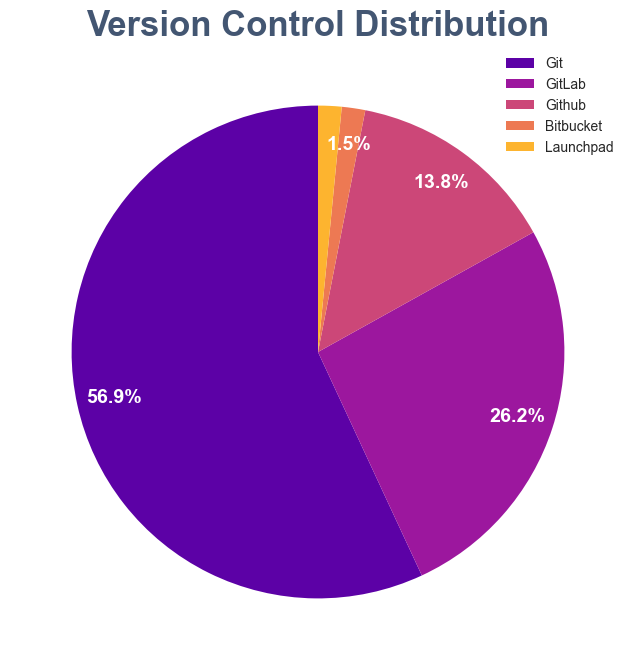

In [144]:
show_distribution_version_control(data, "Version Control Distribution", "#00c37f")

Note:
- No mention of the SVN, just learn git and adjust to the company's provider

### 14.2 Cloud Platforms

Cloud platforms offer a range of scalable and flexible services, enabling businesses to leverage cloud computing resources for storage, computing power, and various applications without the need for on-premises infrastructure.

In [145]:
def show_distribution_tech(ax, data: pd.DataFrame, region: str, category_tech: str, title: str):

    def narrow_data(data: pd.DataFrame, region: str | list[str]):
        if isinstance(region, list):
            data = data[data['Job_details']['Region'].isin(region)]
        elif isinstance(region, str):
            data = data[data['Job_details']['Region'] == region]
        else:
            raise TypeError(
                f"Expected 'region' to be of type 'str' or 'list[str]', but got '{type(region).__name__}' instead"
            )
        return data

    def count_tech(data: pd.DataFrame, category_tech: str):

        data_tech = data[category_tech]

        tech_counts_data = {'Tech': [], 'Count': []}

        for col in data_tech.columns:

            tech_name_cleaned = col.replace("_", " ").replace(" ", "\n")
            tech_count = data_tech[col].value_counts().get(True, 0)

            if tech_count == 0:
                continue

            tech_counts_data['Tech'].append(tech_name_cleaned)
            tech_counts_data['Count'].append(tech_count)


        value_counts_df = pd.DataFrame(tech_counts_data).sort_values(by='Count', ascending=False)[:5]

        not_any_tech = (data_tech == False).all(axis=1).sum()
        value_counts_df.iloc[len(value_counts_df) - 1] = ["Not\nmentioned", not_any_tech]

        return value_counts_df

    def show_plot(ax, plot_data: pd.DataFrame, data: pd.DataFrame, title: str, category_tech: str):

        categories_num = len(plot_data)

        my_palette = (['#bfed2d'] + ['#00c37f'] + ["#007e90"] + ['#51006f']*3)[:(categories_num - 1)] +["lightgray"]

        category_tech = category_tech.replace("_", " ")

        total_count = len(data)

        with plt.style.context('seaborn'):

            sns.barplot(
                    data=plot_data, 
                    x='Tech', 
                    y='Count', 
                    saturation=1,
                    linewidth=0,
                    palette=my_palette,
                    ax=ax
                )

            ax.set_title(f"\n{title}\n", fontsize=25, color="#435672")
            ax.set_xlabel(f"\n{category_tech}", fontsize=21, color="#435672")
            ax.set_ylabel("Frequency\n", fontsize=21, color="#435672")
            ax.yaxis.label.set_color("#435672")
            ax.tick_params(colors='#435672', which='both')

            sns.despine(left=True, bottom=True)

            ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total_count))

            for p in ax.patches:
                height = p.get_height()
                percentage = height / total_count * 100
                ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', color="#435672")

    if region:
        data = narrow_data(data, region)

    plot_data = count_tech(data, category_tech)

    show_plot(ax, plot_data, data, title, category_tech)

In [146]:
def combine_plots(title: str = "--> Add title here! <--", *args):
    
    num_plots = len(args)

    plot_size = (num_plots * 8, 5) if num_plots > 1 else (10, 5)
    fig, axes = plt.subplots(1, num_plots, figsize=plot_size)

    suptitle = fig.suptitle(f"{title}\n", size=25, color="#435672", weight="semibold")

    if num_plots > 1:
        suptitle.set_y(1.2)
        plt.subplots_adjust(wspace=0.3)
        fig.tight_layout(rect=[1, 1, 1, 1.95])
    else:
        suptitle.set_y(1.05)
    
    for i, (plot_args) in enumerate(args):

        if num_plots > 1:
            ax = axes[i]
        else:
            ax = axes
            
        show_distribution_tech(ax, *plot_args)

    plt.show()

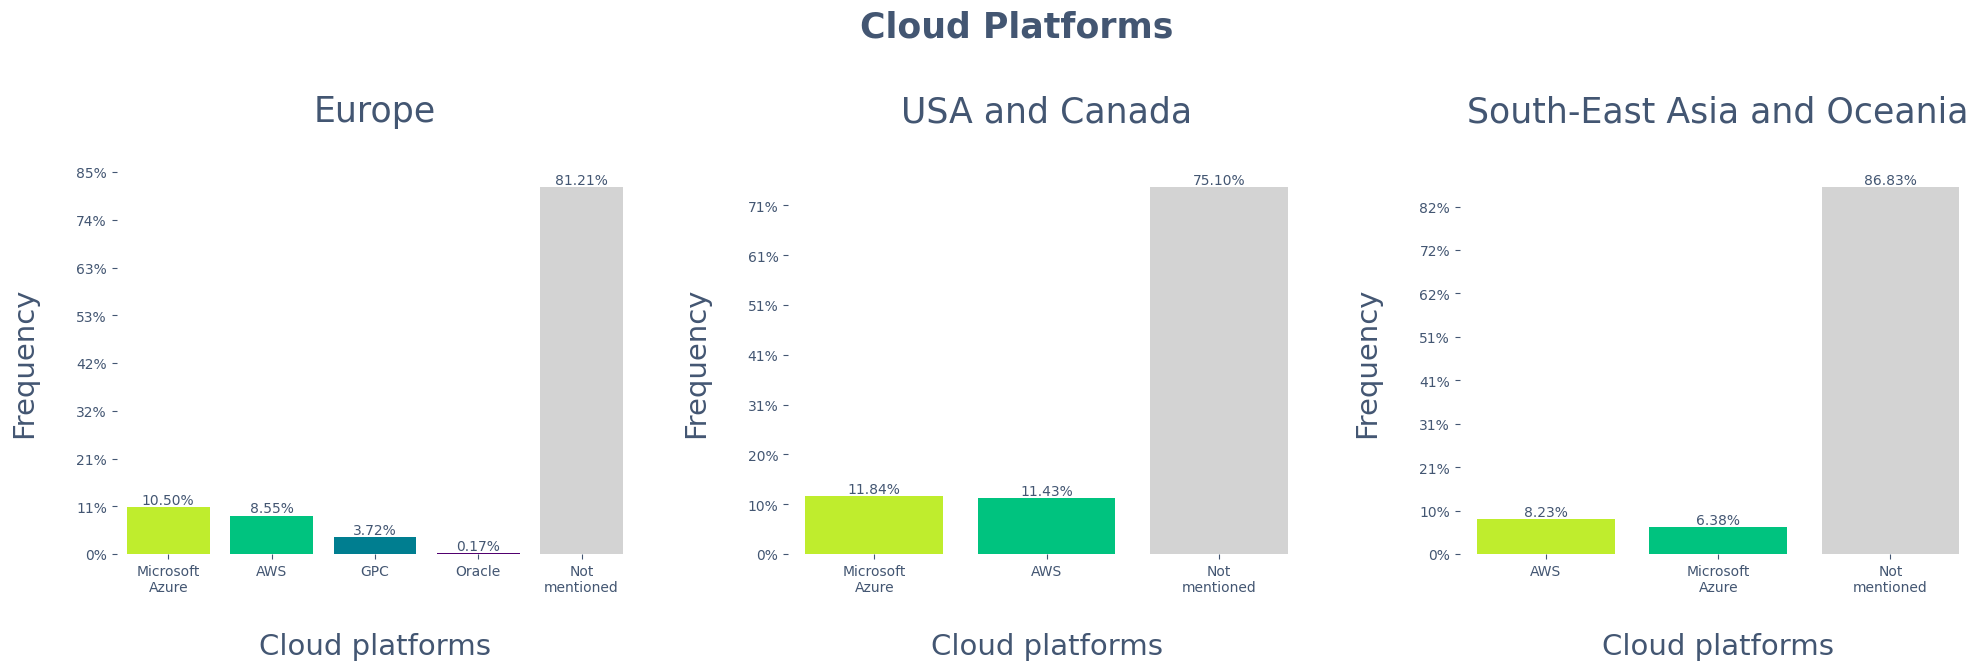

In [147]:
combine_plots(
    "Cloud Platforms",
    (data, "Europe", "Cloud_platforms", "Europe"),
    (data, "North America", "Cloud_platforms", "USA and Canada"),
    (data, ["Asia", "Oceania"], "Cloud_platforms", "South-East Asia and Oceania"),
)

Note:
- The usage of cloud providers is pretty much the same among all the regions. There is no noticeable difference.

In [148]:
def count_simultaneous_tech(data: pd.DataFrame, tech: str):

    selected_data = data[tech]
    columns = selected_data.columns.to_list()
    df_simultaneous_tech = selected_data[selected_data.sum(axis=1) > 1].groupby(columns).size().reset_index(name='Count').sort_values(ascending=False, by=['Count']).reset_index(drop=True)

    # Translate DataFrame to the desired format
    df_simultaneous_tech['Combination'] = df_simultaneous_tech[columns].apply(lambda row: ', '.join([col for col, value in zip(columns, row) if value]).replace("_", " "), axis=1)
    df_simultaneous_tech['Count'] = df_simultaneous_tech['Count'].apply(lambda count: f'{count / len(data) * 100:.2f}%')

    df_simultaneous_tech = df_simultaneous_tech[['Combination', 'Count']]

    return df_simultaneous_tech

    

In [149]:

count_simultaneous_tech(data, 'Cloud_platforms')

Combination  Count
0            AWS, Microsoft Azure  1.39%
1       AWS, Microsoft Azure, GPC  0.84%
2                        AWS, GPC  0.55%
3            Microsoft Azure, GPC  0.16%
4    AWS, Microsoft Azure, Oracle  0.06%
5  AWS, Microsoft Azure, GPC, IBM  0.06%
6            Microsoft Azure, IBM  0.03%
7                AWS, GPC, Oracle  0.03%

Note:
- A required familiarity with many cloud providers at once is quite rare.

### 14.3 RDBMS (Relational Database Management System)

Relational Database Management Systems (RDBMS) provide a structured approach to organizing and managing data, allowing for efficient storage, retrieval, and manipulation of relational data in a consistent and secure manner.

Due to small differences in that area, we can skip the division between regions

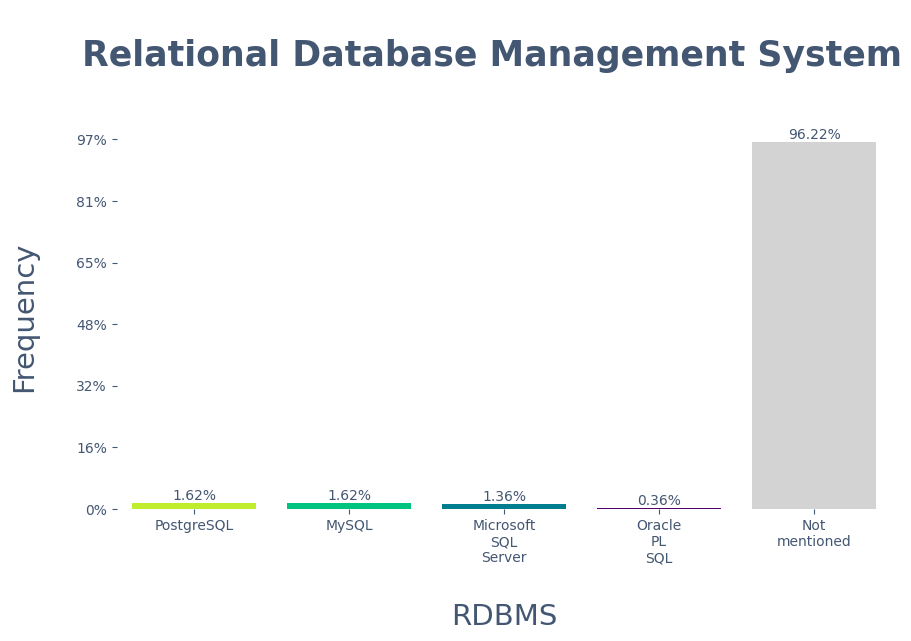

In [150]:
combine_plots(
    "Relational Database Management System",
    (data, "", "RDBMS", ""),
)

In [151]:
count_simultaneous_tech(data, 'RDBMS')

Combination  Count
0                        PostgreSQL, MySQL  0.74%
1              Microsoft SQL Server, MySQL  0.16%
2         PostgreSQL, Microsoft SQL Server  0.13%
3  PostgreSQL, Microsoft SQL Server, MySQL  0.06%
4                     MySQL, Oracle PL SQL  0.03%
5                           IBM Db2, MySQL  0.03%
6                PostgreSQL, Oracle PL SQL  0.03%

### 14.4 Non-Relational Database

Non-relational databases, also known as NoSQL databases, offer a flexible and scalable approach to storing and retrieving unstructured or semi-structured data, providing high performance and horizontal scalability, making them well-suited for handling large amounts of data with diverse structures and varying data requirements.

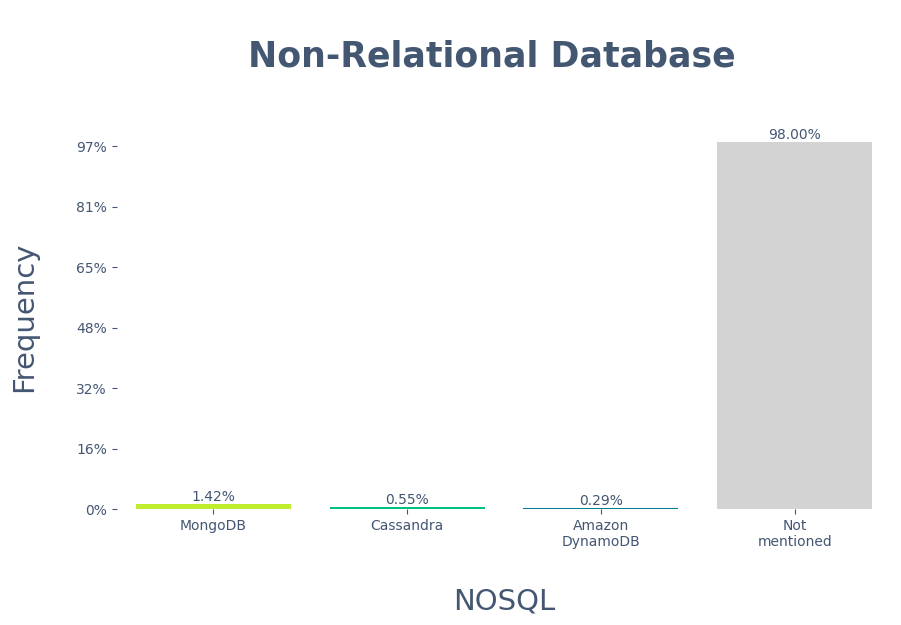

In [152]:
combine_plots(
    "Non-Relational Database",
    (data, "", "NOSQL", ""),
)



In [153]:
count_simultaneous_tech(data, 'NOSQL')

Combination  Count
0        MongoDB, Cassandra  0.23%
1  MongoDB, Amazon DynamoDB  0.10%

### 14.5 Search & Analytics

Search and analytics platforms such as Snowflake, Google BigQuery, Amazon Redshift, Teradata, and others provide advanced data querying, analysis, and processing capabilities, enabling organizations to derive valuable insights from large datasets and facilitate efficient data-driven decision-making.

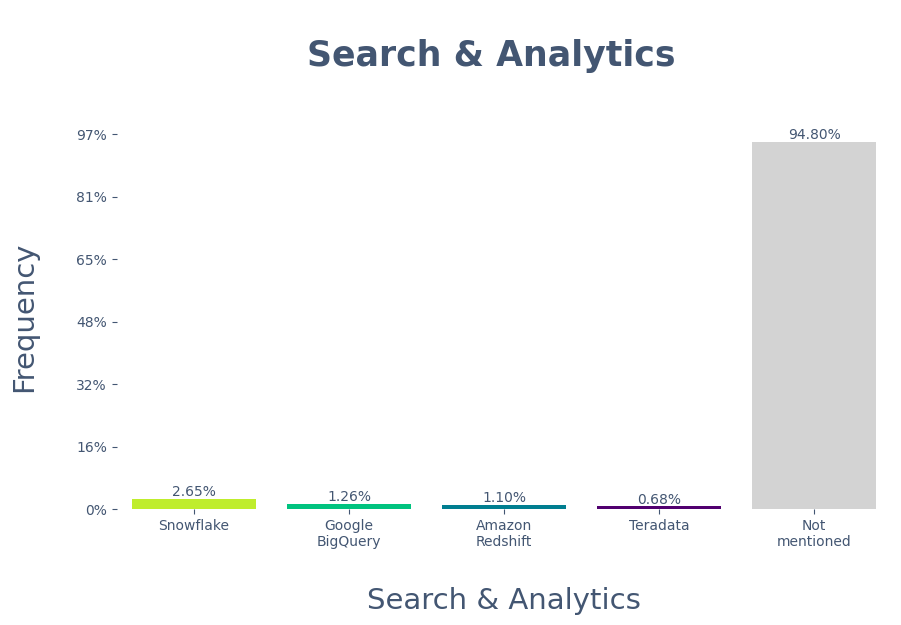

In [154]:
combine_plots(
    "Search & Analytics",
    (data, "", "Search_&_Analytics", ""),
)


In [155]:
count_simultaneous_tech(data, 'Search_&_Analytics')

Combination  Count
0        Amazon Redshift, Google BigQuery, Snowflake  0.13%
1  Amazon Redshift, Google BigQuery, Snowflake, T...  0.10%
2                         Google BigQuery, Snowflake  0.06%
3                   Amazon Redshift, Google BigQuery  0.06%
4                                Snowflake, Teradata  0.03%
5                          Google BigQuery, Teradata  0.03%
6                    Google BigQuery, Oracle Exadata  0.03%
7                         Amazon Redshift, Snowflake  0.03%

### 14.5 Data Integration & Processing

Data integration and processing tools like Databricks, Informatica PowerCenter, Presto, and others provide efficient solutions for consolidating and transforming data from various sources.

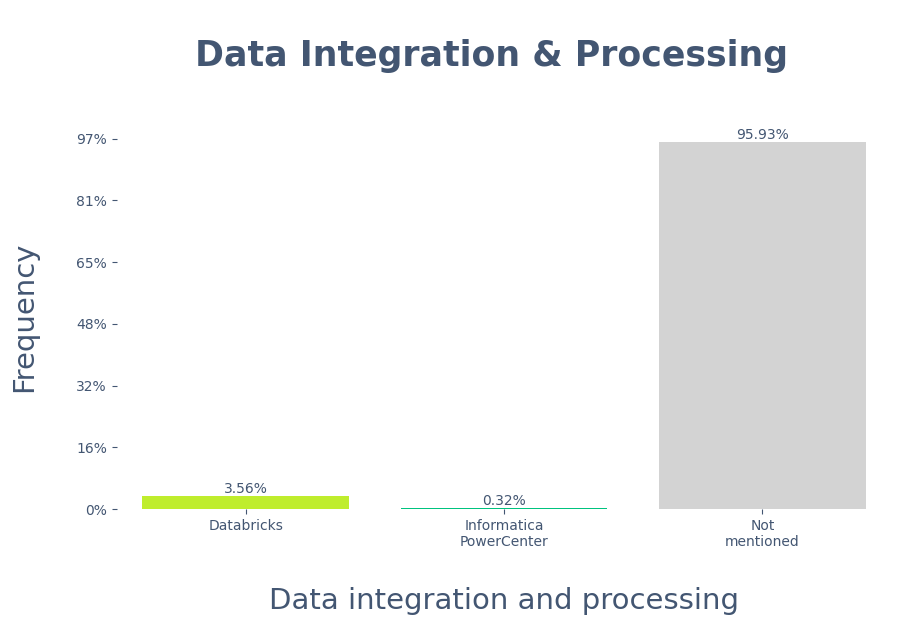

In [156]:
combine_plots(
    "Data Integration & Processing",
    (data, "", "Data_integration_and_processing", ""),
)

In [157]:
count_simultaneous_tech(data, 'Data_integration_and_processing')

Combination  Count
0  Databricks, Presto  0.03%

### 14.5 Stream Processing Tools

Stream processing tools such as Apache Kafka, Apache Flink, and Dataflow offer real-time data processing capabilities, allowing for the ingestion, processing, and analysis of high-volume, continuously streaming data, enabling organizations to derive insights, trigger actions, and make informed decisions in near real-time.

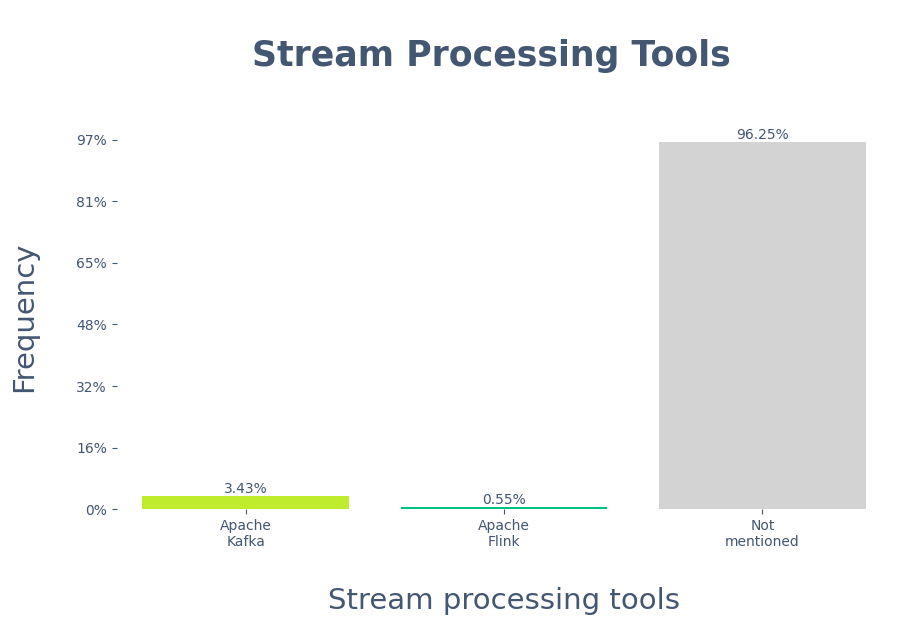

In [158]:
combine_plots(
    "Stream Processing Tools",
    (data, "", "Stream_processing_tools", ""),
)

In [159]:
count_simultaneous_tech(data, 'Stream_processing_tools')

Combination  Count
0            Apache Kafka, Apache Flink  0.26%
1                Apache Kafka, Dataflow  0.10%
2  Apache Kafka, Apache Flink, Dataflow  0.03%

### 14.6 Workflow Orchestration Tools

Workflow orchestration tools like Apache Airflow, SSIS (SQL Server Integration Services), and Luigi facilitate the coordination of tasks by providing a centralized platform to define, schedule, and execute various data-related operations such as data extraction, transformation, loading, and analysis, ensuring the proper sequence and dependencies among tasks, while also allowing for parallel execution and monitoring of workflow progress and status. These tools enable efficient task coordination and help streamline complex data workflows, improving overall data management and processing efficiency.

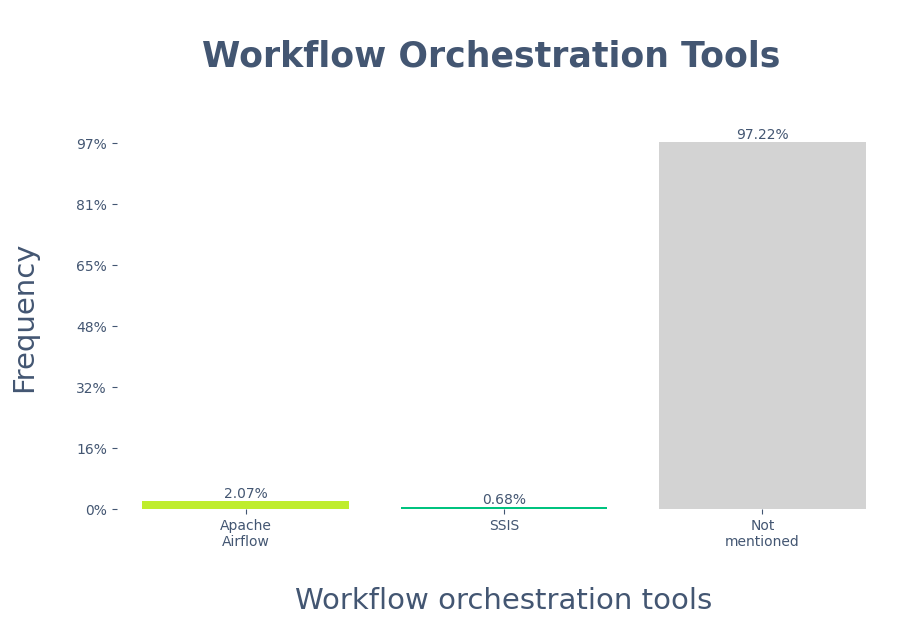

In [160]:
combine_plots(
    "Workflow Orchestration Tools",
    (data, "", "Workflow_orchestration_tools", ""),
)

In [161]:
count_simultaneous_tech(data, 'Workflow_orchestration_tools')

Combination  Count
0  Apache Airflow, Luigi  0.03%

### 14.7 Big Data Processing

Big data processing tools like Apache Spark, Apache Hadoop, and Apache Hive provide powerful solutions for handling and processing large-scale datasets. 
- `Apache Spark` offers distributed computing capabilities for real-time data processing, machine learning, and interactive analytics

- while `Apache Hadoop` provides a distributed file system (HDFS) and a framework for distributed processing of data across a cluster (a group of interconnected computers or server).

- `Apache Hive`, on the other hand, offers a data warehouse infrastructure built on top of `Hadoop`, providing a SQL-like interface for querying and analyzing data stored in Hadoop Distributed File System (HDFS).

Together, these tools enable efficient and scalable processing of big data, enabling organizations to extract valuable insights from massive datasets.

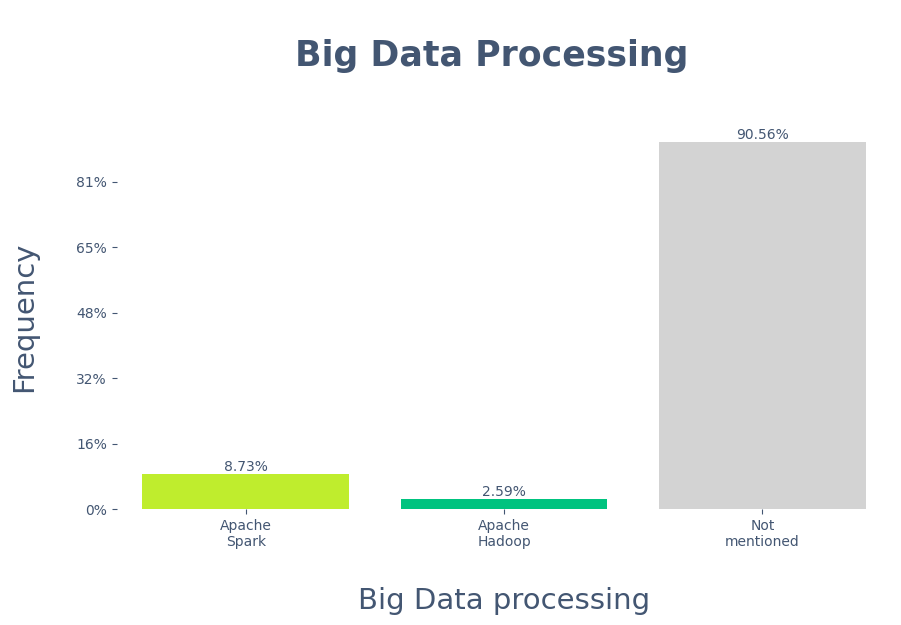

In [162]:
combine_plots(
    "Big Data Processing",
    (data, "", "Big_Data_processing", ""),
)

In [163]:
count_simultaneous_tech(data, 'Big_Data_processing')

Combination  Count
0               Apache Hadoop, Apache Spark  1.33%
1                 Apache Hive, Apache Spark  0.84%
2  Apache Hadoop, Apache Hive, Apache Spark  0.65%
3                Apache Hadoop, Apache Hive  0.06%

### 14.8 OS

- Linux is commonly preferred in data engineering and data science due to its robust command-line tools, seamless integration with open-source software, and the ability to customize the operating system

- Windows is also used, especially when specific software or tools require Windows compatibility, or in organizations with existing Windows-based infrastructure

- WSL, the Linux subsystem in Windows provides a convenient solution for data engineers and data scientists to leverage the power of Linux utilities and command-line tools seamlessly within a Windows environment.

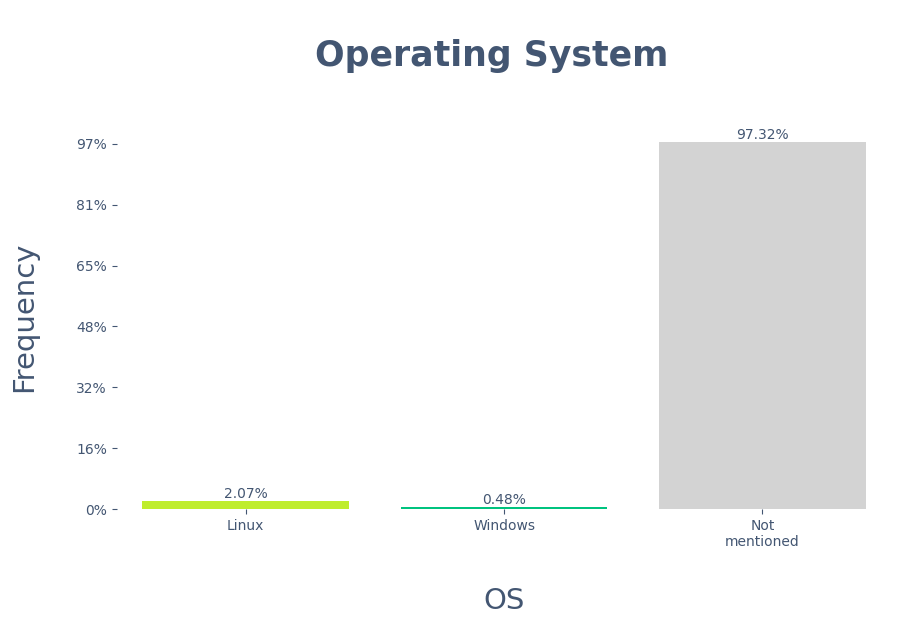

In [164]:
combine_plots(
    "Operating System",
    (data, "", "OS", ""),
)

In [165]:
count_simultaneous_tech(data, 'OS')

Combination  Count
0  Linux, Windows  0.29%
1   Unix, Windows  0.03%

### 14.9 Programming Languages

- SQL is a specialized language used for managing and manipulating structured data in relational databases, widely employed in data science for querying, analyzing, and transforming data efficiently.

- Python is a versatile and popular programming language in data science due to its rich ecosystem of libraries (e.g., NumPy, Pandas, and scikit-learn) and its simplicity, making it suitable for tasks like data manipulation, analysis, visualization, and machine learning.

- Java is a general-purpose language known for its robustness and scalability, often utilized in data engineering and building large-scale data processing systems due to its performance, extensive libraries, and support for distributed computing frameworks like Apache Hadoop and Apache Spark.

- Scala, a statically-typed language running on the Java Virtual Machine (JVM), combines object-oriented and functional programming features, making it suitable for distributed data processing frameworks like Apache Spark, known for its concise syntax, scalability, and interoperability with Java.

- R is a programming language designed for statistical analysis and data visualization, with a wide range of specialized packages and functions, making it a popular choice for statistical modeling, exploratory data analysis, and graphics in the field of data science.

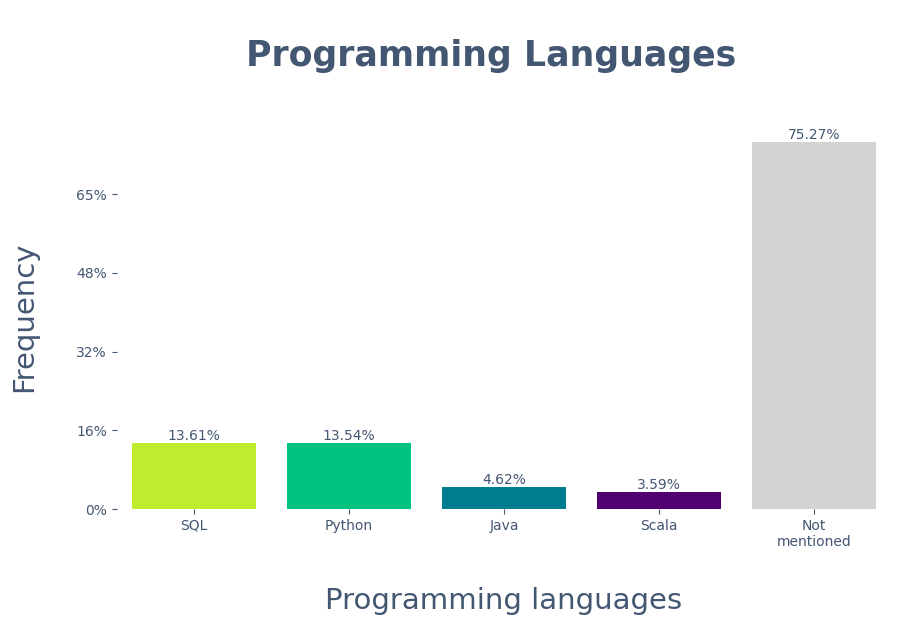

In [166]:
combine_plots(
    "Programming Languages",
    (data, "", "Programming_languages", ""),
)

In [167]:
count_simultaneous_tech(data, 'Programming_languages').loc[:10]

Combination  Count
0                Python, SQL  3.75%
1          Python, SQL, Java  0.65%
2         Python, Scala, SQL  0.61%
3                Scala, Java  0.58%
4        Python, Scala, Java  0.48%
5               Python, Java  0.48%
6   Python, Scala, SQL, Java  0.48%
7             Python, R, SQL  0.42%
8                 Scala, SQL  0.32%
9                  SQL, Java  0.26%
10                 Python, R  0.23%

### 14.10 Business Intelligence Tools

BI tools enable users to visually explore and analyze data, helping them uncover meaningful patterns, make informed decisions, and effectively communicate their findings clearly and understandably.

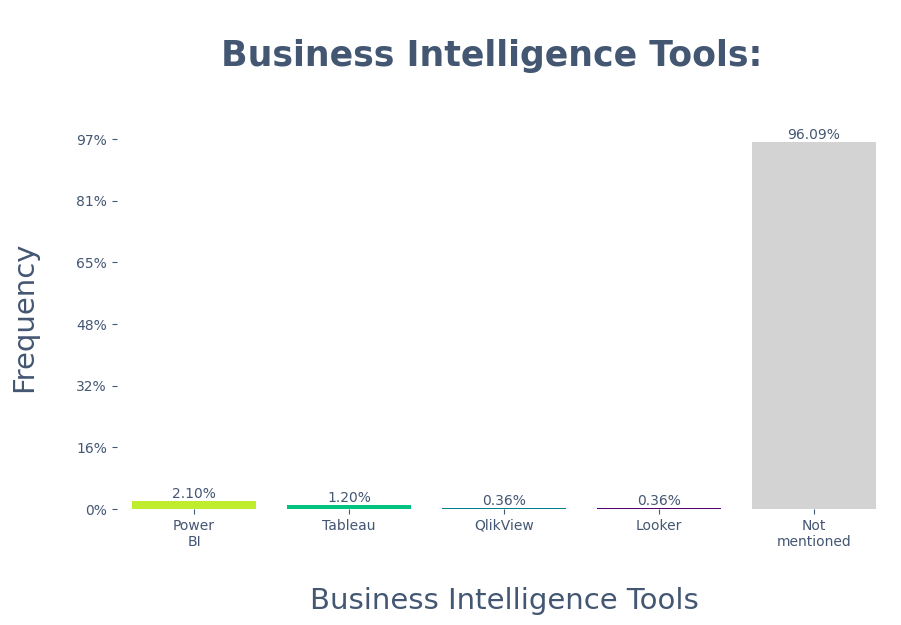

In [168]:
combine_plots(
    "Business Intelligence Tools:",
    (data, "", "Business_Intelligence_Tools", ""),
)

In [169]:
count_simultaneous_tech(data, 'Business_Intelligence_Tools')

Combination  Count
0                 Tableau, Power BI  0.19%
1                 Tableau, QlikView  0.13%
2                Power BI, QlikView  0.10%
3                   Power BI, Excel  0.06%
4                   Tableau, Looker  0.06%
5            Tableau, MicroStrategy  0.03%
6         Tableau, QlikView, Looker  0.03%
7  Tableau, Power BI, MicroStrategy  0.03%

## 15. Correlation Map

In absolute terms:
- 0.0 - 0.1 : No Correlation
- 0.1 - 0.3 : Weak Correlation
- 0.3 - 0.7 : Moderate Correlation
- 0.7 - 1.0 : Strong Correlation

In [170]:
CategoryResults = list[Tuple[str, str, float]]

def get_correlations(data: pd.DataFrame):
    
    def get_correlation_category(bottom_threshold: float, upper_threshold: float = 1.0):

        category_results: CategoryResults = []
        num_columns = len(columns)

        for i in range(num_columns):
            for j in range(i+1, num_columns):

                corr_value = correlations.iloc[i, j]
                col_left = columns[i]
                col_right = columns[j]

                category_results = add_correlation_value(
                        bottom_threshold, 
                        upper_threshold, 
                        category_results, 
                        corr_value, 
                        col_left, 
                        col_right
                    )
        
        sorted_results = sorted(category_results, key=lambda x: x[2], reverse=True)
        return sorted_results

    def add_correlation_value(
                bottom_threshold: float, 
                upper_threshold: float, 
                category_results: CategoryResults, 
                corr_value: float, 
                col_left: str, 
                col_right: str
            ):

        if upper_threshold == 1.0:
            if bottom_threshold <= abs(corr_value):
                category_results.append((col_left, col_right, corr_value))
        else:
            if bottom_threshold <= abs(corr_value) < upper_threshold:
                category_results.append((col_left, col_right, corr_value))

        return category_results
    
    correlations = data.corr()
    columns = correlations.columns
    correlations_results = {}
    
    correlations_results['Strong Correlations'] = get_correlation_category(bottom_threshold = 0.7)
    correlations_results['Moderate Correlations'] = get_correlation_category(bottom_threshold = 0.3, upper_threshold = 0.7)
    correlations_results['Weak Correlations'] = get_correlation_category(bottom_threshold = 0.1, upper_threshold = 0.3)

    return correlations_results

def print_results(correlations_results: dict[str, CategoryResults]):

    for level, results in correlations_results.items():
        print(f"\n{level}:")
        for col_left, col_right, corr_value in results:
            print(f"{col_left} - {col_right}: {round(corr_value, 2)}")
        print("\r")

In [171]:
def print_correlations(data: pd.DataFrame):
    
    correlations_results = get_correlations(data)
    
    print_results(correlations_results)

In [172]:
print_correlations(data)


Strong Correlations:
('Salary', 'Max') - ('Salary', 'Avg'): 0.95
('Salary', 'Min') - ('Salary', 'Avg'): 0.95
('Company_info', 'Rating') - ('Company_info', 'Senior_management'): 0.88
('Company_info', 'Senior_management') - ('Company_info', 'Culture_&_values'): 0.87
('Company_info', 'Rating') - ('Company_info', 'Culture_&_values'): 0.84
('Company_info', 'Career_opportunities') - ('Company_info', 'Culture_&_values'): 0.81
('Salary', 'Min') - ('Salary', 'Max'): 0.81
('Company_info', 'Career_opportunities') - ('Company_info', 'Senior_management'): 0.81
('Company_info', 'Rating') - ('Company_info', 'Friend_recommend'): 0.81
('Company_info', 'Friend_recommend') - ('Company_info', 'Culture_&_values'): 0.78
('Company_info', 'Work/Life_balance') - ('Company_info', 'Culture_&_values'): 0.77
('Company_info', 'Rating') - ('Company_info', 'Career_opportunities'): 0.76
('Salary', 'Employer_provided') - ('Salary', 'Specified'): 0.76
('Company_info', 'Friend_recommend') - ('Company_info', 'Senior_mana

Note:
- Surprisingly there was no strong and medium correlation between salary and other categories

### 15.1 Salary Corelation

In [173]:
def get_top_extreme_results(correlations_results: dict[str, CategoryResults], column_of_interest: str, num_positive_negative: int):

    top_positive = []

    positive_count = 0

    for _, results in correlations_results.items():

        for col_left, col_right, corr_value in results:

            if corr_value > 0:

                correlation_cols = [col_left, col_right]

                if column_of_interest in correlation_cols:

                    if positive_count == num_positive_negative:
                        break

                    corr_item = (col_left, col_right, corr_value)

                    top_positive.append(corr_item)

                    positive_count += 1

        if positive_count == num_positive_negative:
            break

    top_negative = []

    negative_count = 0

    reversed_dict = dict(reversed(correlations_results.items()))

    for _, results in reversed_dict.items():

        for col_left, col_right, corr_value in results:

            if corr_value < 0:

                correlation_cols = [col_left, col_right]

                if column_of_interest in correlation_cols:

                    if negative_count == num_positive_negative:
                        break

                    corr_item = (col_left, col_right, corr_value)

                    top_negative.insert(0, corr_item)

                    negative_count += 1

        if negative_count == num_positive_negative:
            break

    top_positive.extend(top_negative)

    return top_positive

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def show_extreme_correlations(data: pd.DataFrame, column_of_interest: Tuple[str, str], num_results: int = 5, title: str = "Add title"):

    columns_to_drop = [('Salary', 'Max'), ('Salary', 'Min')]
    data = data.drop(columns=columns_to_drop)
    correlations_results = get_correlations(data)
    extreme_correlations = get_top_extreme_results(correlations_results, column_of_interest, num_results)

    unique_elements = list(
        set([item[0] for item in extreme_correlations] + [item[1] for item in extreme_correlations])
    )
    correlation_values = np.zeros((len(unique_elements), len(unique_elements)))

    element_index_mapping = {
        element: index for index, element in enumerate(unique_elements)
    }

    for item in extreme_correlations:
        col1, col2, corr_value = item
        row_index = element_index_mapping[col2]
        col_index = element_index_mapping[col1]
        correlation_values[row_index, col_index] = corr_value

    df = pd.DataFrame(correlation_values, index=unique_elements, columns=unique_elements)
    df_column_of_interest = df[[column_of_interest]]
    df_no_empty_value = df_column_of_interest.drop(index=column_of_interest)
    df_no_0 = df_no_empty_value.drop(df_no_empty_value[df_no_empty_value.eq(0).all(axis=1)].index)
    df_plot = df_no_0.sort_values(by=column_of_interest, ascending=False)

    with plt.style.context('seaborn'):
        plt.figure(figsize=(2, 6))
        heatmap = sns.heatmap(df_plot, cmap='coolwarm', vmin = -1.0, vmax = 1.0, annot=True, fmt=".2f", annot_kws={'color': "white", 'fontweight': "bold"}, cbar=True, cbar_kws={"label": "Correlation"})
        # set color palette proportional to values 1.0 is always max 0.0 always least color value
        heatmap.set_xlabel("")
        heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, color="#435672")
        heatmap.set_xticklabels([])
        
        # Add the following lines
        cbar = heatmap.collections[0].colorbar
        cbar.set_ticks([heatmap.collections[0].get_array().min(), heatmap.collections[0].get_array().max()])
        cbar.set_ticks([-1.0, 0, 1.0])  # Set the tick locations
        cbar.set_ticklabels(['-1.0', '0.0', '1.0'])  # Set the tick labelss
        cbar.ax.yaxis.set_ticklabels(cbar.ax.yaxis.get_ticklabels(), color="#435672")  # Set the tick label color
        cbar.set_label("Correlation", color="#435672")
        
        plt.title(f'Correlation: {title}\n', color="#435672", fontsize = 16)
        plt.show()


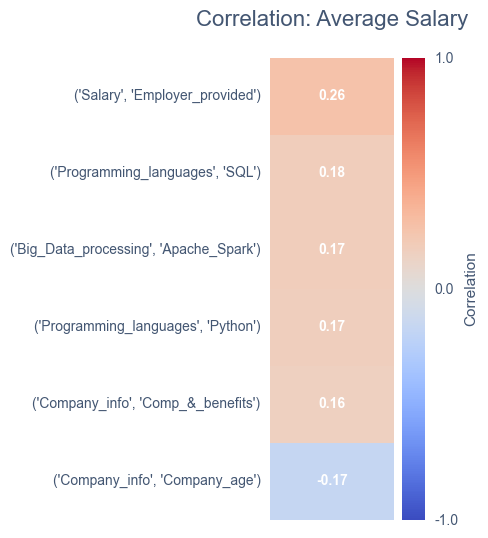

In [206]:
show_extreme_correlations(data, ('Salary', 'Avg'), title="Average Salary")

Note:
- Companies that do not disclose salary information may have a tendency to avoid extensive advertising in that particular area.

### 15.2 Companies' Ratings

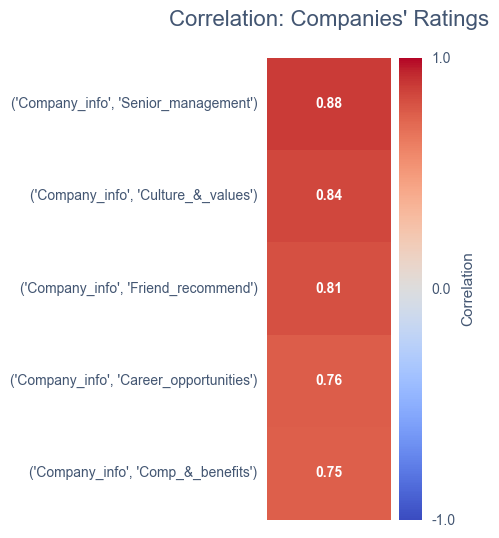

In [207]:
show_extreme_correlations(data, ('Company_info', 'Rating'), title="Companies' Ratings")

Note:
- It is unsurprising that the quality of senior management has a significant impact on the working conditions.

### 15.3 Tech

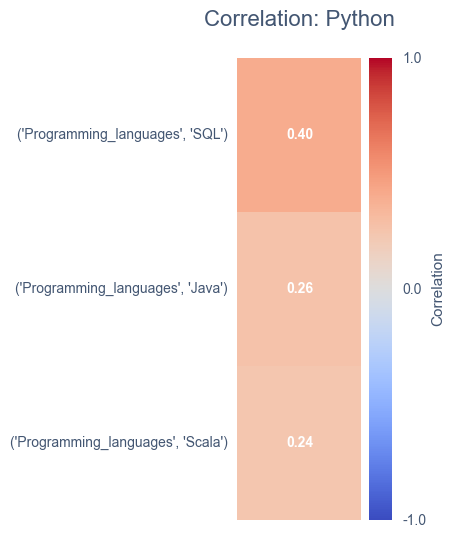

In [208]:
show_extreme_correlations(data, ('Programming_languages', 'Python'), title="Python")

And the correlation in the rest of the tech:

In [209]:
def print_correlations(data: pd.DataFrame, tech_columns: list[Tuple[str, str]], top_result: int = 10):
    
    correlations_results = get_correlations(data)
    
    print_results(correlations_results, tech_columns, top_result)

def print_results(correlations_results: dict[str, CategoryResults], tech_columns: list[Tuple[str, str]], top_result: int):

    count = 0
    for level, results in correlations_results.items():
        print(f"\n{level}:")
        for col_left, col_right, corr_value in results:
            if count == top_result:
                break
            elif col_left in tech_columns or col_right in tech_columns:
                print(f"{col_left} - {col_right}: {round(corr_value, 2)}")
                count += 1
            
        print("\r")

In [210]:
tech_columns = [
    ('Version_control', 'Git_SVN'),
    ('Cloud_platforms', 'AWS'),
    ('Cloud_platforms', 'Microsoft_Azure'),
    ('Cloud_platforms', 'GPC'),
    ('Cloud_platforms', 'Alibaba'),
    ('Cloud_platforms', 'Oracle'),
    ('Cloud_platforms', 'IBM'),
    ('Cloud_platforms', 'Tencent'),
    ('Cloud_platforms', 'OVHcloud'),
    ('Cloud_platforms', 'DigitalOcean'),
    ('Cloud_platforms', 'Lincode'),
    ('RDBMS', 'PostgreSQL'),
    ('RDBMS', 'Microsoft_SQL_Server'),
    ('RDBMS', 'IBM_Db2'),
    ('RDBMS', 'MySQL'),
    ('RDBMS', 'Oracle_PL_SQL'),
    ('NOSQL', 'MongoDB'),
    ('NOSQL', 'Cassandra'),
    ('NOSQL', 'Amazon_DynamoDB'),
    ('NOSQL', 'Neo4j'),
    ('Search_&_Analytics', 'Apache_Solr'),
    ('Search_&_Analytics', 'Amazon_Redshift'),
    ('Search_&_Analytics', 'Google_BigQuery'),
    ('Search_&_Analytics', 'Snowflake'),
    ('Search_&_Analytics', 'Oracle_Exadata'),
    ('Search_&_Analytics', 'SAP_HANA'),
    ('Search_&_Analytics', 'Teradata'),
    ('Data_integration_and_processing', 'Informatica_PowerCenter'),
    ('Data_integration_and_processing', 'Databricks'),
    ('Data_integration_and_processing', 'Presto'),
    ('Stream_processing_tools', 'Apache_Kafka'),
    ('Stream_processing_tools', 'Apache_Flink'),
    ('Stream_processing_tools', 'Dataflow'),
    ('Workflow_orchestration_tools', 'Apache_Airflow'),
    ('Workflow_orchestration_tools', 'Luigi'),
    ('Workflow_orchestration_tools', 'SSIS'),
    ('Big_Data_processing', 'Apache_Hadoop'),
    ('Big_Data_processing', 'Apache_Hive'),
    ('Big_Data_processing', 'Apache_Spark'),
    ('OS', 'Linux'),
    ('OS', 'Unix'),
    ('OS', 'Windows'),
    ('OS', 'macOS'),
    ('Programming_languages', 'Python'),
    ('Programming_languages', 'R'),
    ('Programming_languages', 'Scala'),
    ('Programming_languages', 'Julia'),
    ('Programming_languages', 'SQL'),
    ('Programming_languages', 'Java'),
    ('Programming_languages', 'C++'),
    ('Programming_languages', 'Go'),
    ('Programming_languages', 'Rust'),
    ('Programming_languages', 'Bash'),
    ('Programming_languages', 'PowerShell'),
    ('Programming_languages', 'CLI'),
    ('Business_Intelligence_Tools', 'Tableau'),
    ('Business_Intelligence_Tools', 'Power_BI'),
    ('Business_Intelligence_Tools', 'Google_Analytics'),
    ('Business_Intelligence_Tools', 'QlikView'),
    ('Business_Intelligence_Tools', 'Oracle_BI_server'),
    ('Business_Intelligence_Tools', 'SAS_Analytics'),
    ('Business_Intelligence_Tools', 'Lumira'),
    ('Business_Intelligence_Tools', 'Cognos_Impromptu'),
    ('Business_Intelligence_Tools', 'MicroStrategy'),
    ('Business_Intelligence_Tools', 'InsightSquared'),
    ('Business_Intelligence_Tools', 'Sisense'),
    ('Business_Intelligence_Tools', 'Dundas_BI'),
    ('Business_Intelligence_Tools', 'Domo'),
    ('Business_Intelligence_Tools', 'Looker'),
    ('Business_Intelligence_Tools', 'Excel')
 ]

In [211]:
print_correlations(data, tech_columns, 15)


Strong Correlations:


Moderate Correlations:
('RDBMS', 'PostgreSQL') - ('RDBMS', 'MySQL'): 0.49
('Stream_processing_tools', 'Apache_Kafka') - ('Big_Data_processing', 'Apache_Spark'): 0.44
('Programming_languages', 'Scala') - ('Programming_languages', 'Java'): 0.42
('RDBMS', 'MySQL') - ('NOSQL', 'MongoDB'): 0.42
('RDBMS', 'PostgreSQL') - ('NOSQL', 'MongoDB'): 0.42
('Programming_languages', 'Python') - ('Programming_languages', 'SQL'): 0.4
('Big_Data_processing', 'Apache_Spark') - ('Programming_languages', 'Scala'): 0.4
('Big_Data_processing', 'Apache_Hadoop') - ('Big_Data_processing', 'Apache_Spark'): 0.39
('Cloud_platforms', 'Microsoft_Azure') - ('Data_integration_and_processing', 'Databricks'): 0.39
('Big_Data_processing', 'Apache_Hive') - ('Big_Data_processing', 'Apache_Spark'): 0.37
('Big_Data_processing', 'Apache_Hadoop') - ('Big_Data_processing', 'Apache_Hive'): 0.33
('Big_Data_processing', 'Apache_Spark') - ('Programming_languages', 'Python'): 0.33
('RDBMS', 'MySQL') - ('Progra

If you found this notebook helpful, upvote it. Your feedback is greatly valued and would be appreciated.